# URL Classification model using Machine Learning
### For Computer Science B.Sc. Ariel University

**By Yuval Yurzdichansky, Matan Aviv and Roy Simanovich**

## Introduction
In this project we will build a machine learning model that will classify URLs based on if they are malicious (phishing, malware, etc.) or benign. We will use a dataset of URLs that are labeled as either malicious or benign and use it to train a model that will be able to classify new URLs.

### Install and import libraries

In [ ]:
# Some importent libraries installtion via pip
%pip install scikit-learn
%pip install pandas
%pip install numpy
%pip install tensorflow

In [1]:
# Importing the libraries for the project #

## Regular Libraries that's come with python
### Data Manipulation and Analysis
import pandas as pd
### Numerical Computing
import numpy as np
### Collection of Data Structures
import collections as col
### Regular Expressions
import re as regex
### URL Handling
import urllib as urlhndl
### Mathematical Operations
import math
### Socket Programming
import socket
### Plot graphs
import matplotlib.pyplot as plt

## SKLearn Libraries for Machine Learning
### Splitting the data into training and testing
from sklearn.model_selection import train_test_split
### Metrics for Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
### Preprocessing the Data
from sklearn.utils import resample
### TF-IDF Vectorizer for Text Data
from sklearn.feature_extraction.text import TfidfVectorizer
### Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
### Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
### Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
### K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
### Libraries for Plotting the Confusion Matrix
from sklearn.preprocessing import LabelEncoder
### Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

## Tensorflow Libraries for Deep Learning
import tensorflow as tf

## Pickle for saving the model to disk
import pickle as pkl

C:\Users\siman\AppData\Local\Temp\ipykernel_1208\459610472.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Feature extraction functions
We will use the following feature extraction functions to extract features from the URLs:
1. `get_url_length`: This function returns the length of the URL.
2. `get_dot_count`: This function returns the number of dots in the URL.
3. `get_hyphen_count_in_domain`: This function returns the number of hyphens in the domain of the URL.
4. `contains_security_sensitive_words`: This function returns 1 if the URL contains security sensitive words (e.g., "login", "signin", "account", etc.) and 0 otherwise.
5. `get_directory_length`: This function returns the length of the directory part of the URL.
6. `get_sub_directory_count`: This function returns the number of subdirectories in the URL.
7. `contains_ip`: This function returns 1 if the URL contains an IP address and 0 otherwise.
8. `get_token_count_in_path`: This function returns the number of tokens in the path part of the URL.
9. `get_largest_token_length`: This function returns the length of the largest token in the path part of the URL.
10. `get_avarage_token_length`: This function returns the average length of the tokens in the path part of the URL.
11. `get_file_length`: This function returns the length of the file part of the URL.
12. `get_dot_count_in_file`: This function returns the number of dots in the file part of the URL.
13. `get_delimiter_count_in_file`: This function returns the number of delimiters in the file part of the URL.
14. `get_arguments_length`: This function returns the length of the arguments part of the URL.
15. `get_number_of_arguments`: This function returns the number of arguments in the URL.
16. `get_length_of_largest_argument_value`: This function returns the length of the largest argument value in the URL.
17. `get_max_delimiters_in_arguments`: This function returns the maximum number of delimiters in the arguments part of the URL.
18. `get_domain_features`: This function returns the following features of the domain part of the URL: length, number of dots, number of hyphens, number of digits, number of special characters, entropy, whether the domain is a subdomain, and whether the domain is an IP address.
19. `get_special_character_count`: This function returns the number of special characters in the URL.
20. `get_entropy`: This function returns the entropy of the URL.
21. `check_url_shortened`: This function returns 1 if the URL is shortened and 0 otherwise.
22. `get_port_number`: This function returns the port number of the URL, if it exists, and -1 otherwise.
23. `get_subdomain_count`: This function returns the number of subdomains in the URL.
24. `get_suspicious_tld`: This function returns 1 if the top-level domain (TLD) of the URL is suspicious (e.g., "tk", "ml", "ga", etc.) and 0 otherwise.
25. `get_numeric_ratio`: This function returns the ratio of numeric characters in the URL.
26. `get_word_count`: This function returns the number of words in the URL.
27. `get_url_is_internationalized`: This function returns 1 if the URL is internationalized and 0 otherwise.

In [2]:
# Function to concatenate "https://" to benign URLs 
def add_https(url, label):
    if label == 0:
        return "https://" + url
    else:
        return url

def ensure_scheme(url):
    if not urlhndl.parse.urlparse(url).scheme:
        url = 'https://' + url
    return url

# Feature extraction functions
def get_url_length(url):
    return len(url)

def get_dot_count(url):
    return url.count('.')

def contains_security_sensitive_words(url):
    security_sensitive_words = [
    'login', 'password', 'admin', 'root', 'secret', 'private', 'secure', 'confidential', 
    'bank', 'creditcard', 'account', 'authentication', 'authorization', 'session', 'token', 
    'apikey', 'ssl', 'https', 'secure', 'encrypted', 'auth', 'signin', 'signup', 'verification', 
    'resetpassword', 'change-password', 'forgot-password', 'otp', '2fa', 'phishing', 'malware', 
    'virus', 'trojan', 'exploit', 'hacker', 'attack', 'security', 'vulnerable', 'injection', 
    'xss', 'csrf', 'dos', 'ddos', 'bruteforce', 'firewall', 'vpn', 'proxy', 'tor', 'security-question', 
    'privacy-policy']
    return int(any(word in url for word in security_sensitive_words))

def get_directory_length(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    return len(path)

def get_sub_directory_count(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    return path.count('/') - 1

def get_token_count_in_path(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    tokens = path.split('/')
    return len(tokens) - 1

def get_largest_token_length(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    tokens = path.split('/')
    if tokens:
        return max(len(token) for token in tokens)
    return 0

def get_average_token_length(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    tokens = [token for token in path.split('/') if token]
    if tokens:
        return np.mean([len(token) for token in tokens])
    return 0

def get_file_length(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    filename = path.split('/')[-1]
    return len(filename)

def get_dot_count_in_file(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    filename = path.split('/')[-1]
    return filename.count('.')

def get_delimiter_count_in_file(url):
    path = urlhndl.parse.urlparse(url).path
    filename = path.split('/')[-1]
    delimiters = ['.', '_', '-']
    return sum(filename.count(delimiter) for delimiter in delimiters)

def get_arguments_length(url):
    url = ensure_scheme(url)
    query = urlhndl.parse.urlparse(url).query
    return len(query)

def get_number_of_arguments(url):
    url = ensure_scheme(url)
    query = urlhndl.parse.urlparse(url).query
    return len(urlhndl.parse.parse_qs(query))

def get_length_of_largest_argument_value(url):
    url = ensure_scheme(url)
    query = urlhndl.parse.urlparse(url).query
    params = urlhndl.parse.parse_qs(query)
    if params:
        return max(len(max(values, key=len)) for values in params.values())
    return 0

def get_max_delimiters_in_arguments(url):
    url = ensure_scheme(url)
    query = urlhndl.parse.urlparse(url).query
    params = urlhndl.parse.parse_qs(query)
    delimiters = ['&', '=', '-', '_']
    if params:
        return max(sum(value.count(delimiter) for delimiter in delimiters) for values in params.values() for value in values)
    return 0


def get_hyphen_count_in_domain(url):
    url = ensure_scheme(url)
    domain = urlhndl.parse.urlparse(url).netloc
    return domain.count('-')

def contains_ip(url):
    url = ensure_scheme(url)
    domain = urlhndl.parse.urlparse(url).netloc
    try:
        socket.inet_aton(domain)
        return 1
    except:
        return 0
    
def get_domain_features(url):
    url = ensure_scheme(url)
    domain = urlhndl.parse.urlparse(ensure_scheme(url)).netloc
    tokens = domain.split('.')
    
    # Domain Length
    domain_length = len(domain)
    
    # Count of Tokens in the Domain
    token_count = len(tokens)
    
    # Length of Largest Token in the Domain
    largest_token_length = max(len(token) for token in tokens) if tokens else 0
    
    # Average Domain Token Length
    average_token_length = sum(len(token) for token in tokens) / len(tokens) if tokens else 0
    
    return domain_length, token_count, largest_token_length, average_token_length

# New feature extraction functions
def get_special_character_count(url):
    special_characters = ['@', '=', '+', '*', '?', '&', '%', '$', '#', '!']
    return sum(url.count(char) for char in special_characters)

def get_entropy(url):
    # Count the frequency of each character in the string
    freq = col.Counter(url)
    # Calculate the probabilities
    probs = [count / len(url) for count in freq.values()]
    # Calculate the Shannon entropy
    entropy = -sum(p * math.log(p, 2) for p in probs if p > 0)
    return entropy

def check_url_shortened(url):
    shortened_services = ['bit.ly', 'tinyurl.com', 'goo.gl', 'ow.ly', 't.co']
    url = ensure_scheme(url)
    domain = urlhndl.parse.urlparse(url).netloc
    return int(domain in shortened_services)

def get_subdomain_count(url):
    url = ensure_scheme(url)
    domain_parts = urlhndl.parse.urlparse(url).netloc.split('.')
    # Count as subdomains any parts beyond the second-level domain and TLD
    return max(0, len(domain_parts) - 2)

def get_suspicious_tld(url):
    suspicious_tlds = ['xyz', 'top', 'loan', 'win', 'club']
    url = ensure_scheme(url)
    tld = urlhndl.parse.urlparse(url).netloc.split('.')[-1]
    return int(tld in suspicious_tlds)

def get_numeric_ratio(url):
    numeric_chars = sum(c.isdigit() for c in url)
    return numeric_chars / len(url) if len(url) > 0 else 0

def get_word_count(url):
    words = regex.findall(r'\w+', url)
    return len(words)

def is_https(url, timeout=0.5):
    return int(url.startswith("https"))

### Now load the dataset and do some preprocessing on it
The dataset is a CSV file with two columns: `url` and `label`. The `url` column contains the URL and the `label` column contains the label of the URL. The label is 1 if the URL is malicious and 0 if the URL is benign. Since the dataset is huge (more than 1 million rows), we will only use a small subset of it for this project (150,000 rows for each class, 300,000 rows in total).

In [3]:
# Load the dataset
df = pd.read_csv('url_dataset_updated.csv')

# Drop all duplicates from df
df = df.drop_duplicates()

# Reset the index after dropping duplicates
df = df.reset_index(drop=True)

# Name of the URL column, change this if your dataset has a different column name
url_column_name = 'URL'

# Apply the function to the URL column
df[url_column_name] = df.apply(lambda row: add_https(row[url_column_name], row['Label']), axis=1)

# Separate the dataset into malicious and benign
malicious_df = df[df['Label'] == 1]
benign_df = df[df['Label'] == 0]

# Randomly sample 150,000 entries from each
malicious_sampled_df = resample(malicious_df, n_samples=150000, random_state=42)
benign_sampled_df = resample(benign_df, n_samples=150000, random_state=42)

# Combine the sampled data
balanced_df = pd.concat([malicious_sampled_df, benign_sampled_df])

# Shuffle the combined dataset to mix malicious and benign URLs
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print('Balanced Dataset Shape:', balanced_df.shape)
print('Balanced Dataset Distribution:', balanced_df['Label'].value_counts())
print('Balanced Dataset Head (First 10 Rows):')
print(balanced_df.head(10))

# Now, balanced_df contains the balanced dataset ready for further processing

Balanced Dataset Shape: (300000, 2)
Balanced Dataset Distribution: Label
1    150000
0    150000
Name: count, dtype: int64
Balanced Dataset Head (First 10 Rows):
                                                 URL  Label
0  http://etransfers.interac.ca-ssl.net/sh/2o05I9...      1
1  http://betterhealthsmoothies.com/Adobe/adobe-3...      1
2  http://lloydsbank.deregister-payee-secure-auth...      1
3                                 https://archive.md      0
4                      https://pkg00-atx.netgate.com      0
5  https://www.shareholds.com/gbr/5df72f77-f30d-4...      1
6                  https://sub-166-141-241.myvzw.com      0
7     https://hgdggdgfghygsugfytsfgssytstys.gq/83cbc      1
8                    https://www.commbanknetcode.com      1
9                    https://autodiscover.ons.gov.uk      0


## Start testing with the options
**NOTE:** We'll split the truncated dataset into a training set and a test set (80% training, 20% test) and use the training set to train the model and the test set to evaluate the model.

### Feature extraction preprocessing
We'll get the features from the URLs using the feature extraction functions.

In [4]:
# Apply feature extraction
print('Feature extraction...')
features = balanced_df['URL'].apply(lambda x: pd.Series({
    'url_length': get_url_length(x),
    'dot_count': get_dot_count(x),
    'hyphen_count_domain': get_hyphen_count_in_domain(x),
    'security_sensitive_words': contains_security_sensitive_words(x),
    'directory_length': get_directory_length(x),
    'sub_directory_count': get_sub_directory_count(x),
    'token_count_path': get_token_count_in_path(x),
    'largest_token_length': get_largest_token_length(x),
    'average_token_length': get_average_token_length(x),
    'file_length': get_file_length(x),
    'contains_ip': contains_ip(x),
    'dot_count_in_file': get_dot_count_in_file(x),
    'delimiter_count_in_file': get_delimiter_count_in_file(x),
    'arguments_length': get_arguments_length(x),
    'number_of_arguments': get_number_of_arguments(x),
    'length_of_largest_argument_value': get_length_of_largest_argument_value(x),
    'max_delimiters_in_arguments': get_max_delimiters_in_arguments(x),
    'special_character_count': get_special_character_count(x),
    'entropy': get_entropy(x),
    'url_shortened': check_url_shortened(x),
    'subdomain_count': get_subdomain_count(x),
    'suspicious_tld': get_suspicious_tld(x),
    'numeric_ratio': get_numeric_ratio(x),
    'domain_length': get_domain_features(x)[0],
    'domain_token_count': get_domain_features(x)[1],
    'largest_domain_token_length': get_domain_features(x)[2],
    'average_domain_token_length': get_domain_features(x)[3],
    'word_count': get_word_count(x),
    'is_https': is_https(x)
}))

# Concatenate original DF with features
balanced_df = pd.concat([balanced_df, features], axis=1)

# Regex tokenization function
def tokenize_url(url):
    # Tokenize the URL using regex
    tokens = regex.findall(r'\w+', url)
    return ' '.join(tokens)

# Tokenize the URLs
print('Tokenizing URLs...')
balanced_df['URL'] = balanced_df['URL'].apply(tokenize_url)
print('Tokenization complete.')

print('Balanced Dataset Shape:', balanced_df.shape)
print('Balanced Dataset:')
print(balanced_df)

Feature extraction...
Tokenizing URLs...
Tokenization complete.
Balanced Dataset Shape: (300000, 31)
Balanced Dataset:
                                                      URL  Label  url_length  \
0       http etransfers interac ca ssl net sh 2o05I9 b...      1        65.0   
1       http betterhealthsmoothies com Adobe adobe 3D6...      1        58.0   
2       http lloydsbank deregister payee secure auth c...      1        60.0   
3                                        https archive md      0        18.0   
4                             https pkg00 atx netgate com      0        29.0   
...                                                   ...    ...         ...   
299995         https infomation fb service e82443 repl co      1        44.0   
299996                     https img 1000736 ad score com      0        32.0   
299997                  http sosyalsat com help home html      1        35.0   
299998  https storageapi fleek co 12678f8a 04f9 4b69 a...      1        83.0   
2

### TF-IDF Vectorizer preprocessing
We will start by using the TF-IDF vectorizer to convert the URLs into numerical features for preprocessing, and split the dataset into a training set and a test set.

In [5]:
# Extracting TF-IDF features from URLs
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features

# Fit and transform the TF-IDF vectorizer
print('Fitting and transforming the TF-IDF Vectorizer (max_features=5000) to the URLs in the dataset...')
tfidf_features = tfidf_vectorizer.fit_transform(balanced_df['URL'])
print('TF-IDF Vectorization complete.')

# Convert TF-IDF features from a sparse matrix to a dense format and then to an np.ndarray
print('Converting TF-IDF features from a sparse matrix to a dense format and then to an np.ndarray...')
tfidf_dense = np.asarray(tfidf_features.todense())
print('Conversion complete.')

# Define X for numerical features
X_numerical = balanced_df.drop(['Label', 'URL'], axis=1).values  # Make sure this matches your feature extraction output

# Combining TF-IDF features with numerical features
print('Combining TF-IDF features with numerical features...')
X_combined = np.hstack((X_numerical, tfidf_dense))
print('Combination complete.')

# Define y
y = balanced_df['Label'].values

# Save the TF-IDF vectorizer to disk
print('Saving the TF-IDF Vectorizer to disk...')
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pkl.dump(tfidf_vectorizer, f)
print('TF-IDF Vectorizer saved to disk.')

# Split the data into training and testing sets
print('Splitting the data into training and testing sets...')
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
print('Data split complete.')

Fitting and transforming the TF-IDF Vectorizer (max_features=5000) to the URLs in the dataset...
TF-IDF Vectorization complete.
Converting TF-IDF features from a sparse matrix to a dense format and then to an np.ndarray...
Conversion complete.
Combining TF-IDF features with numerical features...
Combination complete.
Saving the TF-IDF Vectorizer to disk...
TF-IDF Vectorizer saved to disk.
Splitting the data into training and testing sets...
Data split complete.


### Logistic Regression model
We will use the logistic regression model to classify the URLs and evaluate the model using the test set. We'll use 10,000 iterations.

In [16]:
# Model Training with Logistic Regression
print('Training the Logistic Regression model with max_iter=10000 and random_state=42...')
lr_model = LogisticRegression(random_state=42, max_iter=10000) # Increase max_iter if the model does not converge
lr_model.fit(X_train, y_train)
print('Logistic Regression model training complete.')

print('Saving the Logistic Regression model to disk...')

# Save the model to disk
with open('logistic_regression_model.pkl', 'wb') as f:
    pkl.dump(lr_model, f)

print('Logistic Regression model saved to disk.')

Training the Logistic Regression model with max_iter=10000 and random_state=42...
Logistic Regression model training complete.
Saving the Logistic Regression model to disk...
Logistic Regression model saved to disk.


#### Making predictions based on thresholds

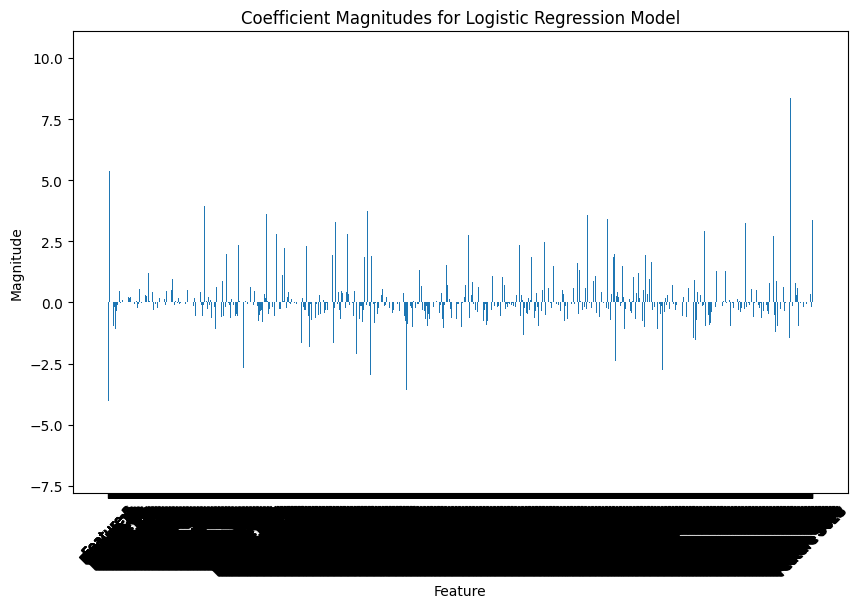

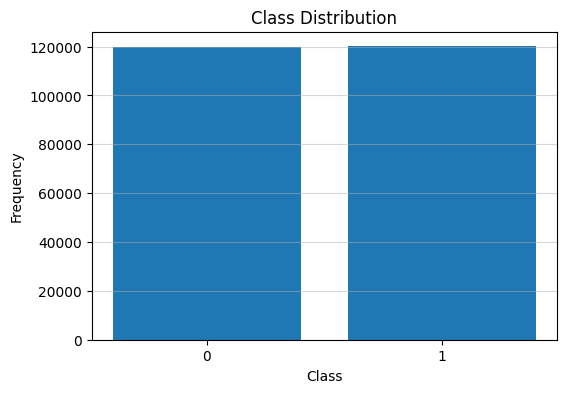

Making predictions with the Logistic Regression model...
Threshold: 0.05
Accuracy: 0.8752666666666666
Confusion Matrix:
 [[22819  7243]
 [  241 29697]]
Precision: 0.8039252842447212
Recall: 0.9919500300621285
False Positive Rate: 0.24093540017297585
False Negative Rate: 0.008049969937871602


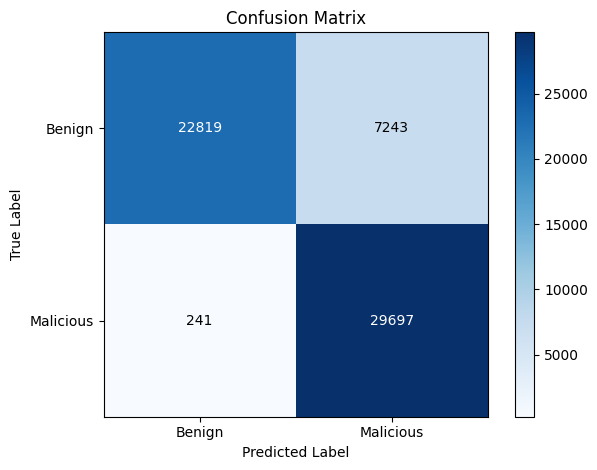

Threshold: 0.1
Accuracy: 0.9415333333333333
Confusion Matrix:
 [[27066  2996]
 [  512 29426]]
Precision: 0.907593609277651
Recall: 0.9828979891776338
False Positive Rate: 0.09966070121748387
False Negative Rate: 0.017102010822366225


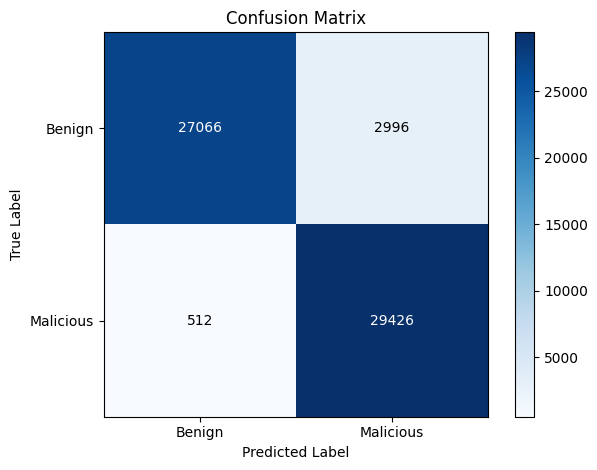

Threshold: 0.15
Accuracy: 0.9602
Confusion Matrix:
 [[28340  1722]
 [  666 29272]]
Precision: 0.9444408595211976
Recall: 0.9777540249849689
False Positive Rate: 0.057281617989488394
False Negative Rate: 0.022245975015031064


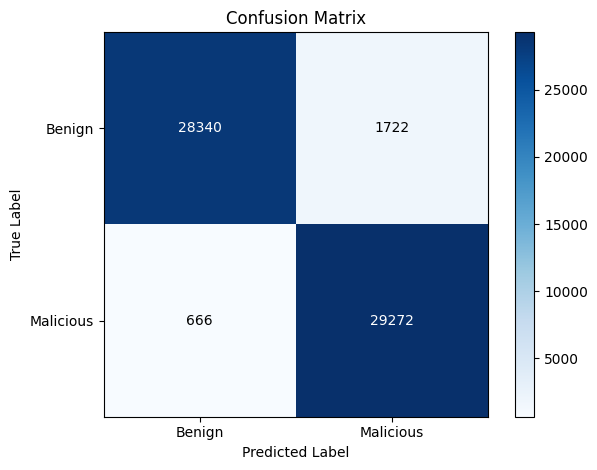

Threshold: 0.2
Accuracy: 0.9691
Confusion Matrix:
 [[28967  1095]
 [  759 29179]]
Precision: 0.9638303494747968
Recall: 0.9746476050504376
False Positive Rate: 0.03642472224070255
False Negative Rate: 0.02535239494956243


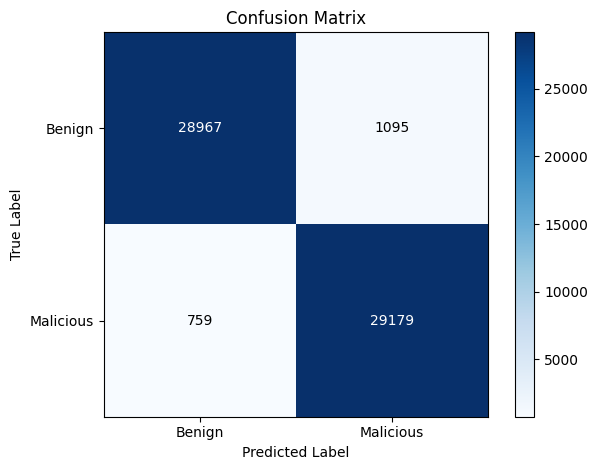

Threshold: 0.25
Accuracy: 0.9730166666666666
Confusion Matrix:
 [[29300   762]
 [  857 29081]]
Precision: 0.9744663740240592
Recall: 0.971374173291469
False Positive Rate: 0.02534761492914643
False Negative Rate: 0.028625826708530963


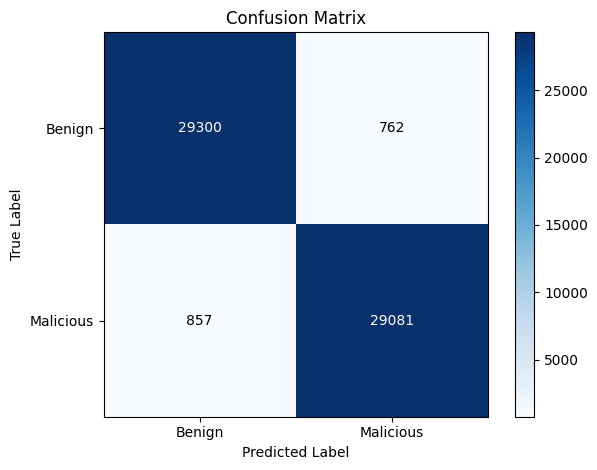

Threshold: 0.3
Accuracy: 0.9751166666666666
Confusion Matrix:
 [[29495   567]
 [  926 29012]]
Precision: 0.9808309949626424
Recall: 0.9690694101142361
False Positive Rate: 0.01886102055751447
False Negative Rate: 0.03093058988576391


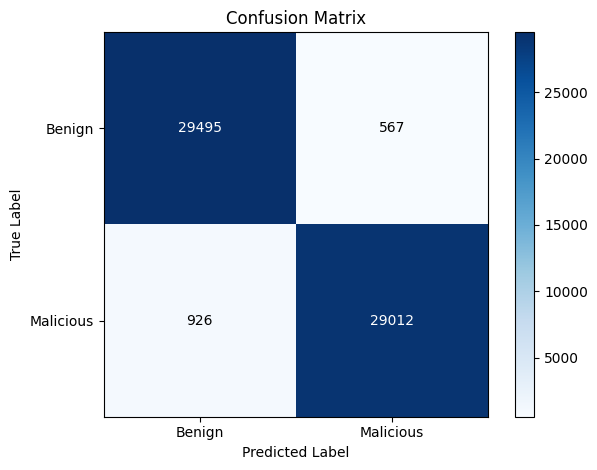

Threshold: 0.35
Accuracy: 0.9758
Confusion Matrix:
 [[29629   433]
 [ 1019 28919]]
Precision: 0.985248023984737
Recall: 0.9659629901797048
False Positive Rate: 0.014403565963675072
False Negative Rate: 0.034037009820295276


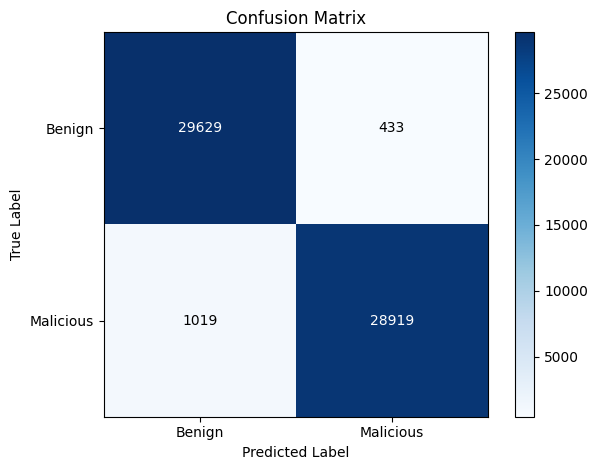

Threshold: 0.4
Accuracy: 0.9759333333333333
Confusion Matrix:
 [[29722   340]
 [ 1104 28834]]
Precision: 0.9883457873448961
Recall: 0.9631237891642729
False Positive Rate: 0.011309959417204444
False Negative Rate: 0.03687621083572717


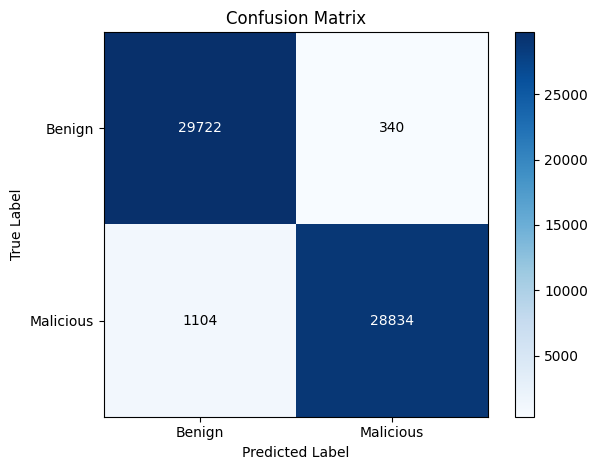

Threshold: 0.45
Accuracy: 0.9756
Confusion Matrix:
 [[29784   278]
 [ 1186 28752]]
Precision: 0.9904236996210817
Recall: 0.9603847952435033
False Positive Rate: 0.009247555052890693
False Negative Rate: 0.03961520475649676


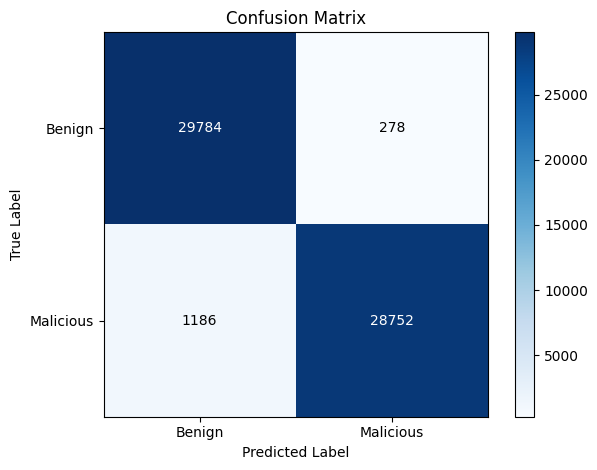

Threshold: 0.5
Accuracy: 0.9751333333333333
Confusion Matrix:
 [[29831   231]
 [ 1261 28677]]
Precision: 0.9920091324200914
Recall: 0.9578796178769456
False Positive Rate: 0.007684119486394784
False Negative Rate: 0.042120382123054315


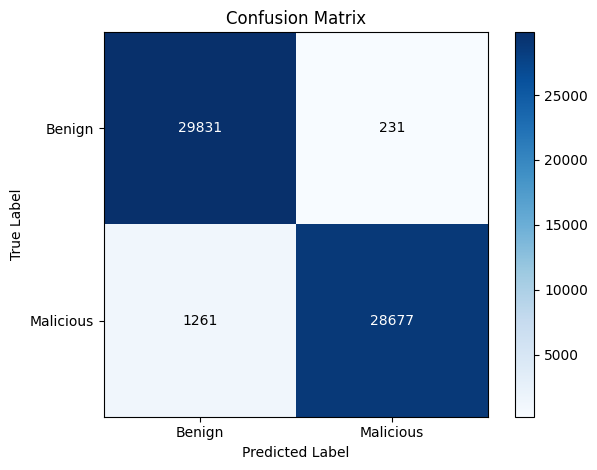

Threshold: 0.55
Accuracy: 0.97455
Confusion Matrix:
 [[29878   184]
 [ 1343 28595]]
Precision: 0.9936064491469474
Recall: 0.955140623956176
False Positive Rate: 0.006120683919898876
False Negative Rate: 0.0448593760438239


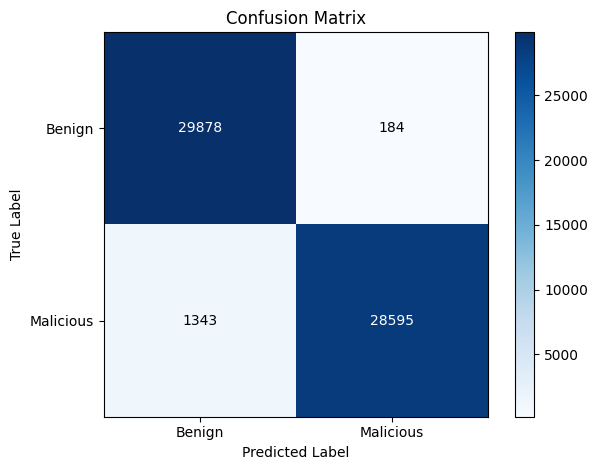

Threshold: 0.6
Accuracy: 0.9740666666666666
Confusion Matrix:
 [[29914   148]
 [ 1408 28530]]
Precision: 0.9948392495989957
Recall: 0.9529694702384929
False Positive Rate: 0.004923158805136052
False Negative Rate: 0.047030529761507116


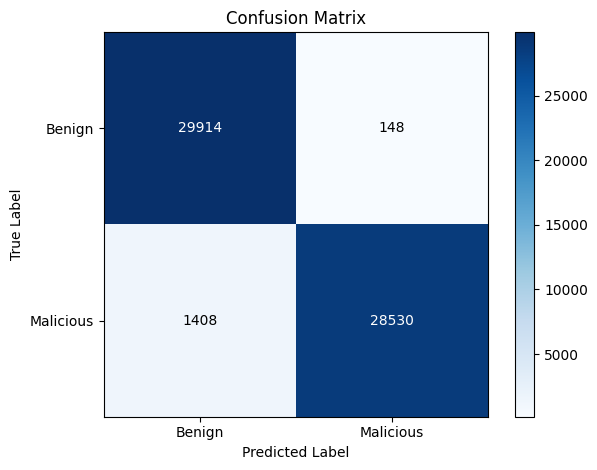

Threshold: 0.65
Accuracy: 0.97295
Confusion Matrix:
 [[29940   122]
 [ 1501 28437]]
Precision: 0.9957281417416576
Recall: 0.9498630503039616
False Positive Rate: 0.0040582795555851245
False Negative Rate: 0.05013694969603848


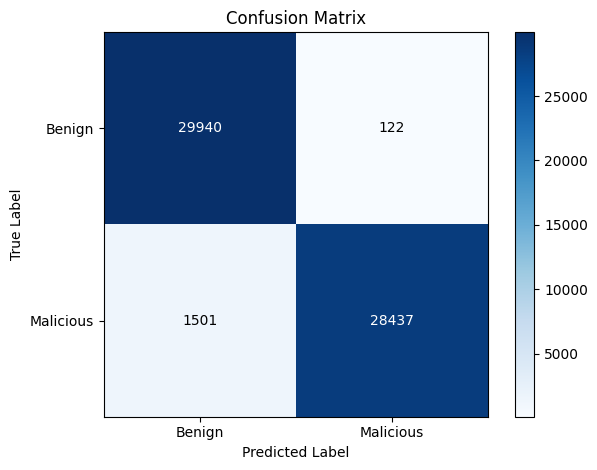

Threshold: 0.7
Accuracy: 0.9718
Confusion Matrix:
 [[29967    95]
 [ 1597 28341]]
Precision: 0.9966591644394429
Recall: 0.9466564232747678
False Positive Rate: 0.0031601357195130066
False Negative Rate: 0.05334357672523215


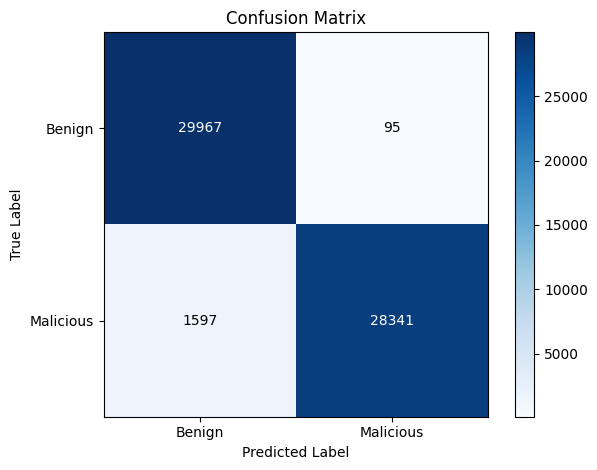

Threshold: 0.75
Accuracy: 0.96985
Confusion Matrix:
 [[29991    71]
 [ 1738 28200]]
Precision: 0.9974885925506703
Recall: 0.9419466898256397
False Positive Rate: 0.0023617856430044573
False Negative Rate: 0.05805331017436034


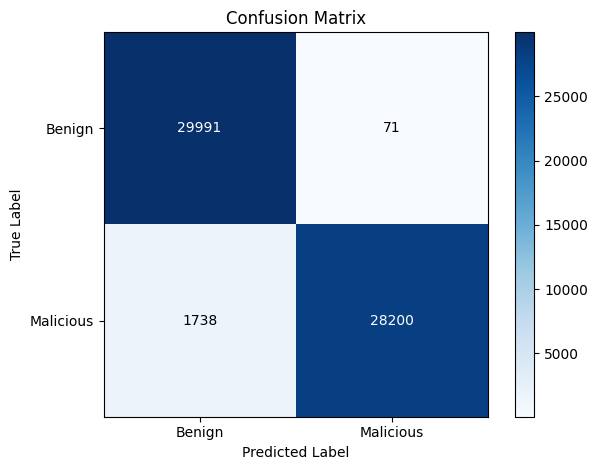

Threshold: 0.8
Accuracy: 0.96795
Confusion Matrix:
 [[30013    49]
 [ 1874 28064]]
Precision: 0.9982570341123324
Recall: 0.9374039682009486
False Positive Rate: 0.0016299647395382876
False Negative Rate: 0.06259603179905138


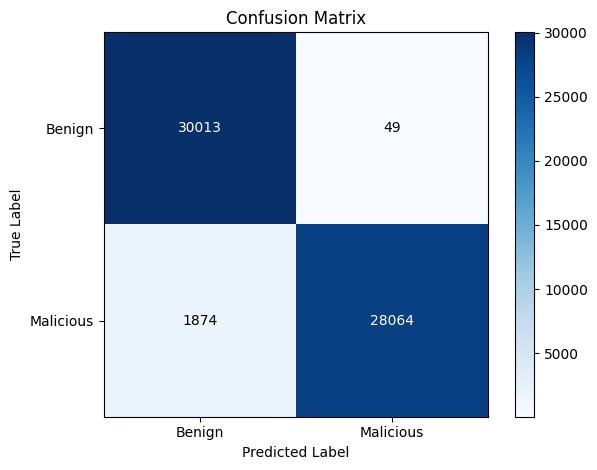

Threshold: 0.85
Accuracy: 0.9655166666666667
Confusion Matrix:
 [[30029    33]
 [ 2036 27902]]
Precision: 0.9988186862359048
Recall: 0.9319927850891843
False Positive Rate: 0.0010977313551992548
False Negative Rate: 0.06800721491081568


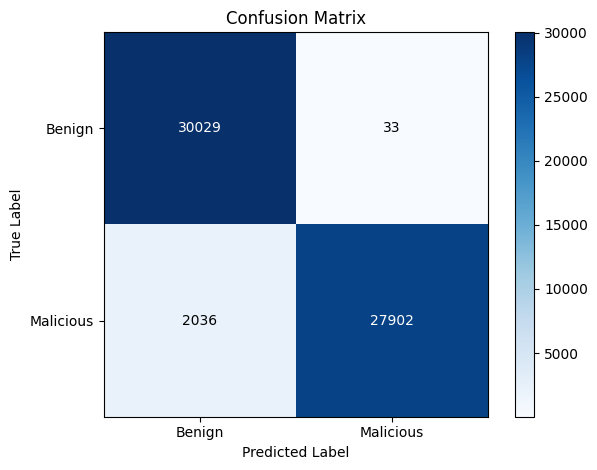

Threshold: 0.9
Accuracy: 0.9620166666666666
Confusion Matrix:
 [[30038    24]
 [ 2255 27683]]
Precision: 0.9991337929043203
Recall: 0.9246776671788363
False Positive Rate: 0.000798350076508549
False Negative Rate: 0.07532233282116374


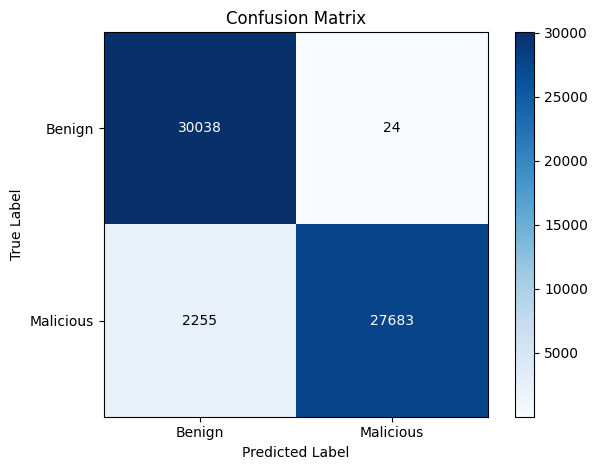

Threshold: 0.95
Accuracy: 0.9553166666666667
Confusion Matrix:
 [[30047    15]
 [ 2666 27272]]
Precision: 0.9994502876827793
Recall: 0.9109492952101009
False Positive Rate: 0.0004989687978178432
False Negative Rate: 0.08905070478989913


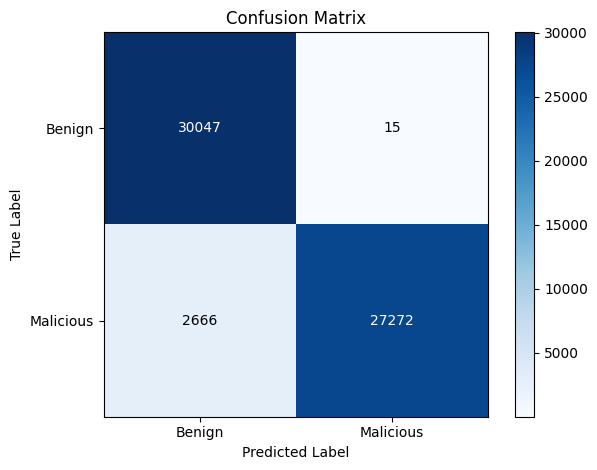

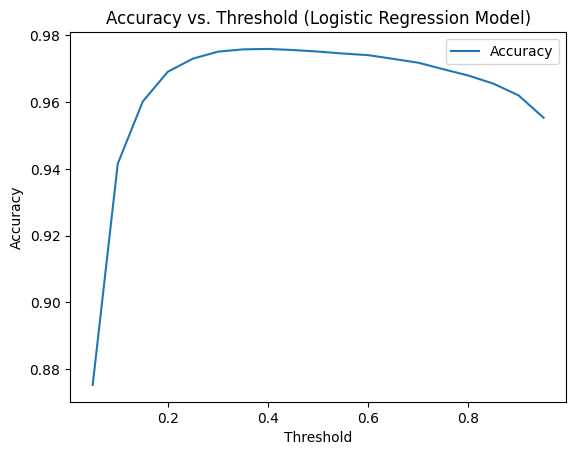

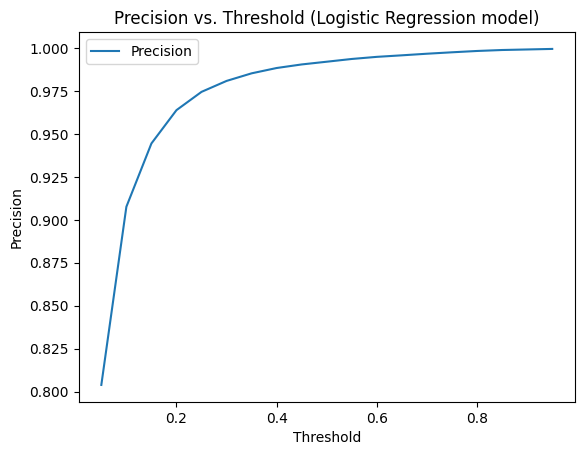

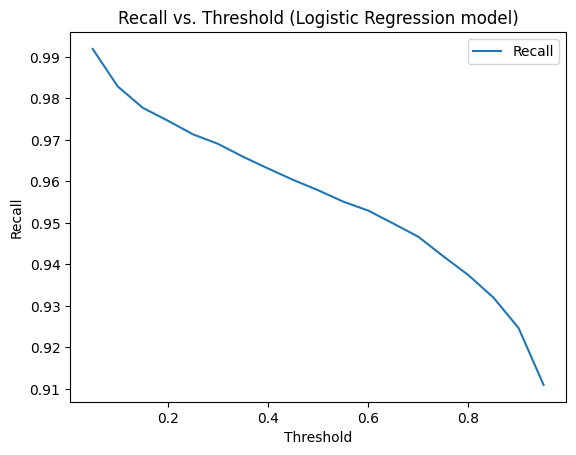

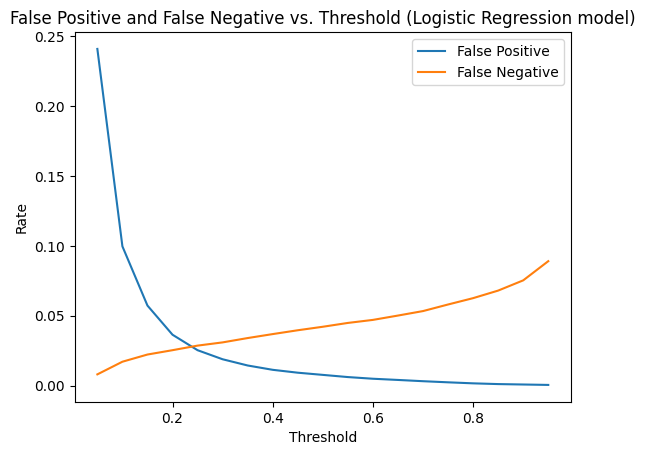

Maximum Accuracy: 0.9759333333333333
Best Threshold: 0.4


In [19]:
def plot_confusion_matrix(model, X_test, y_test, threshold=0.5):
    cm = confusion_matrix(y_test, (model.predict_proba(X_test)[:, 1] >= threshold).astype(int))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = ['Benign', 'Malicious']  # Class labels
    plt.xticks(ticks=[0, 1], labels=classes)
    plt.yticks(ticks=[0, 1], labels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

# Coefficient Magnitudes
coefficients = lr_model.coef_[0]
feature_names = [f'Feature {i}' for i in range(len(coefficients))]
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.title('Coefficient Magnitudes for Logistic Regression Model')
plt.xlabel('Feature')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.show()

# Class Distribution
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
class_names = label_encoder.classes_
plt.figure(figsize=(6, 4))
plt.hist(y_train_encoded, bins=np.arange(len(np.unique(y_train_encoded)) + 1) - 0.5, rwidth=0.8)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(np.arange(len(class_names)), class_names)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Predictions and Evaluation
print('Making predictions with the Logistic Regression model...')

# Initialize lists to store evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
false_positive_list = []
false_negative_list = []

# Define the thresholds to test
thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

max_accuracy = 0.0
best_threshold = 0.0

for threshold in thresholds:
    print('Threshold:', threshold)
    y_pred = (lr_model.predict_proba(X_test)[:, 1] >= threshold).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    false_positive = confusion[0, 1] / (confusion[0, 1] + confusion[0, 0])
    false_negative = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])

    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion)
    print("Precision:", precision)
    print("Recall:", recall)
    print("False Positive Rate:", false_positive)
    print("False Negative Rate:", false_negative)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    false_positive_list.append(false_positive)
    false_negative_list.append(false_negative)

    # Plot confusion matrix
    plot_confusion_matrix(lr_model, X_test, y_test, threshold)

    # Update max accuracy and best threshold if current accuracy is higher
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_threshold = threshold

# Plotting accuracy vs. threshold
plt.plot(thresholds, accuracy_list, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold (Logistic Regression Model)')
plt.legend()
plt.show()

# Plotting precision vs. threshold
plt.plot(thresholds, precision_list, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs. Threshold (Logistic Regression model)')
plt.legend()
plt.show()

# Plotting recall vs. threshold
plt.plot(thresholds, recall_list, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs. Threshold (Logistic Regression model)')
plt.legend()
plt.show()

# Plotting false positive and false negative rates vs. threshold
plt.plot(thresholds, false_positive_list, label='False Positive')
plt.plot(thresholds, false_negative_list, label='False Negative')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('False Positive and False Negative vs. Threshold (Logistic Regression model)')
plt.legend()
plt.show()

# Display maximum accuracy and best threshold
print('Maximum Accuracy:', max_accuracy)
print('Best Threshold:', best_threshold)

### Guassian Naive Bayes model
We will use the Guassian Naive Bayes model to classify the URLs and evaluate the model using the test set.

In [6]:
# Model Training with GaussianNB
print('Training the Gaussian Naive Bayes model with the combined features...')
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
print('Gaussian Naive Bayes model training complete.')

print('Saving the Gaussian Naive Bayes model to disk...')

# Save the model to disk
with open('gaussian_nb_model.pkl', 'wb') as f:
    pkl.dump(gnb_model, f)

print('Gaussian Naive Bayes model saved to disk.')

Training the Gaussian Naive Bayes model with the combined features...


Gaussian Naive Bayes model training complete.
Saving the Gaussian Naive Bayes model to disk...
Gaussian Naive Bayes model saved to disk.


#### Functions for graphs

In [14]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.xticks(rotation=45)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

# Define a function to plot ROC curve with custom threshold
def plot_roc_curve_threshold(y_true, y_score, threshold):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Define a function to plot precision-recall curve with custom threshold
def plot_precision_recall_curve_threshold(y_true, y_score, threshold):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    average_precision = average_precision_score(y_true, y_score)
    plt.figure()
    lw = 2
    plt.plot(recall, precision, color='blue',
             lw=lw, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
    plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

#### Make predictions and evaluate the model

Making predictions with the Gaussian Naive Bayes model...
Threshold: 0.05
Accuracy: 0.9570833333333333
Confusion Matrix:
 [[28953  1109]
 [ 1466 28472]]
Precision: 0.9625097190764342
Recall: 0.9510321330750217
False Positive Rate: 0.0368904264519992
False Negative Rate: 0.04896786692497829


C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


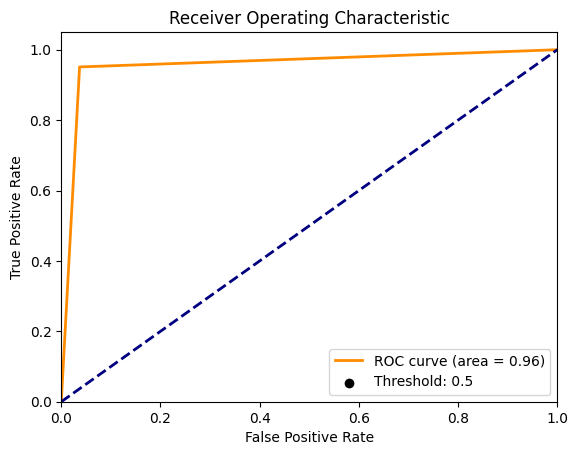

C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


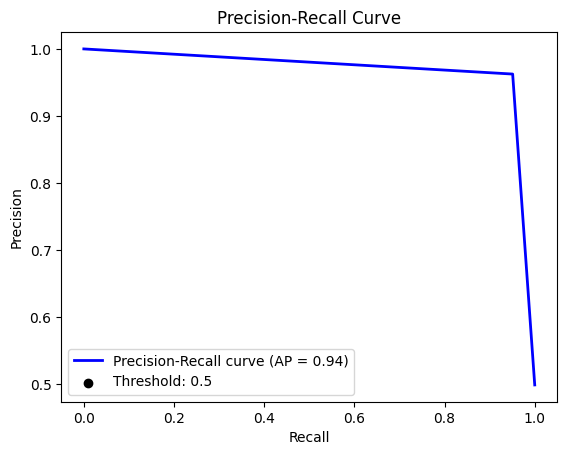

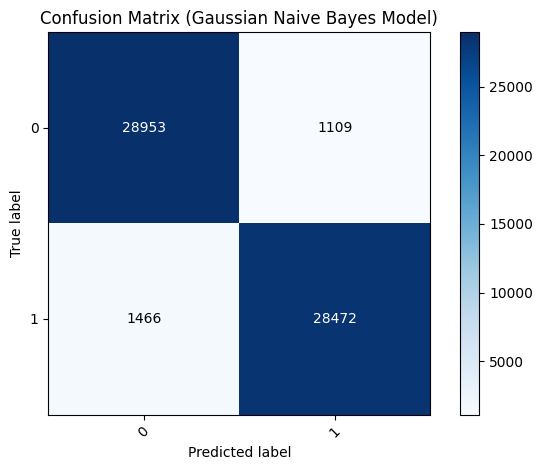

Threshold: 0.1
Accuracy: 0.9571
Confusion Matrix:
 [[28954  1108]
 [ 1466 28472]]
Precision: 0.9625422582826234
Recall: 0.9510321330750217
False Positive Rate: 0.036857161865478015
False Negative Rate: 0.04896786692497829


C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


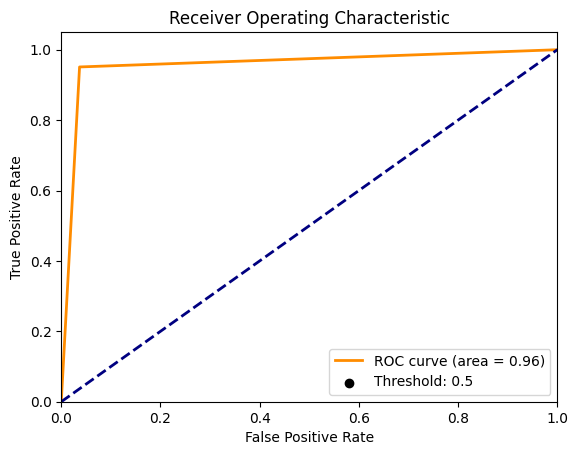

C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


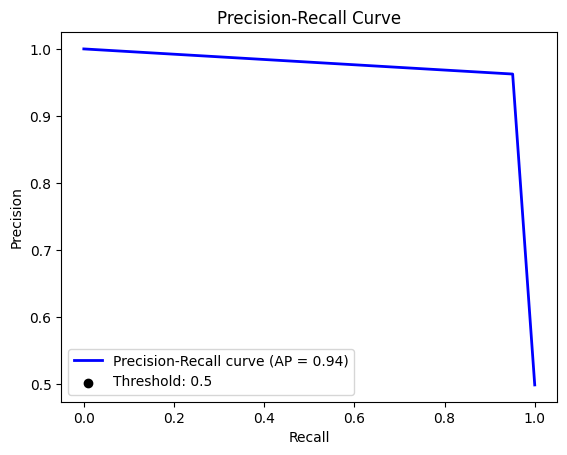

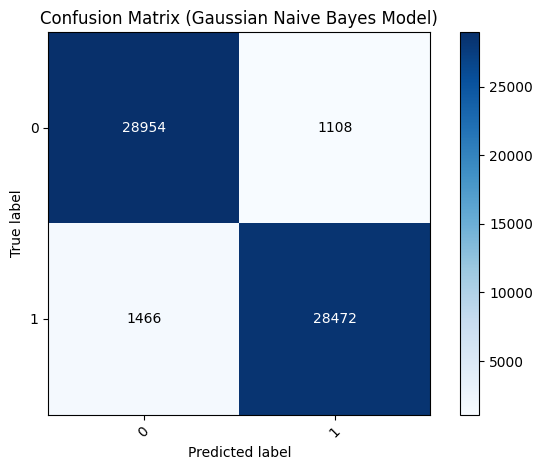

Threshold: 0.15
Accuracy: 0.9571
Confusion Matrix:
 [[28954  1108]
 [ 1466 28472]]
Precision: 0.9625422582826234
Recall: 0.9510321330750217
False Positive Rate: 0.036857161865478015
False Negative Rate: 0.04896786692497829


C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


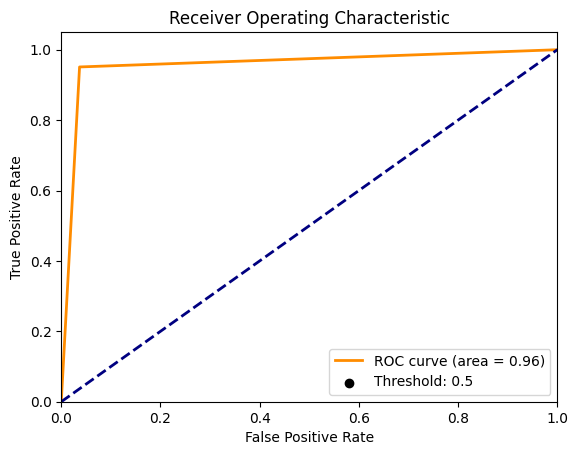

C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


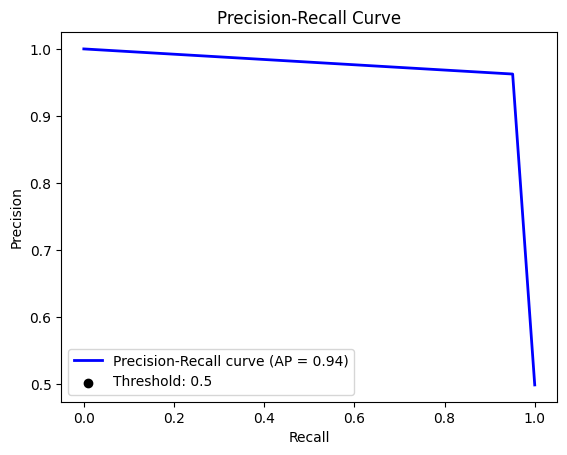

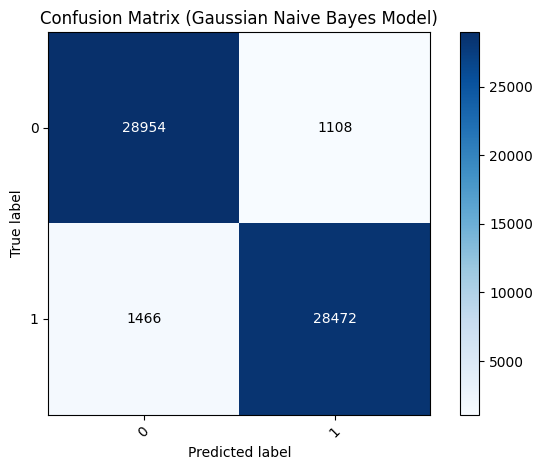

Threshold: 0.2
Accuracy: 0.9571333333333333
Confusion Matrix:
 [[28956  1106]
 [ 1466 28472]]
Precision: 0.9626073432956928
Recall: 0.9510321330750217
False Positive Rate: 0.03679063269243563
False Negative Rate: 0.04896786692497829


C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


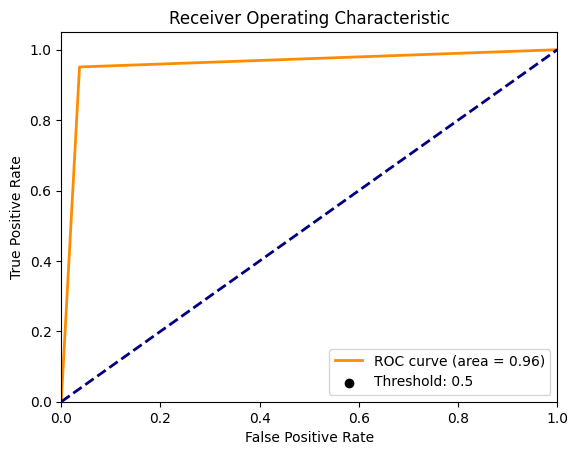

C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


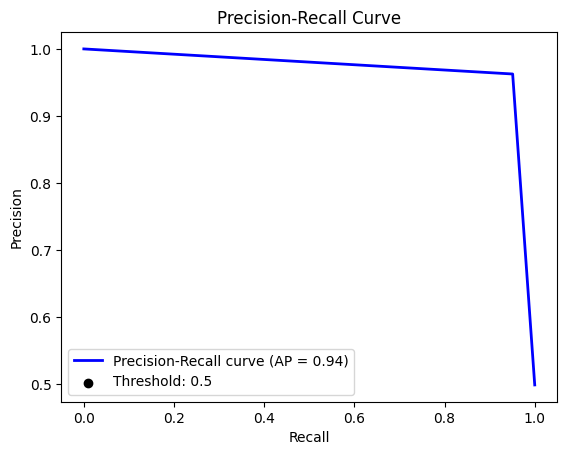

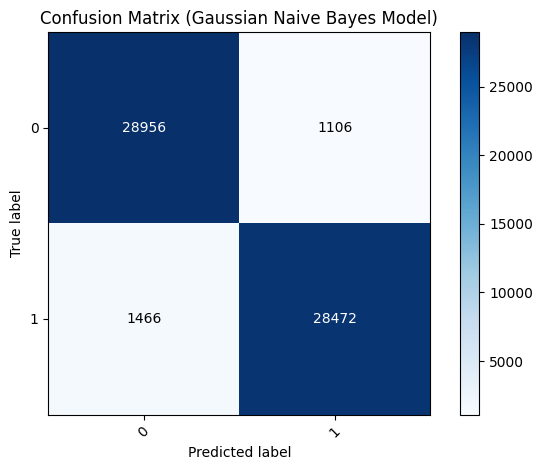

Threshold: 0.25
Accuracy: 0.9571333333333333
Confusion Matrix:
 [[28956  1106]
 [ 1466 28472]]
Precision: 0.9626073432956928
Recall: 0.9510321330750217
False Positive Rate: 0.03679063269243563
False Negative Rate: 0.04896786692497829


C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


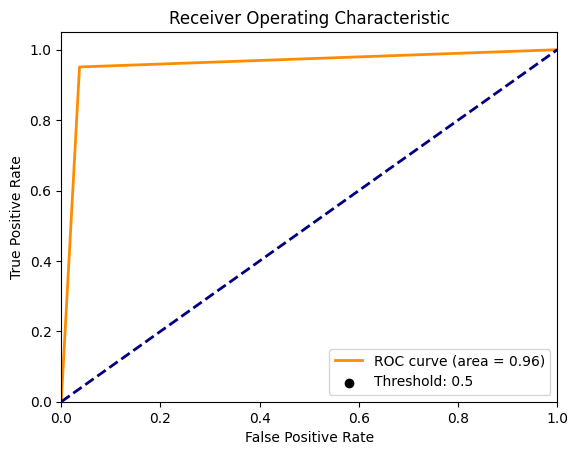

C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


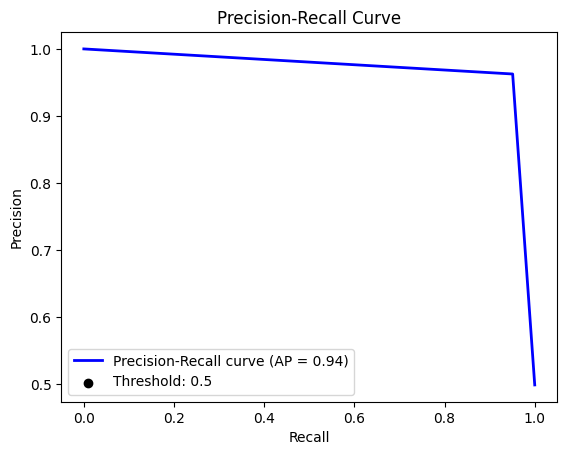

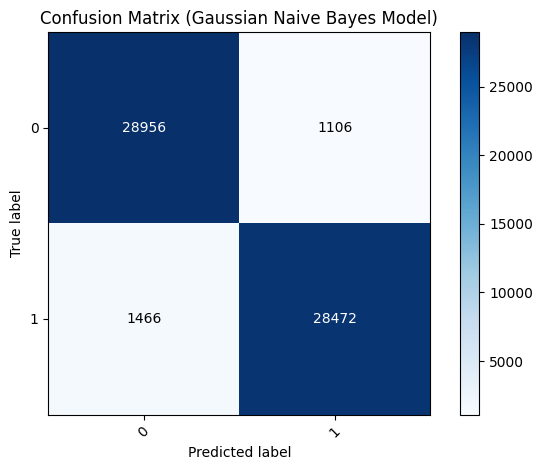

Threshold: 0.3
Accuracy: 0.9571333333333333
Confusion Matrix:
 [[28956  1106]
 [ 1466 28472]]
Precision: 0.9626073432956928
Recall: 0.9510321330750217
False Positive Rate: 0.03679063269243563
False Negative Rate: 0.04896786692497829


C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


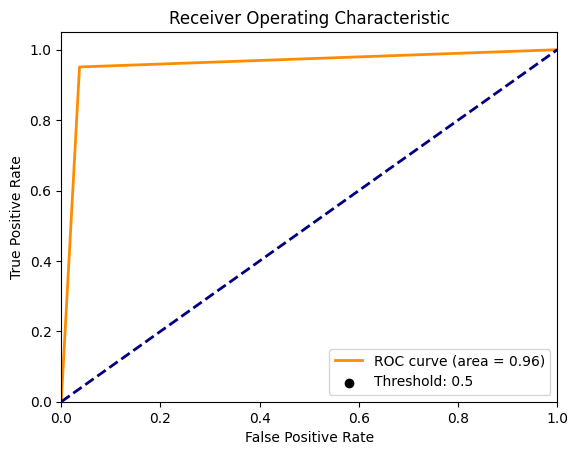

C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


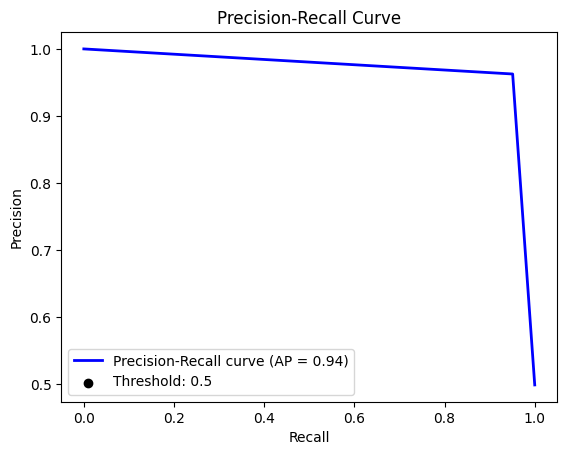

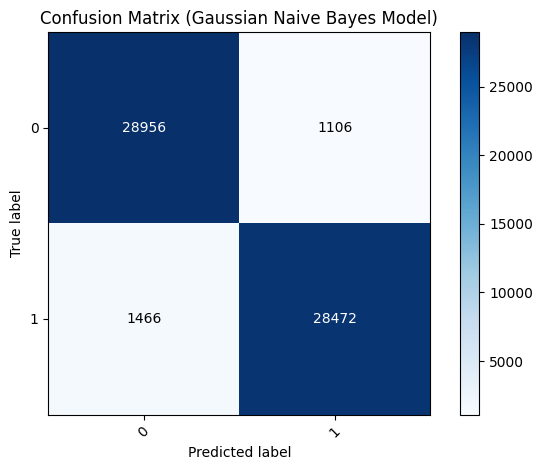

Threshold: 0.35
Accuracy: 0.9571333333333333
Confusion Matrix:
 [[28956  1106]
 [ 1466 28472]]
Precision: 0.9626073432956928
Recall: 0.9510321330750217
False Positive Rate: 0.03679063269243563
False Negative Rate: 0.04896786692497829


C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


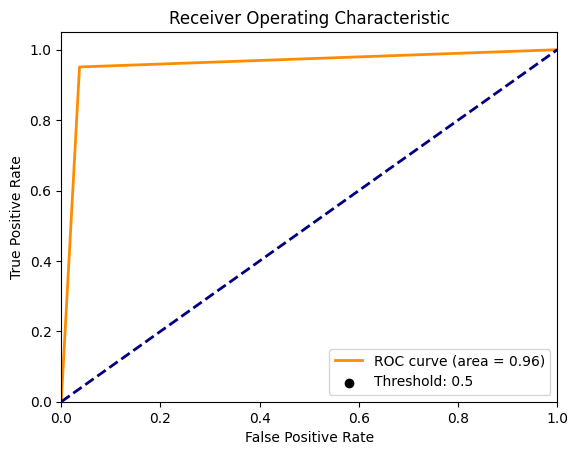

C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


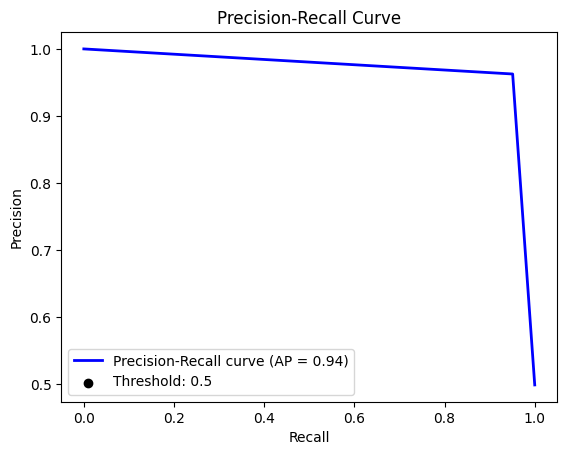

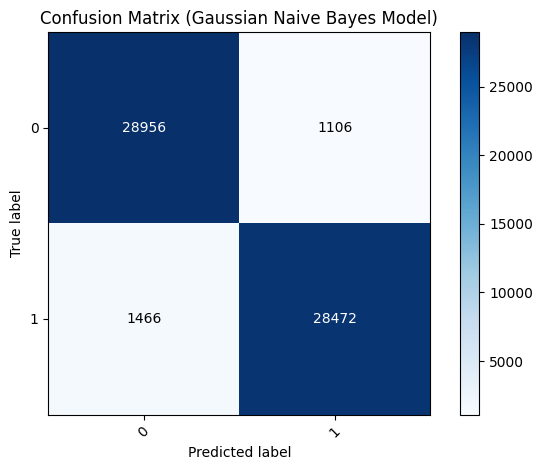

Threshold: 0.4
Accuracy: 0.9571333333333333
Confusion Matrix:
 [[28956  1106]
 [ 1466 28472]]
Precision: 0.9626073432956928
Recall: 0.9510321330750217
False Positive Rate: 0.03679063269243563
False Negative Rate: 0.04896786692497829


C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


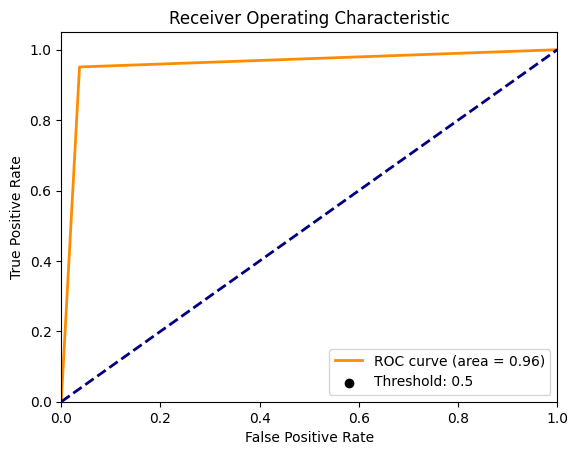

C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


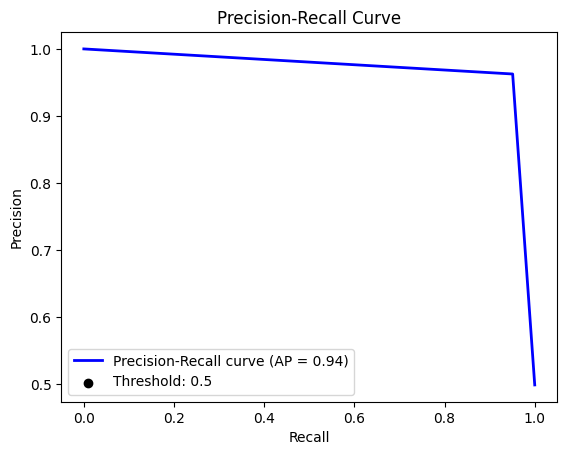

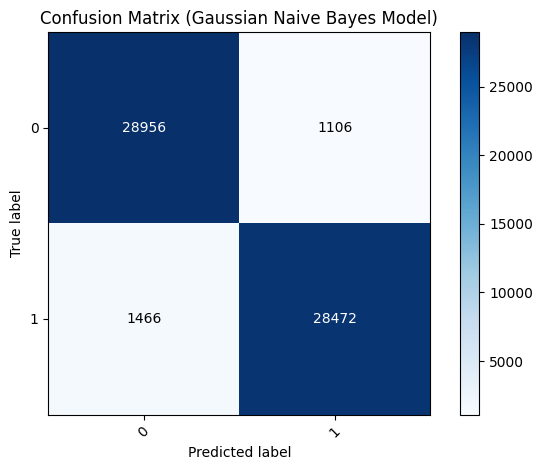

Threshold: 0.45
Accuracy: 0.95715
Confusion Matrix:
 [[28957  1105]
 [ 1466 28472]]
Precision: 0.9626398891030192
Recall: 0.9510321330750217
False Positive Rate: 0.03675736810591444
False Negative Rate: 0.04896786692497829


C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


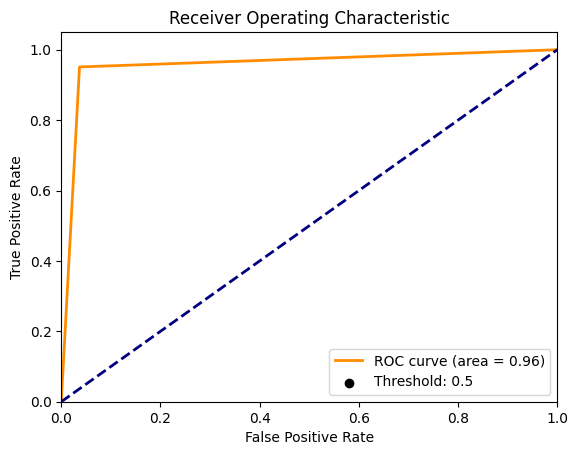

C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


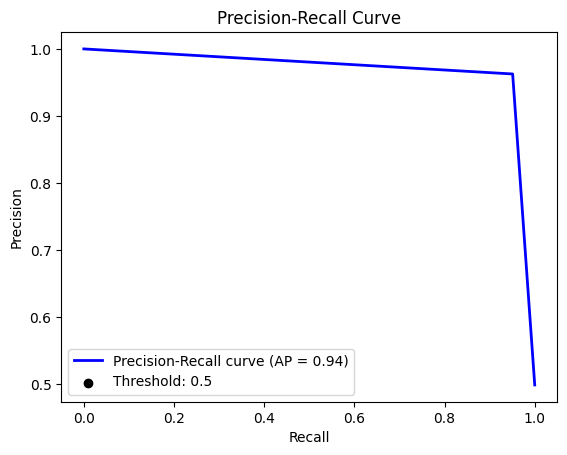

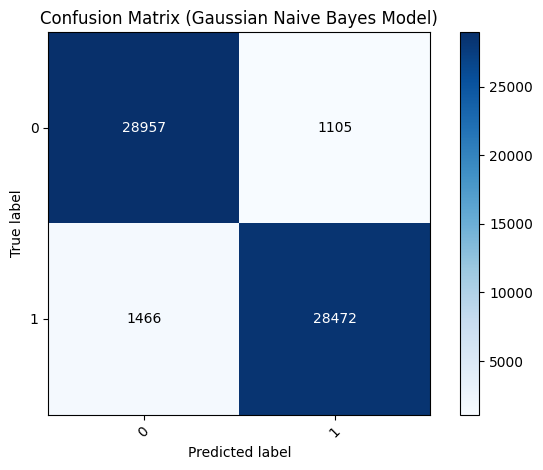

Threshold: 0.5
Accuracy: 0.95715
Confusion Matrix:
 [[28957  1105]
 [ 1466 28472]]
Precision: 0.9626398891030192
Recall: 0.9510321330750217
False Positive Rate: 0.03675736810591444
False Negative Rate: 0.04896786692497829


C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


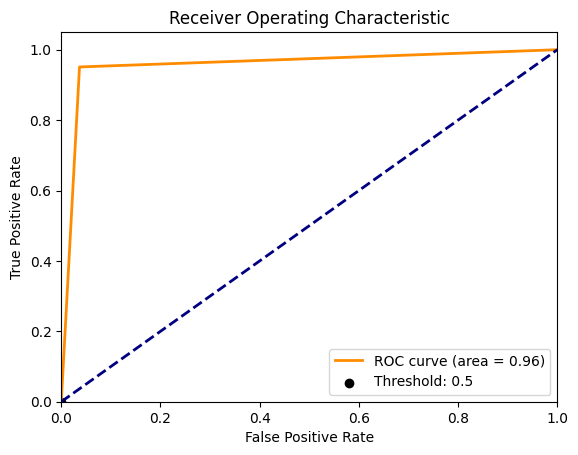

C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


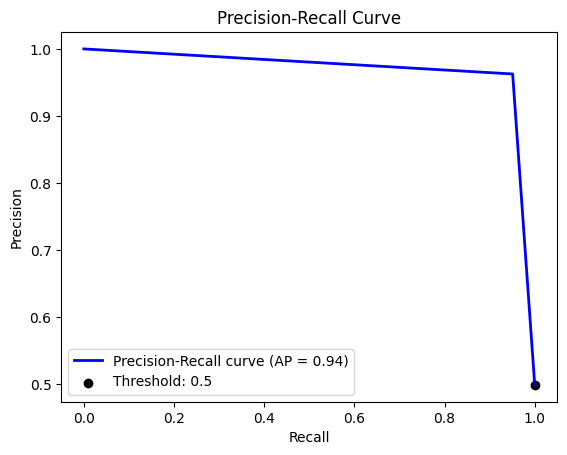

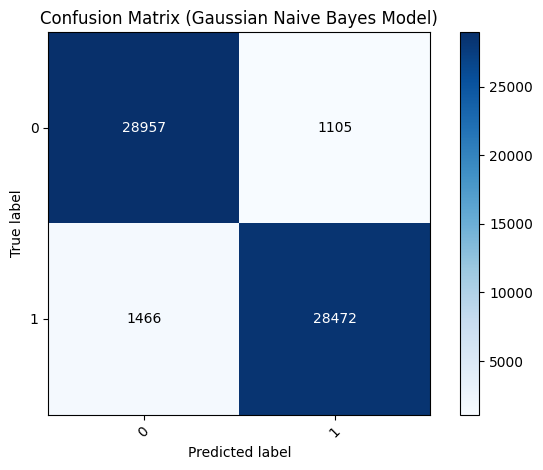

Threshold: 0.55
Accuracy: 0.95715
Confusion Matrix:
 [[28957  1105]
 [ 1466 28472]]
Precision: 0.9626398891030192
Recall: 0.9510321330750217
False Positive Rate: 0.03675736810591444
False Negative Rate: 0.04896786692497829


C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


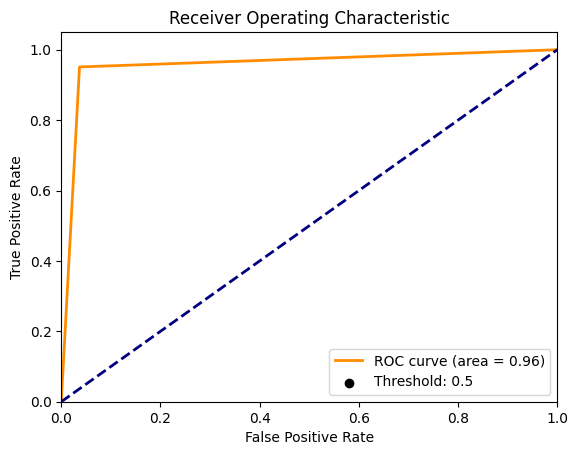

C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


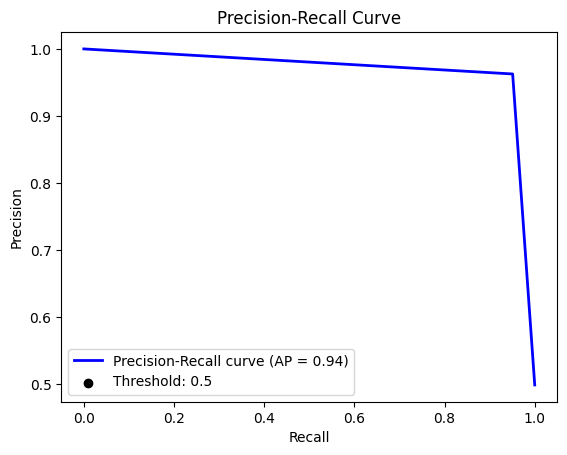

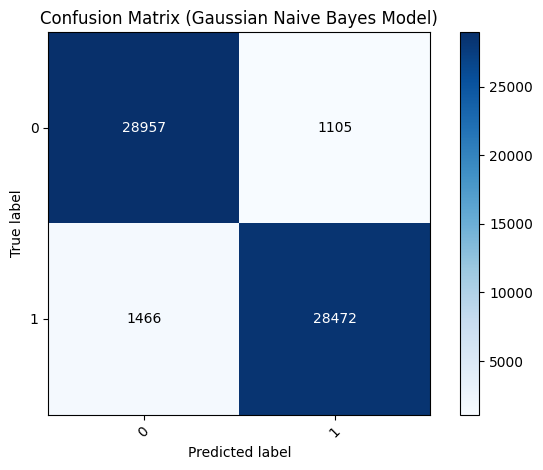

Threshold: 0.6
Accuracy: 0.95715
Confusion Matrix:
 [[28957  1105]
 [ 1466 28472]]
Precision: 0.9626398891030192
Recall: 0.9510321330750217
False Positive Rate: 0.03675736810591444
False Negative Rate: 0.04896786692497829


C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


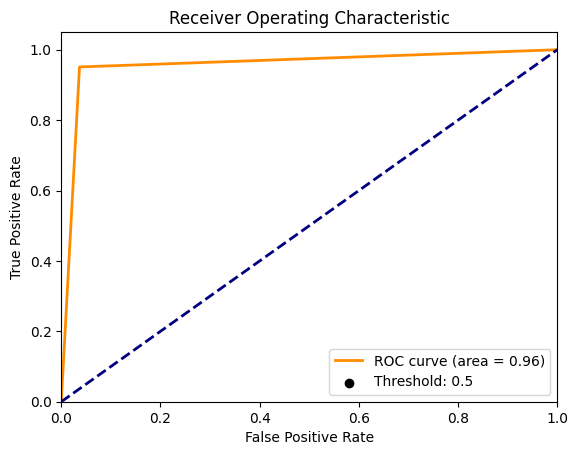

C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


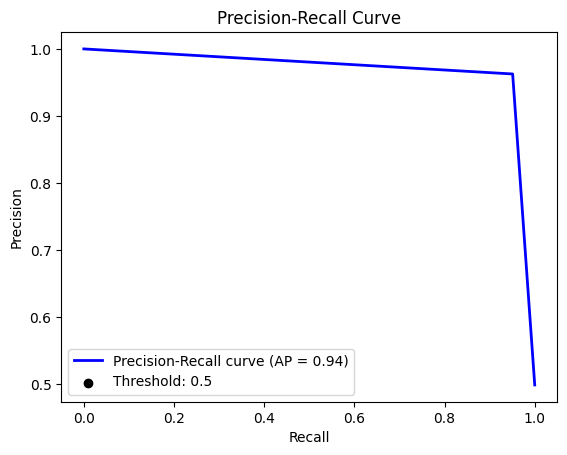

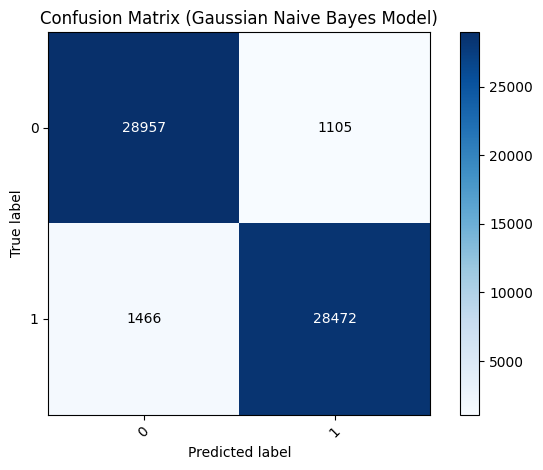

Threshold: 0.65
Accuracy: 0.95715
Confusion Matrix:
 [[28957  1105]
 [ 1466 28472]]
Precision: 0.9626398891030192
Recall: 0.9510321330750217
False Positive Rate: 0.03675736810591444
False Negative Rate: 0.04896786692497829


C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


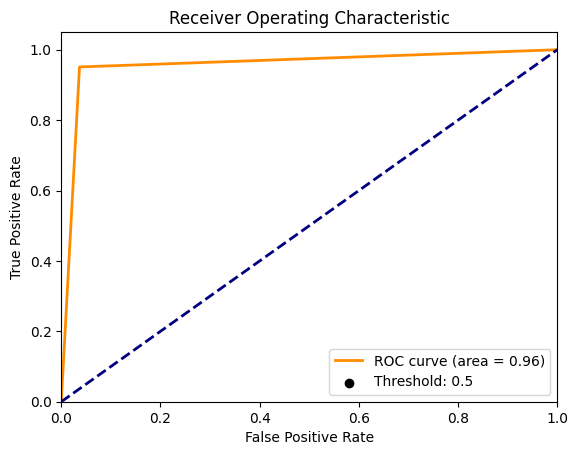

C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


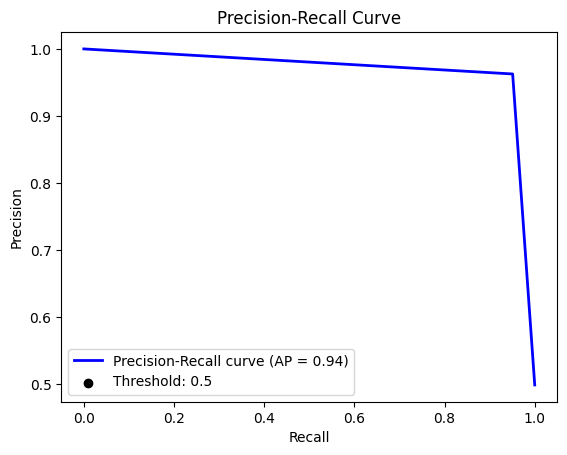

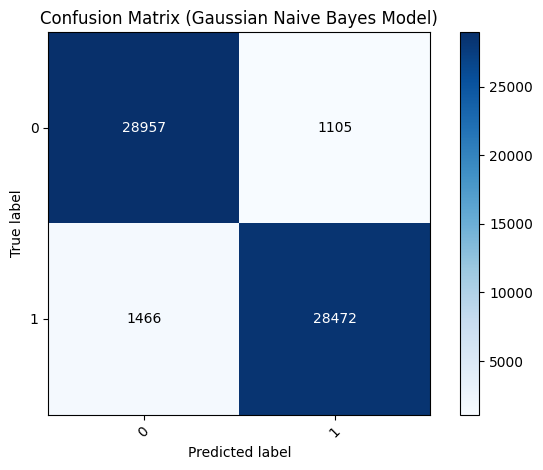

Threshold: 0.7
Accuracy: 0.95715
Confusion Matrix:
 [[28957  1105]
 [ 1466 28472]]
Precision: 0.9626398891030192
Recall: 0.9510321330750217
False Positive Rate: 0.03675736810591444
False Negative Rate: 0.04896786692497829


C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


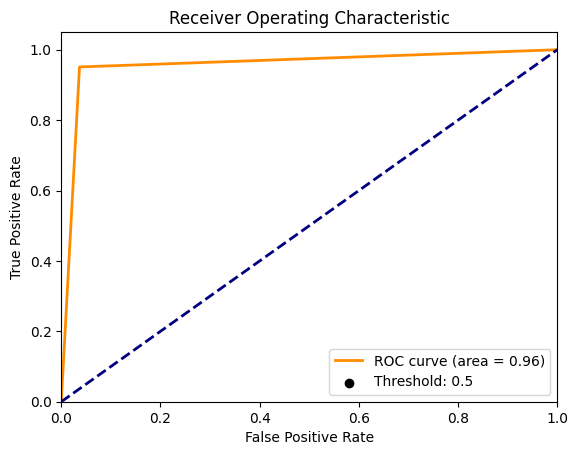

C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


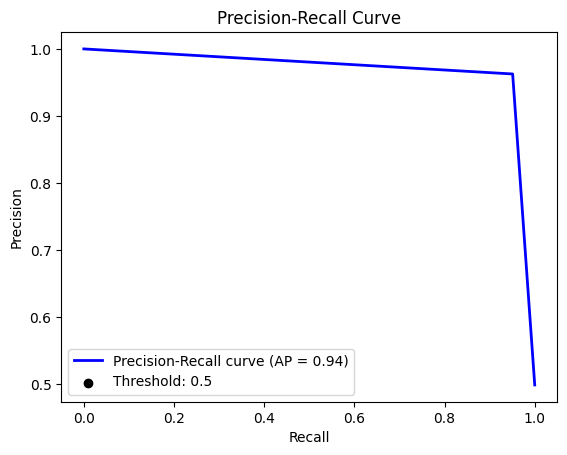

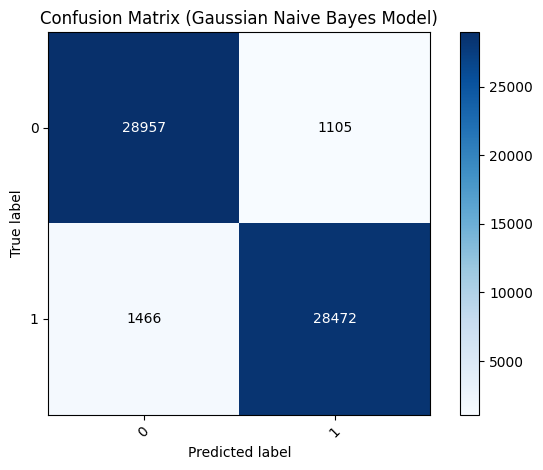

Threshold: 0.75
Accuracy: 0.95715
Confusion Matrix:
 [[28957  1105]
 [ 1466 28472]]
Precision: 0.9626398891030192
Recall: 0.9510321330750217
False Positive Rate: 0.03675736810591444
False Negative Rate: 0.04896786692497829


C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


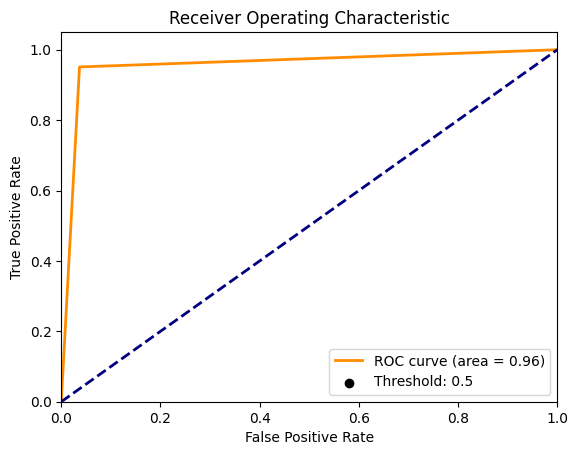

C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


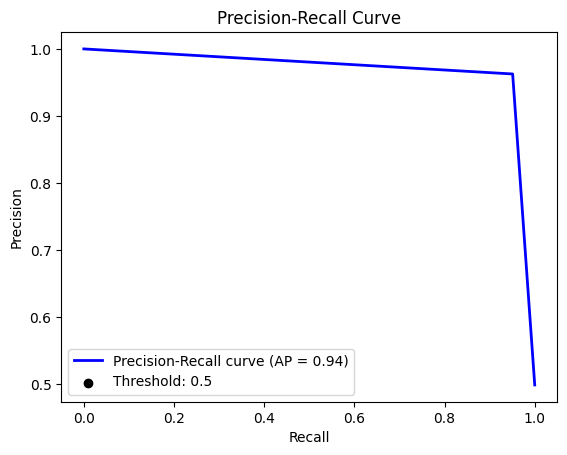

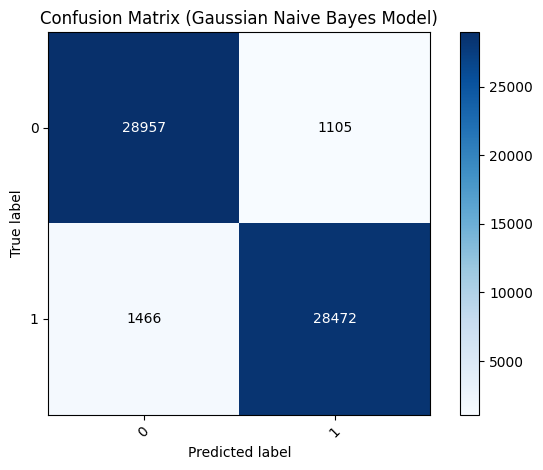

Threshold: 0.8
Accuracy: 0.95715
Confusion Matrix:
 [[28957  1105]
 [ 1466 28472]]
Precision: 0.9626398891030192
Recall: 0.9510321330750217
False Positive Rate: 0.03675736810591444
False Negative Rate: 0.04896786692497829


C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


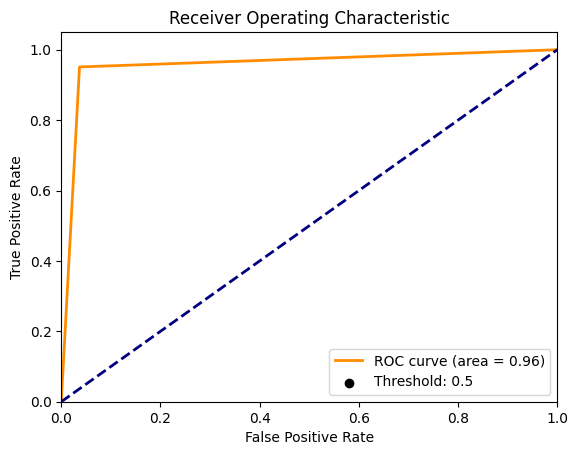

C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


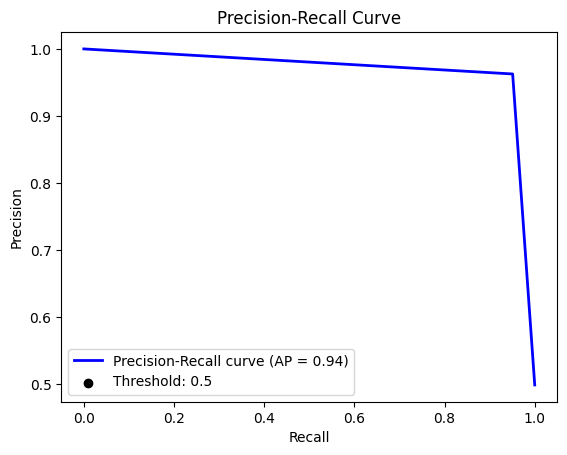

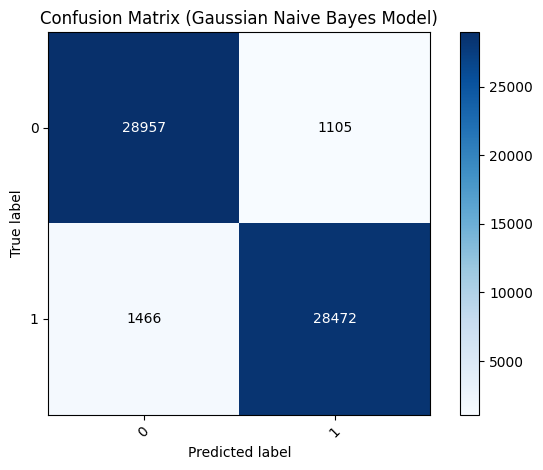

Threshold: 0.85
Accuracy: 0.9571833333333334
Confusion Matrix:
 [[28959  1103]
 [ 1466 28472]]
Precision: 0.9627049873203719
Recall: 0.9510321330750217
False Positive Rate: 0.03669083893287207
False Negative Rate: 0.04896786692497829


C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


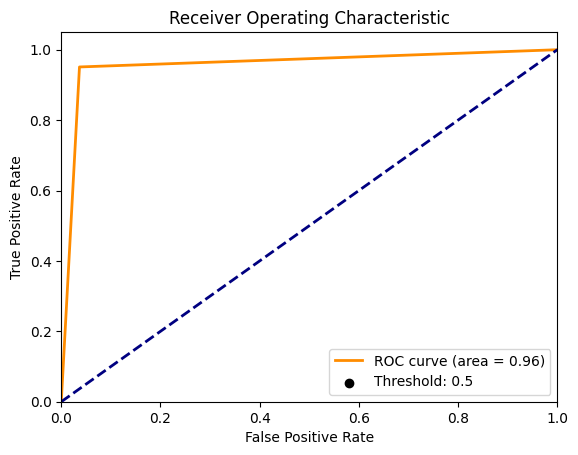

C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


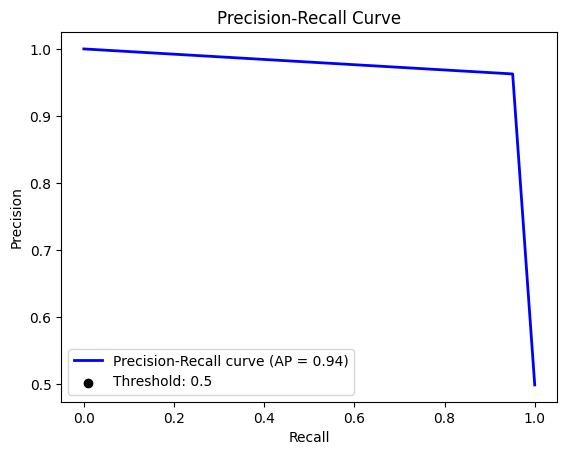

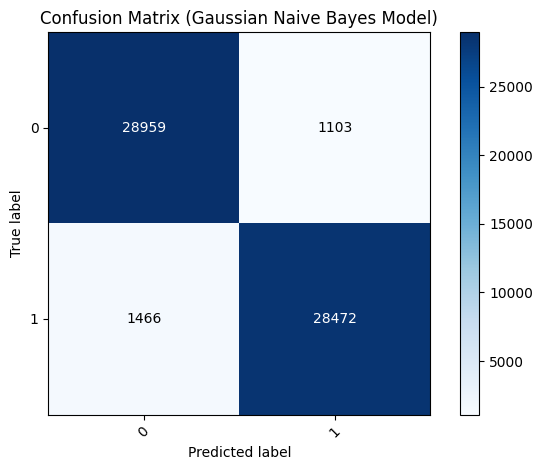

Threshold: 0.9
Accuracy: 0.9571833333333334
Confusion Matrix:
 [[28959  1103]
 [ 1466 28472]]
Precision: 0.9627049873203719
Recall: 0.9510321330750217
False Positive Rate: 0.03669083893287207
False Negative Rate: 0.04896786692497829


C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


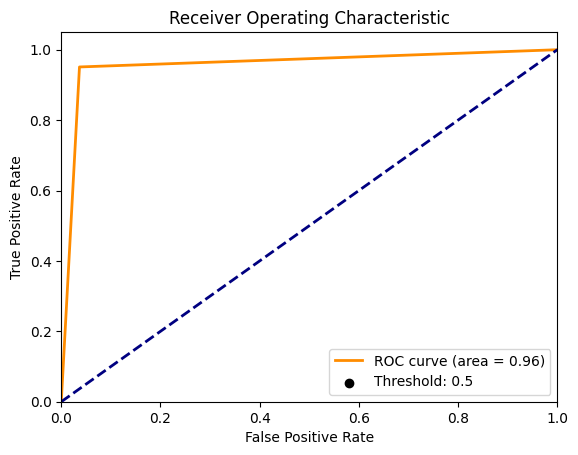

C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


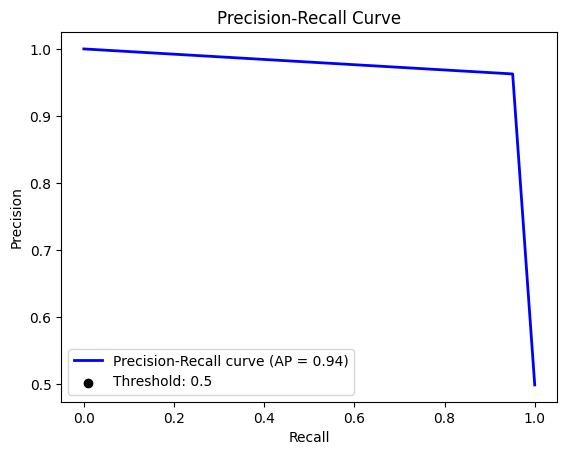

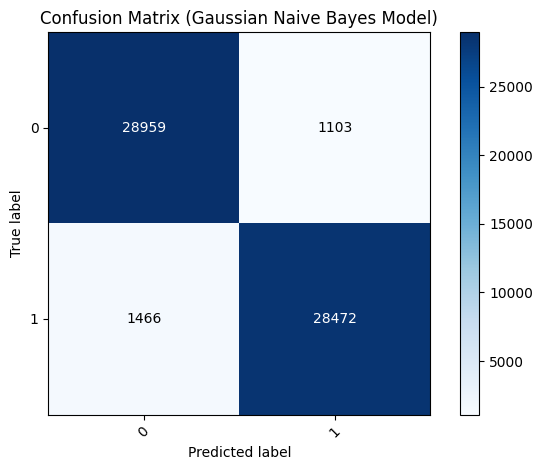

Threshold: 0.95
Accuracy: 0.9571833333333334
Confusion Matrix:
 [[28959  1103]
 [ 1466 28472]]
Precision: 0.9627049873203719
Recall: 0.9510321330750217
False Positive Rate: 0.03669083893287207
False Negative Rate: 0.04896786692497829


C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


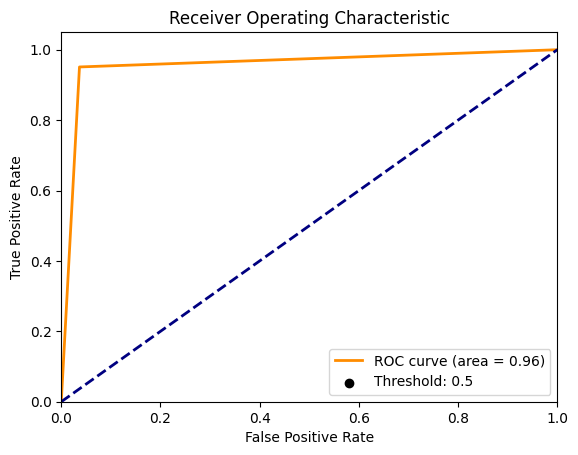

C:\Users\siman\AppData\Local\Temp\ipykernel_11276\3885209566.py:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


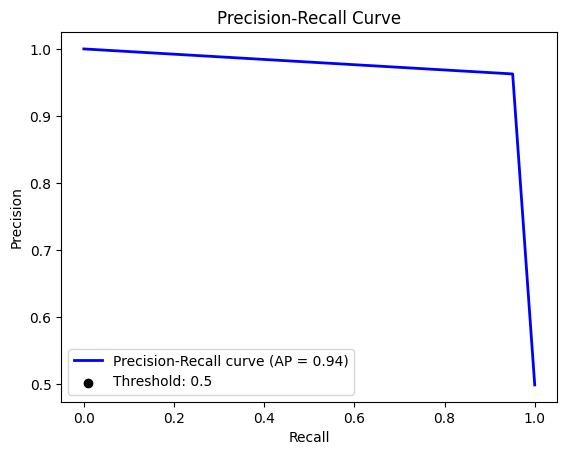

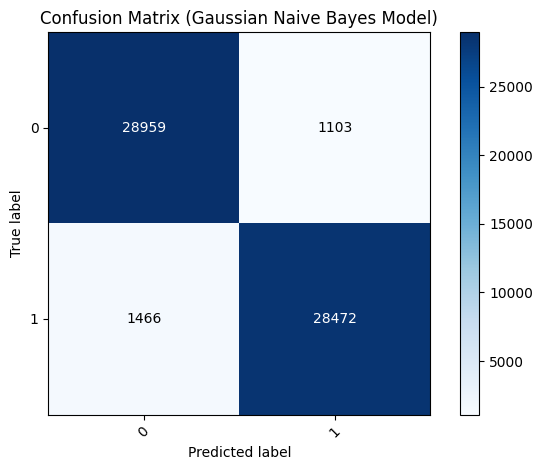

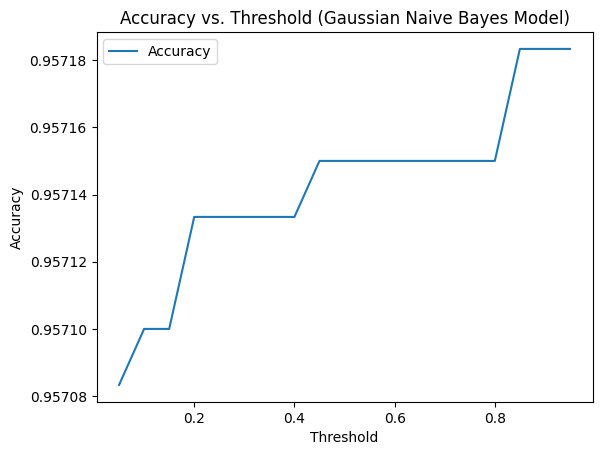

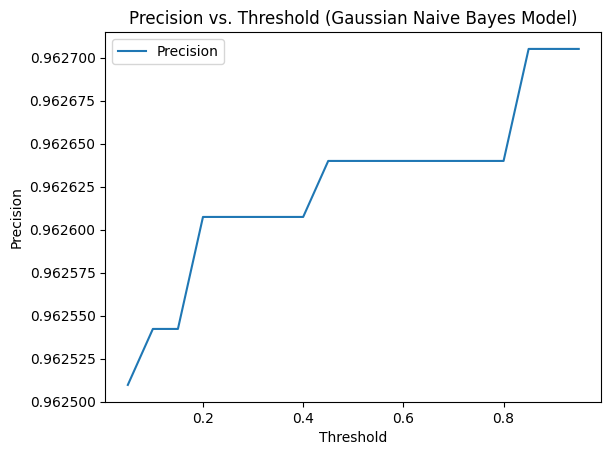

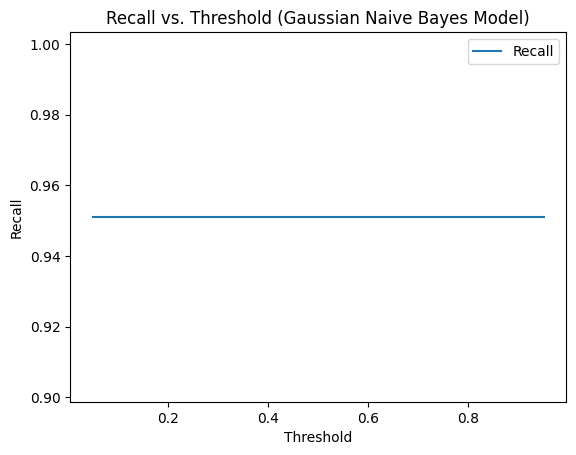

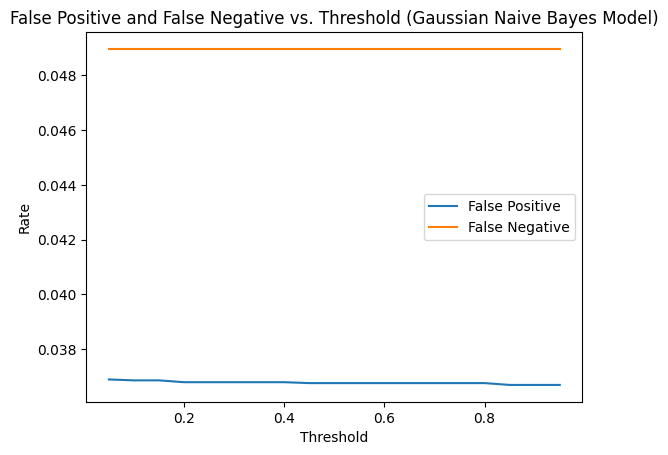

Maximum Accuracy: 0.9571833333333334
Best Threshold: 0.85


In [15]:
# Predictions and Evaluation
print('Making predictions with the Gaussian Naive Bayes model...')

# Initialize lists to store evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
false_positive_list = []
false_negative_list = []

# Define the thresholds to test
thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

max_accuracy = 0.0
best_threshold = 0.0

for threshold in thresholds:
    print('Threshold:', threshold)
    y_pred = (gnb_model.predict_proba(X_test)[:, 1] >= threshold).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    false_positive = confusion[0, 1] / (confusion[0, 1] + confusion[0, 0])
    false_negative = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])

    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion)
    print("Precision:", precision)
    print("Recall:", recall)
    print("False Positive Rate:", false_positive)
    print("False Negative Rate:", false_negative)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    false_positive_list.append(false_positive)
    false_negative_list.append(false_negative)

    # Plot all the evaluation metrics
    plot_roc_curve_threshold(y_test, y_pred, threshold)
    plot_precision_recall_curve_threshold(y_test, y_pred, threshold)
    plot_confusion_matrix(y_test, y_pred, classes=np.array([0, 1]), title='Confusion Matrix (Gaussian Naive Bayes Model)')

    # Update max accuracy and best threshold if current accuracy is higher
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_threshold = threshold

# Plotting accuracy vs. threshold
plt.plot(thresholds, accuracy_list, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold (Gaussian Naive Bayes Model)')
plt.legend()
plt.show()

# Plotting precision vs. threshold
plt.plot(thresholds, precision_list, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs. Threshold (Gaussian Naive Bayes Model)')
plt.legend()
plt.show()

# Plotting recall vs. threshold
plt.plot(thresholds, recall_list, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs. Threshold (Gaussian Naive Bayes Model)')
plt.legend()
plt.show()

# Plotting false positive and false negative rates vs. threshold
plt.plot(thresholds, false_positive_list, label='False Positive')
plt.plot(thresholds, false_negative_list, label='False Negative')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('False Positive and False Negative vs. Threshold (Gaussian Naive Bayes Model)')
plt.legend()
plt.show()

# Display maximum accuracy and best threshold
print('Maximum Accuracy:', max_accuracy)
print('Best Threshold:', best_threshold)

### Random Forest model
Next, we will use the random forest model to classify the URLs and evaluate the model using the test set. The model will use 100 estimators (trees).

In [6]:
# Model Training with RandomForestClassifier
print('Training the Random Forest model with 100 estimators and a random state of 42...')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print('Random Forest model training complete.')

# Save the model to disk
print('Saving the Random Forest model to disk...')
with open('random_forest_model.pkl', 'wb') as f:
    pkl.dump(rf_model, f)

print('Random Forest model saved to disk.')

Training the Random Forest model with 100 estimators and a random state of 42...
Random Forest model training complete.
Saving the Random Forest model to disk...
Random Forest model saved to disk.


#### Functions for graphs

In [17]:
# ROC Curve
def plot_roc_curve(model, X_test, y_test, threshold=0.5):
    fpr, tpr, _ = roc_curve(y_test, (model.predict_proba(X_test)[:, 1] >= threshold).astype(int))
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Precision-Recall Curve
def plot_precision_recall_curve(model, X_test, y_test, threshold=0.5):
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# Confusion Matrix Heatmap
def plot_confusion_matrix(model, X_test, y_test, threshold=0.5):
    cm = confusion_matrix(y_test, (model.predict_proba(X_test)[:, 1] >= threshold).astype(int))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = ['Benign', 'Malicious']  # Class labels
    plt.xticks(ticks=[0, 1], labels=classes)
    plt.yticks(ticks=[0, 1], labels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

#### Testing different thresholds for the Random Forest model

Feature Importance Plot for the Random Forest model...


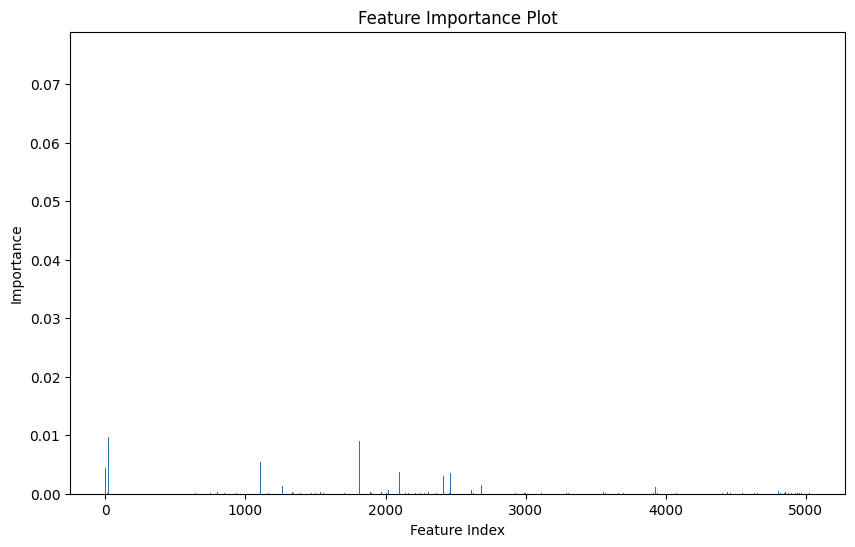

Making predictions with the Random Forest model...
Testing the Random Forest model with different thresholds...
Threshold: 0.05
Accuracy: 0.8972
Confusion Matrix:
 [[24148  5914]
 [  254 29684]]
Precision: 0.8338670711837743
Recall: 0.9915157993185918
False Positive Rate: 0.19672676468631495
False Negative Rate: 0.008484200681408243


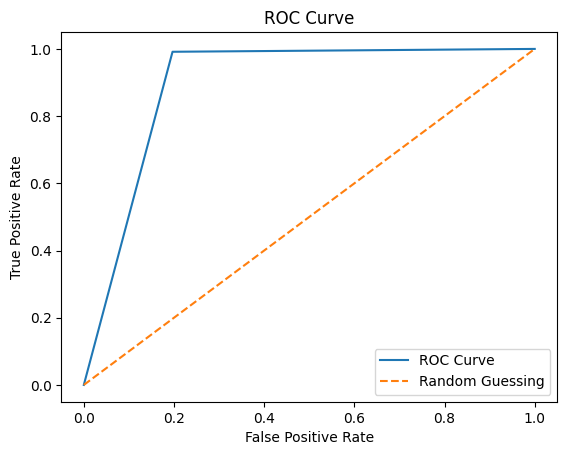

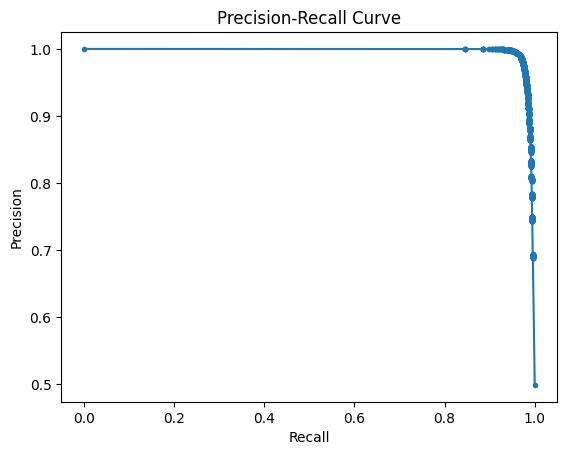

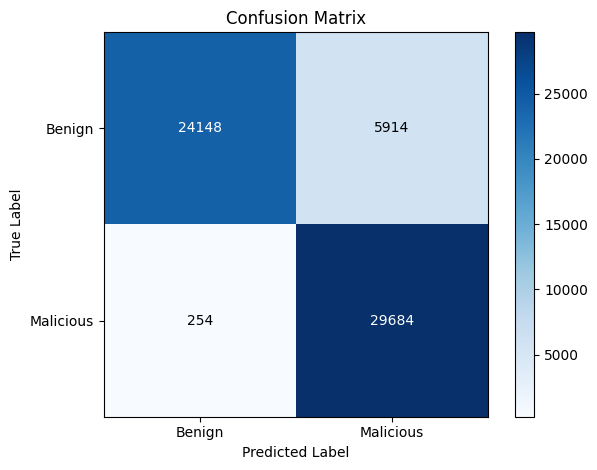

Threshold: 0.1
Accuracy: 0.942
Confusion Matrix:
 [[26983  3079]
 [  401 29537]]
Precision: 0.905598479273976
Recall: 0.9866056516801389
False Positive Rate: 0.1024216618987426
False Negative Rate: 0.013394348319861046


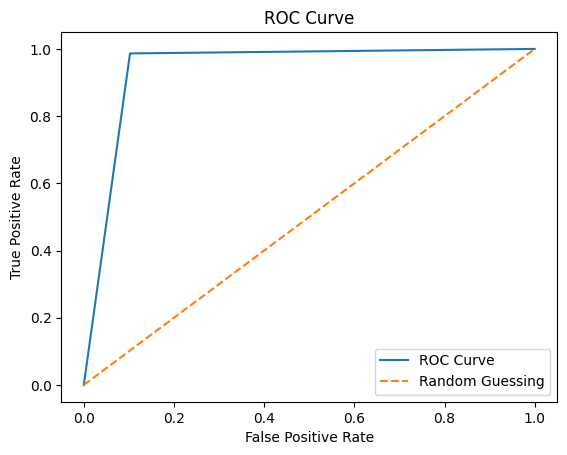

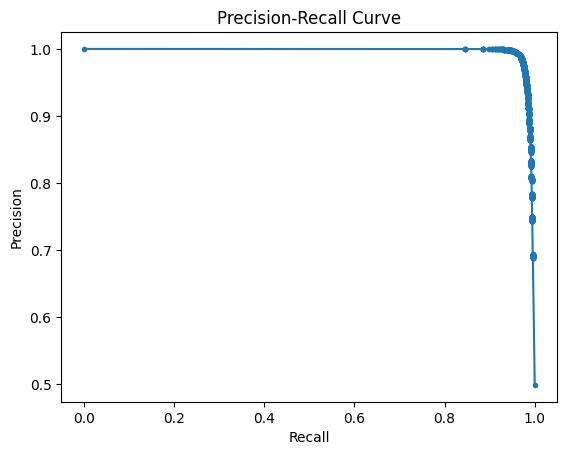

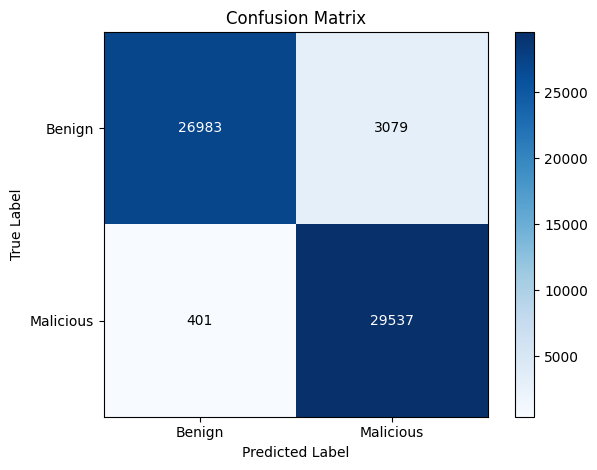

Threshold: 0.15
Accuracy: 0.9601333333333333
Confusion Matrix:
 [[28183  1879]
 [  513 29425]]
Precision: 0.9399757219524661
Recall: 0.9828645868127464
False Positive Rate: 0.06250415807331515
False Negative Rate: 0.01713541318725366


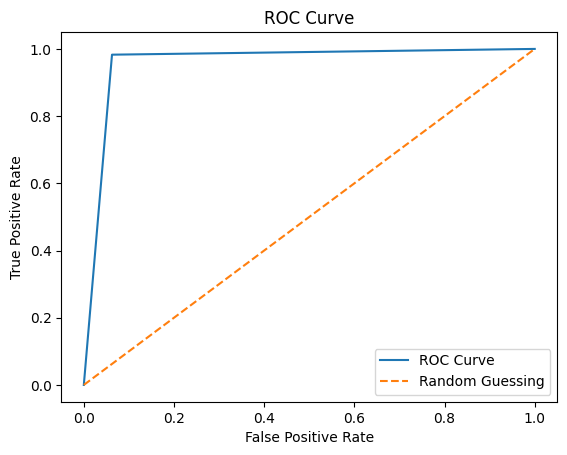

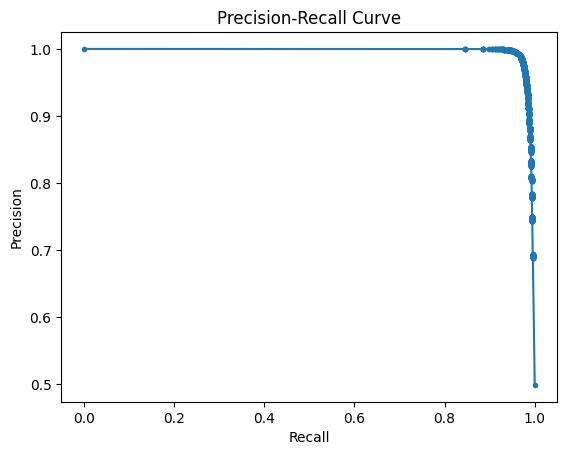

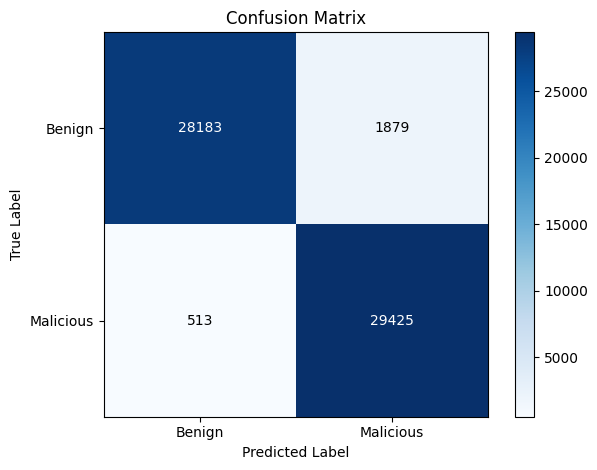

Threshold: 0.2
Accuracy: 0.9676166666666667
Confusion Matrix:
 [[28714  1348]
 [  595 29343]]
Precision: 0.9560783291518686
Recall: 0.9801255928919768
False Positive Rate: 0.0448406626305635
False Negative Rate: 0.019874407108023247


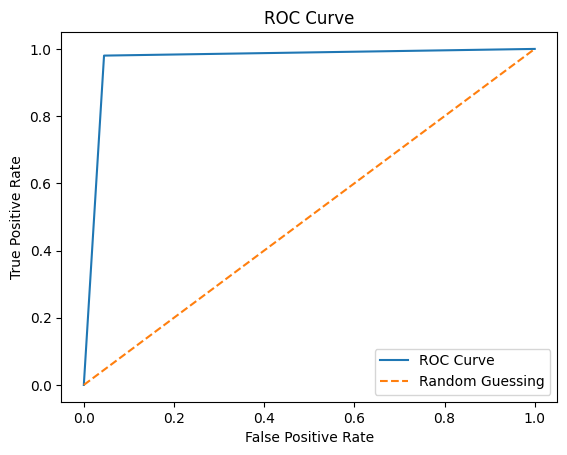

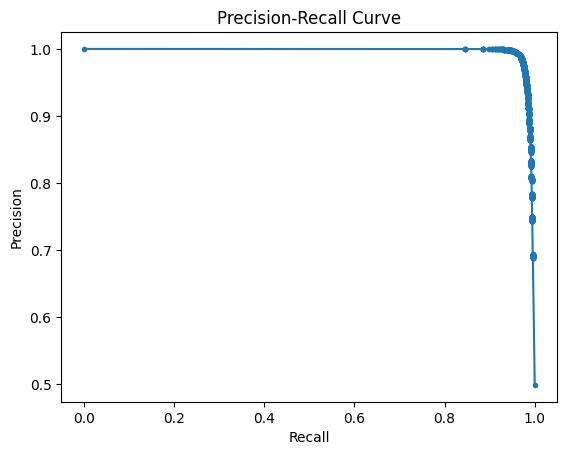

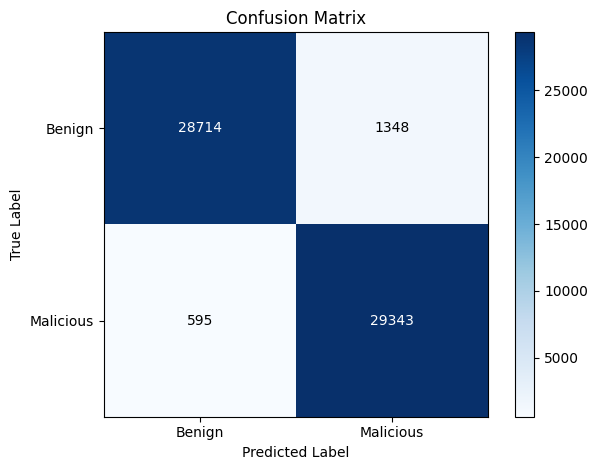

Threshold: 0.25
Accuracy: 0.9719333333333333
Confusion Matrix:
 [[29034  1028]
 [  656 29282]]
Precision: 0.9660838007258331
Recall: 0.9780880486338432
False Positive Rate: 0.03419599494378285
False Negative Rate: 0.021911951366156725


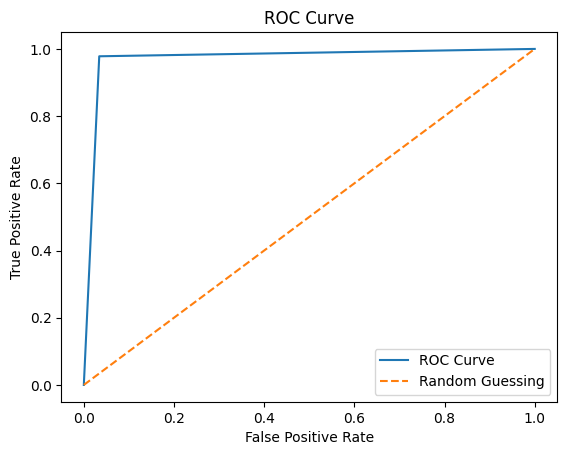

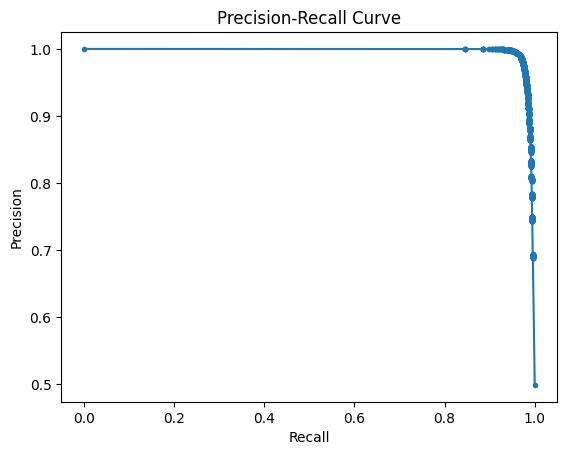

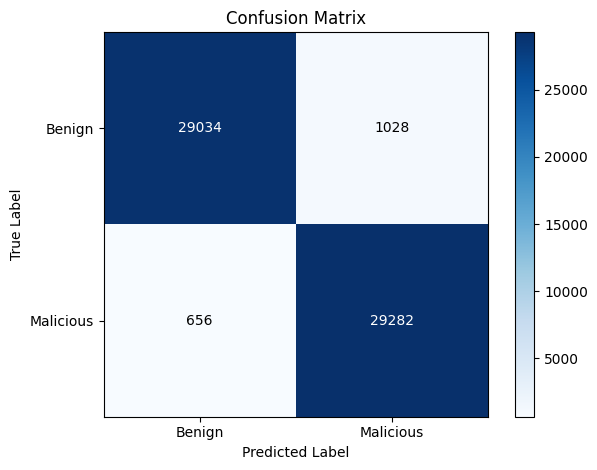

Threshold: 0.3
Accuracy: 0.9748333333333333
Confusion Matrix:
 [[29276   786]
 [  724 29214]]
Precision: 0.9738
Recall: 0.9758166878214978
False Positive Rate: 0.02614596500565498
False Negative Rate: 0.02418331217850224


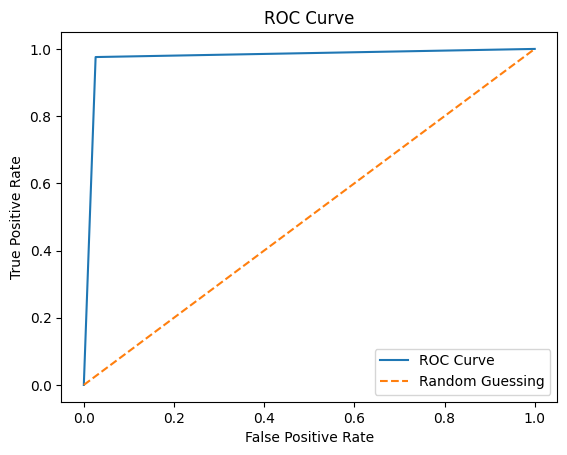

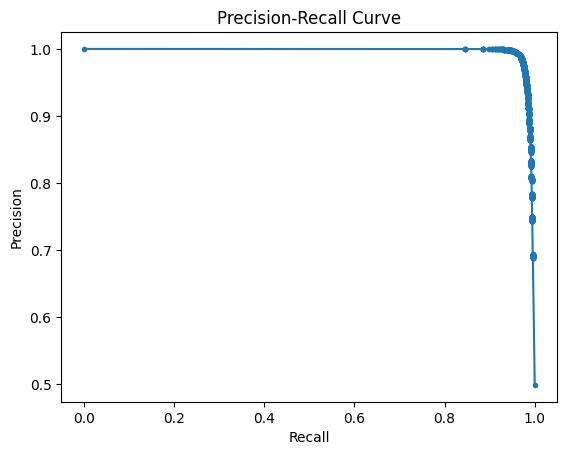

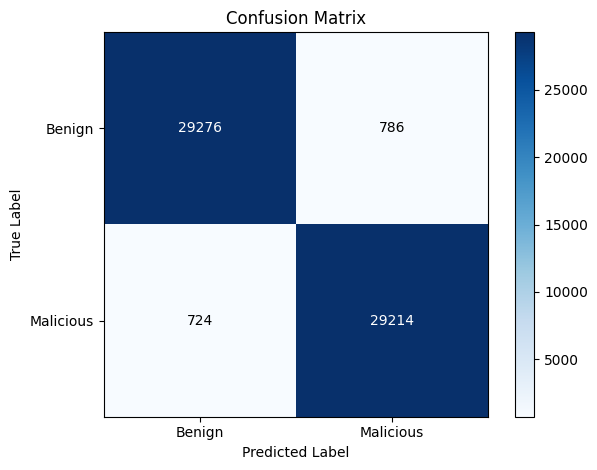

Threshold: 0.35
Accuracy: 0.9769166666666667
Confusion Matrix:
 [[29464   598]
 [  787 29151]]
Precision: 0.9798984839826549
Recall: 0.9737123388335894
False Positive Rate: 0.019892222739671346
False Negative Rate: 0.026287661166410584


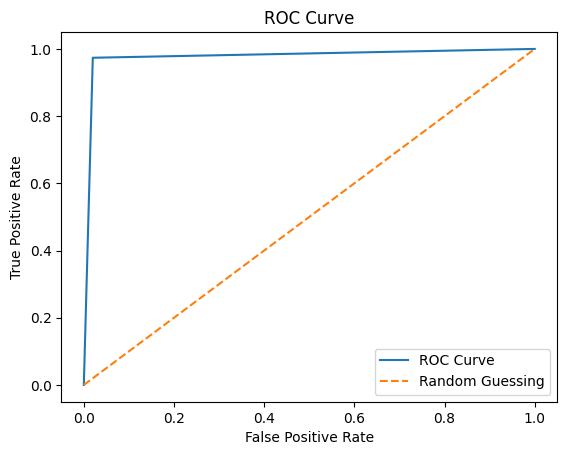

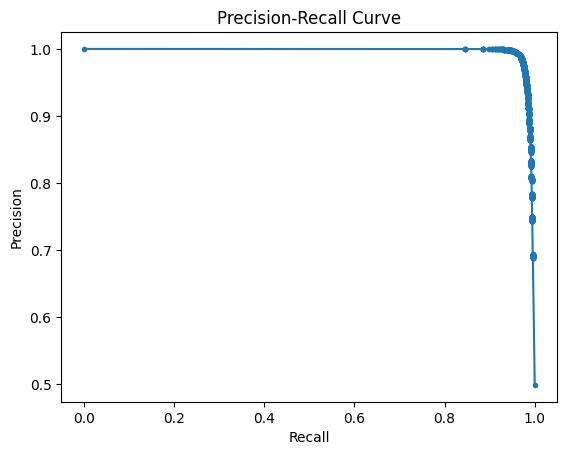

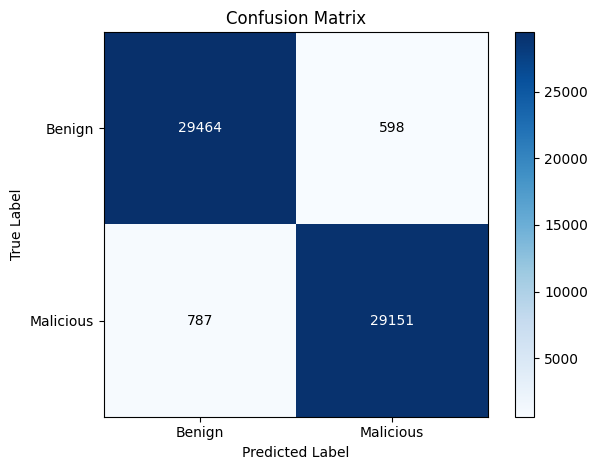

Threshold: 0.4
Accuracy: 0.9781
Confusion Matrix:
 [[29602   460]
 [  854 29084]]
Precision: 0.9844300027078257
Recall: 0.9714743803861313
False Positive Rate: 0.015301709799747189
False Negative Rate: 0.028525619613868663


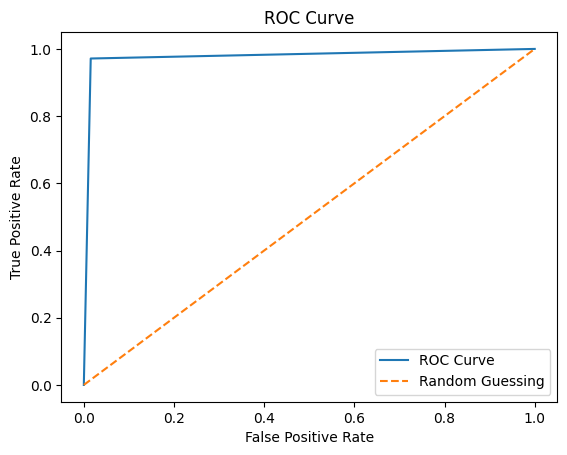

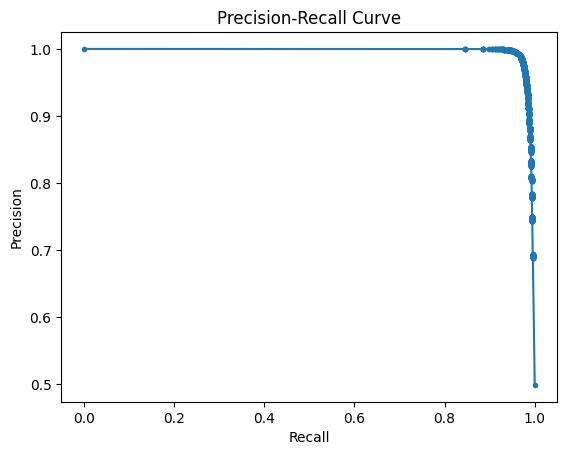

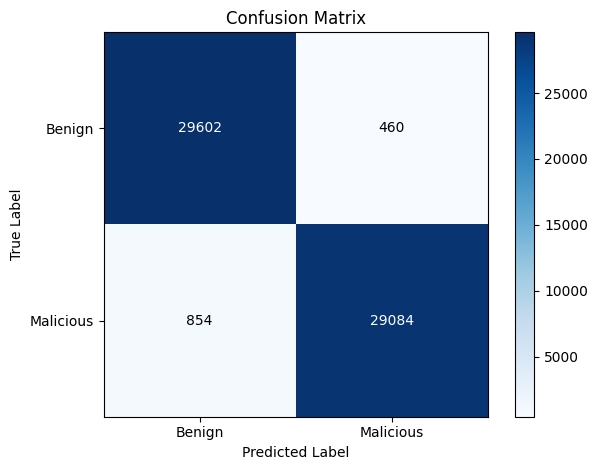

Threshold: 0.45
Accuracy: 0.9785833333333334
Confusion Matrix:
 [[29693   369]
 [  916 29022]]
Precision: 0.9874451362662039
Recall: 0.9694034337631104
False Positive Rate: 0.01227463242631894
False Negative Rate: 0.030596566236889573


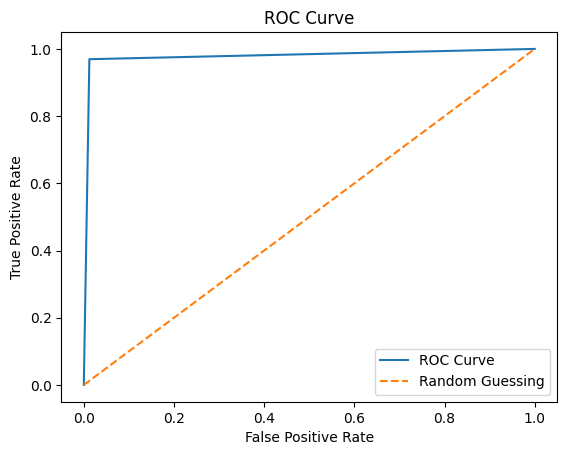

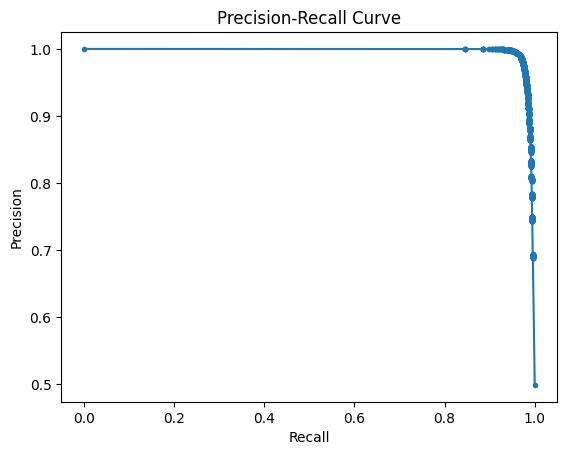

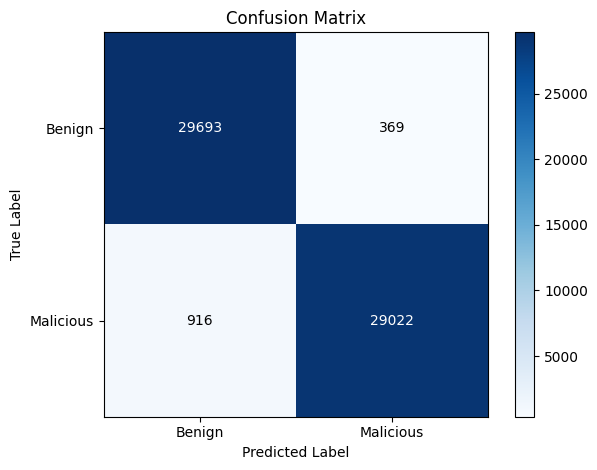

Threshold: 0.5
Accuracy: 0.9787333333333333
Confusion Matrix:
 [[29773   289]
 [  987 28951]]
Precision: 0.9901162790697674
Recall: 0.9670318658561026
False Positive Rate: 0.009613465504623778
False Negative Rate: 0.03296813414389739


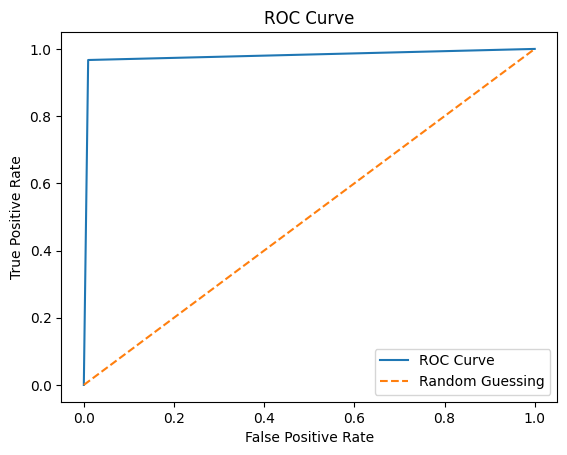

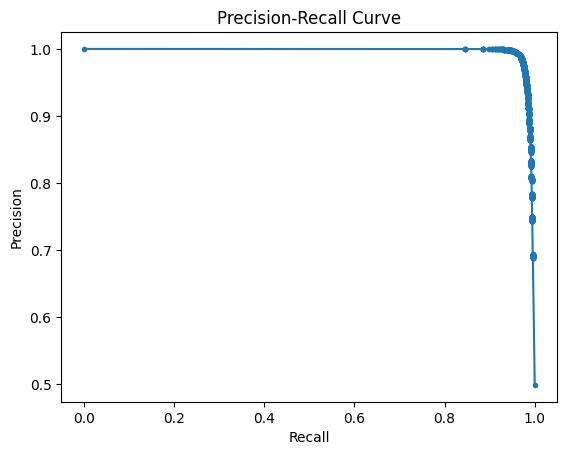

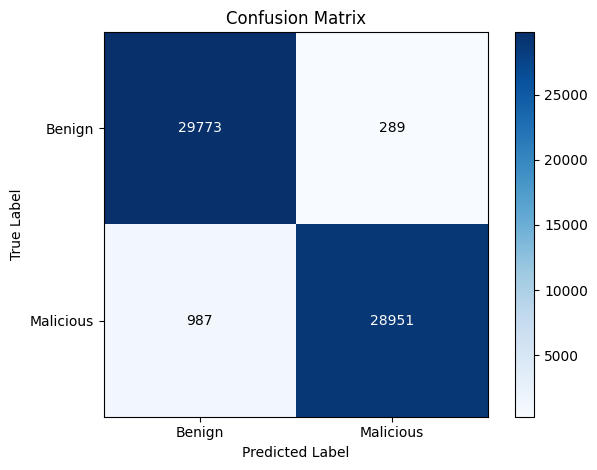

Threshold: 0.55
Accuracy: 0.9781166666666666
Confusion Matrix:
 [[29822   240]
 [ 1073 28865]]
Precision: 0.9917539941590792
Recall: 0.9641592624757833
False Positive Rate: 0.00798350076508549
False Negative Rate: 0.035840737524216716


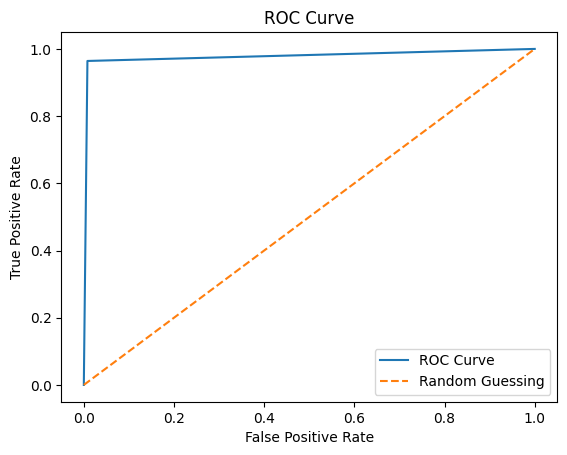

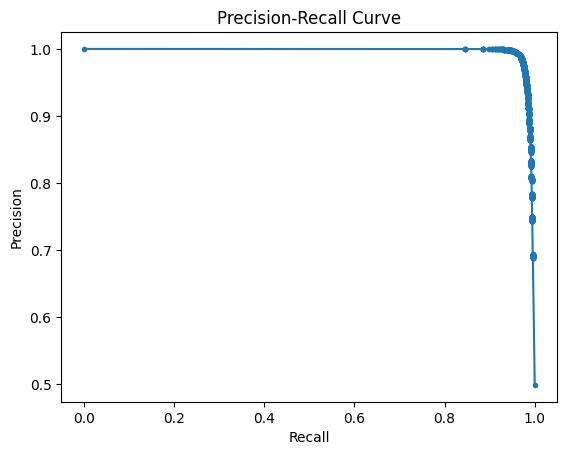

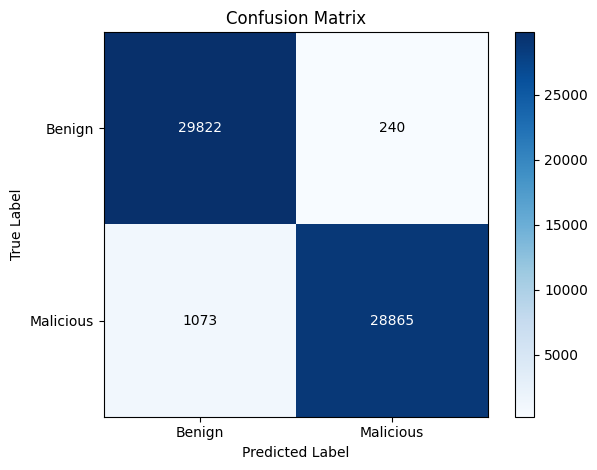

Threshold: 0.6
Accuracy: 0.9774
Confusion Matrix:
 [[29869   193]
 [ 1163 28775]]
Precision: 0.9933374758354045
Recall: 0.9611530496359142
False Positive Rate: 0.006420065198589581
False Negative Rate: 0.03884695036408578


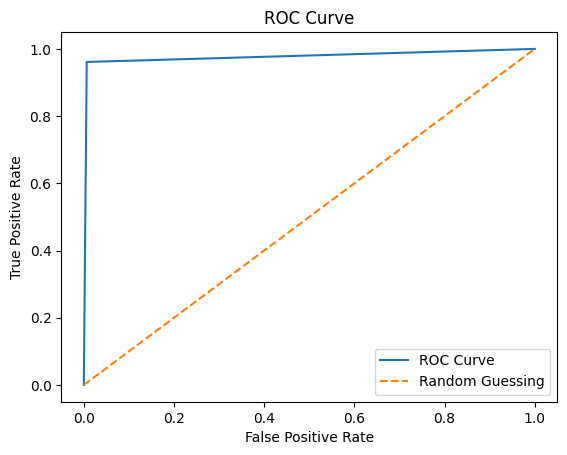

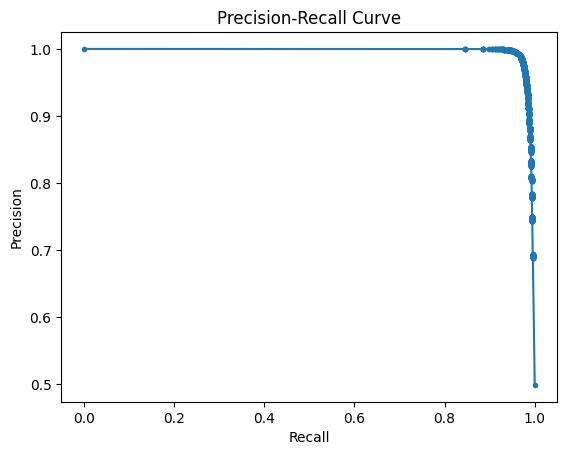

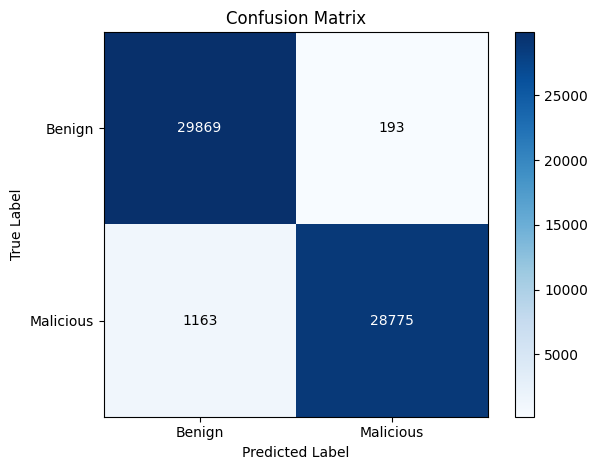

Threshold: 0.65
Accuracy: 0.9764833333333334
Confusion Matrix:
 [[29908   154]
 [ 1257 28681]]
Precision: 0.9946592682503902
Recall: 0.9580132273364954
False Positive Rate: 0.005122746324263189
False Negative Rate: 0.041986772663504576


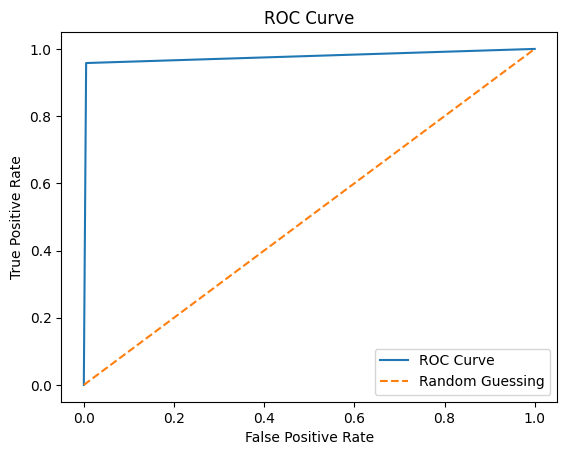

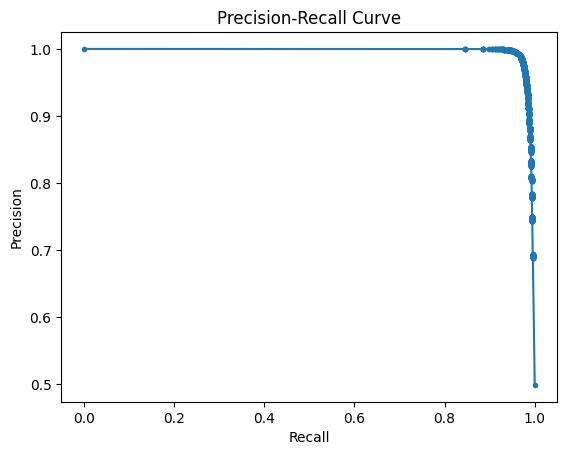

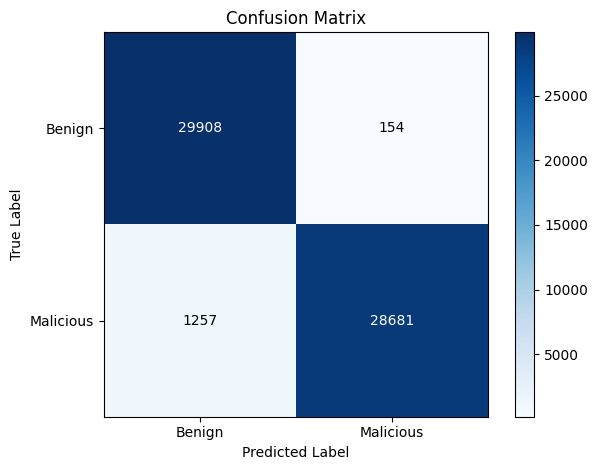

Threshold: 0.7
Accuracy: 0.9755166666666667
Confusion Matrix:
 [[29953   109]
 [ 1360 28578]]
Precision: 0.9962003695053508
Recall: 0.9545727837530897
False Positive Rate: 0.00362583993080966
False Negative Rate: 0.04542721624691028


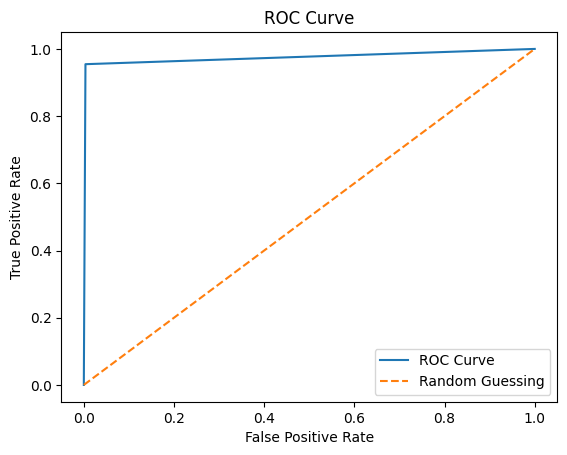

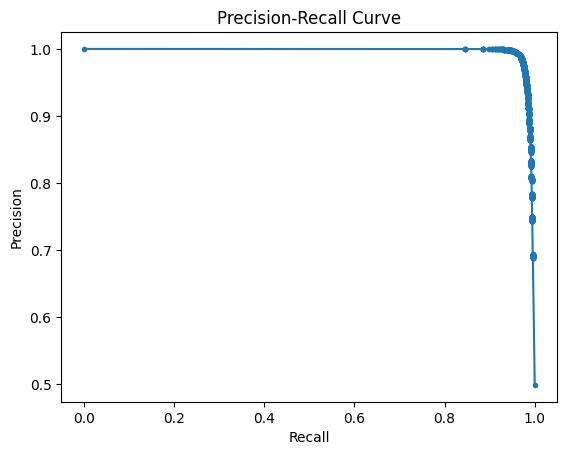

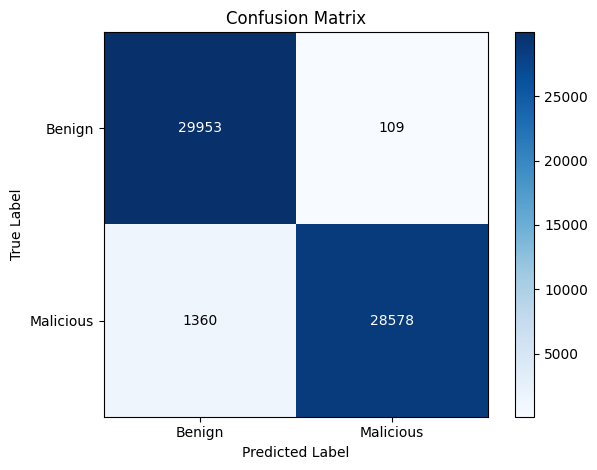

Threshold: 0.75
Accuracy: 0.97355
Confusion Matrix:
 [[29990    72]
 [ 1515 28423]]
Precision: 0.9974732409194595
Recall: 0.9493954171955374
False Positive Rate: 0.002395050229525647
False Negative Rate: 0.050604582804462554


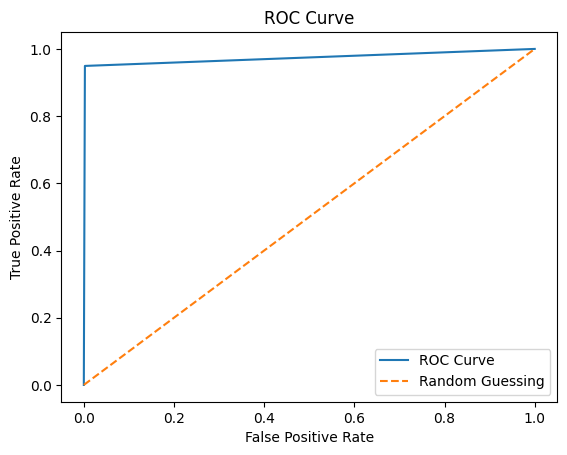

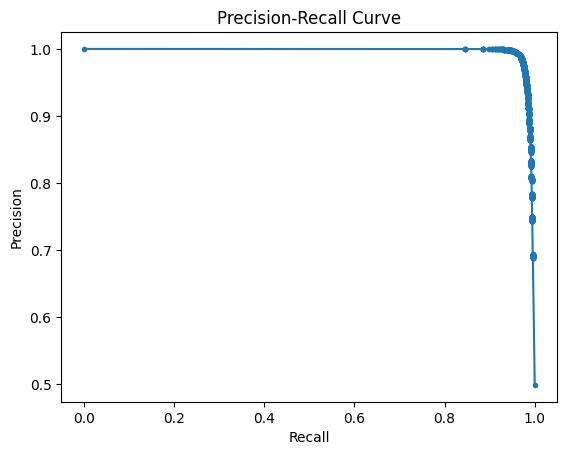

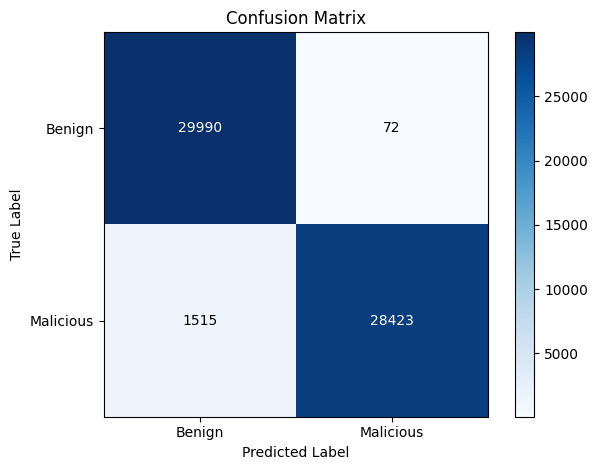

Threshold: 0.8
Accuracy: 0.9714
Confusion Matrix:
 [[30012    50]
 [ 1666 28272]]
Precision: 0.9982345879528282
Recall: 0.9443516600975349
False Positive Rate: 0.0016632293260594772
False Negative Rate: 0.055648339902465094


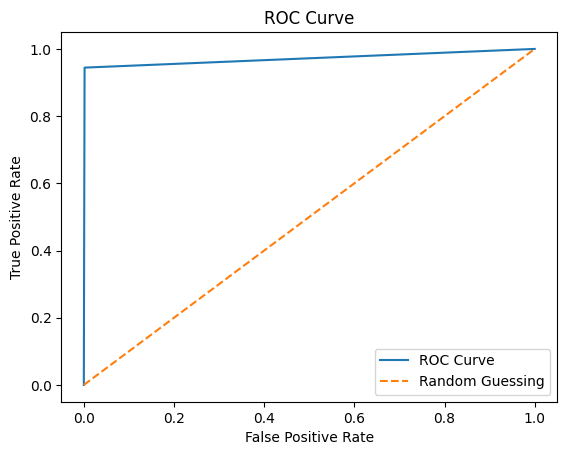

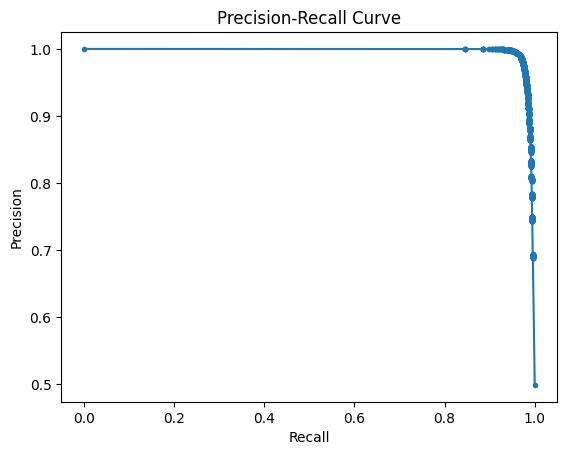

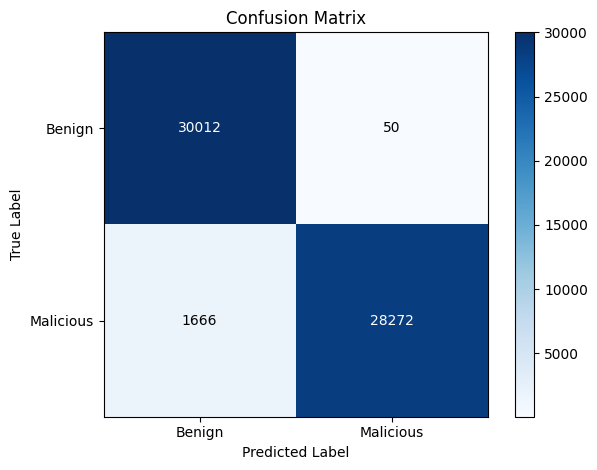

Threshold: 0.85
Accuracy: 0.9683333333333334
Confusion Matrix:
 [[30029    33]
 [ 1867 28071]]
Precision: 0.9988257899231426
Recall: 0.9376377847551607
False Positive Rate: 0.0010977313551992548
False Negative Rate: 0.062362215244839335


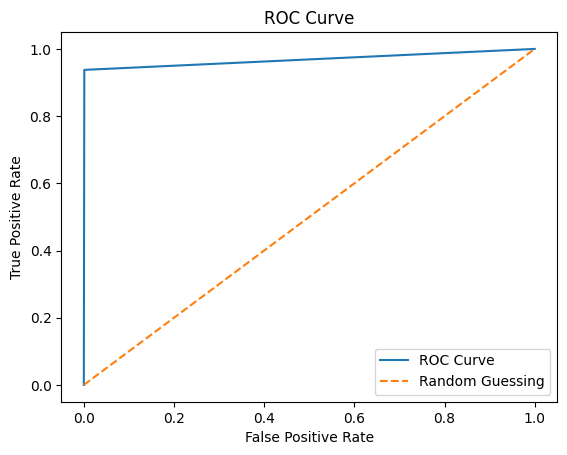

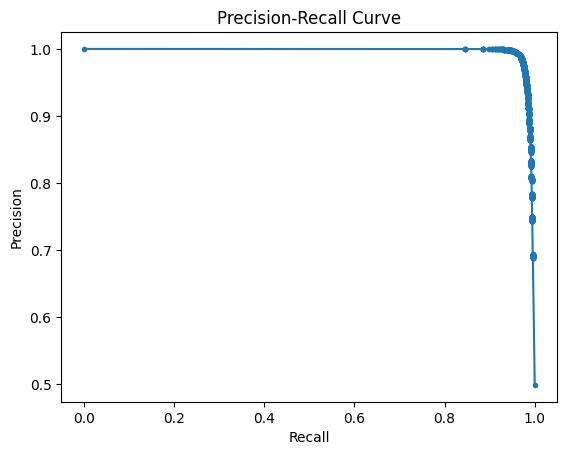

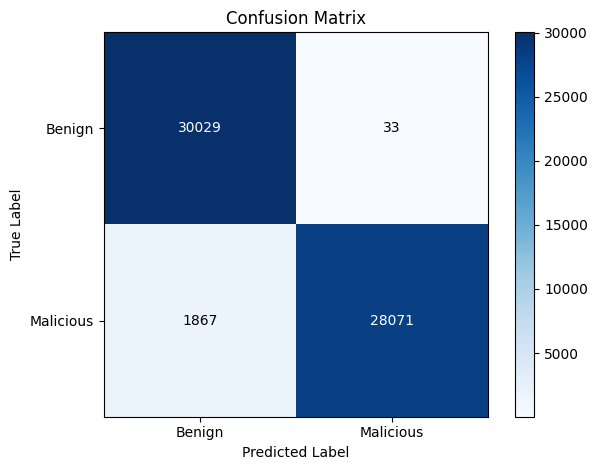

Threshold: 0.9
Accuracy: 0.9642
Confusion Matrix:
 [[30046    16]
 [ 2132 27806]]
Precision: 0.9994249155344691
Recall: 0.9287861580599907
False Positive Rate: 0.0005322333843390326
False Negative Rate: 0.07121384194000935


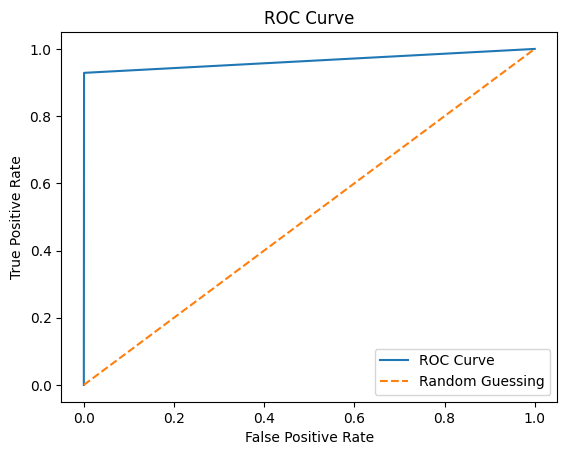

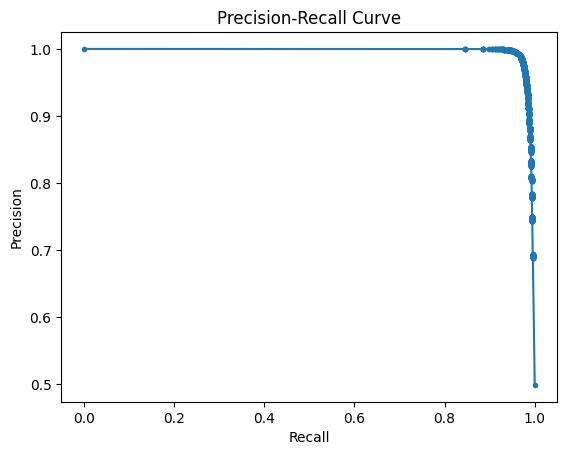

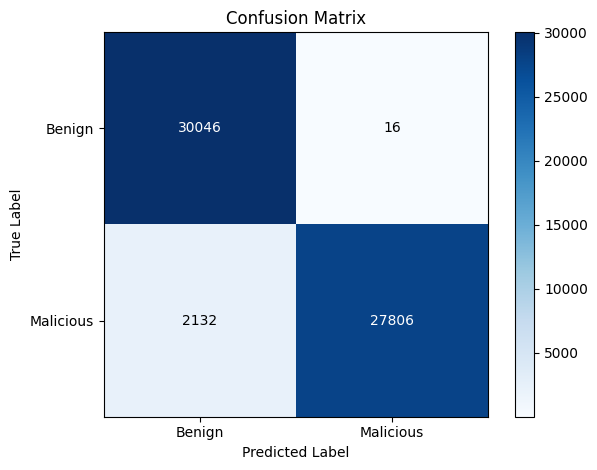

Threshold: 0.95
Accuracy: 0.9576166666666667
Confusion Matrix:
 [[30052    10]
 [ 2533 27405]]
Precision: 0.9996352361845705
Recall: 0.9153918097401296
False Positive Rate: 0.0003326458652118954
False Negative Rate: 0.0846081902598704


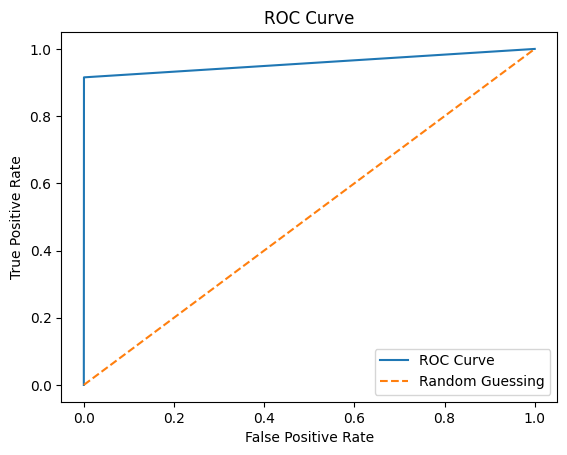

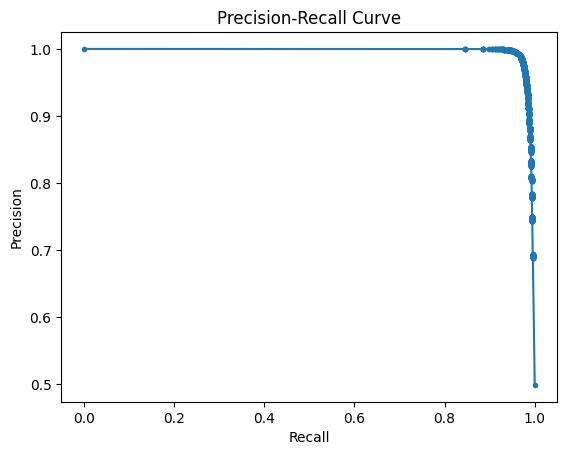

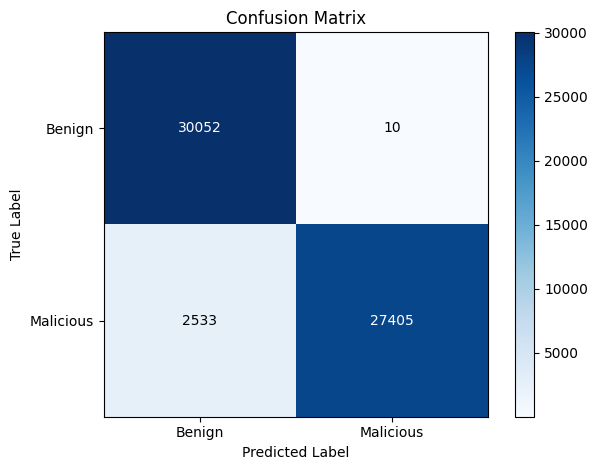

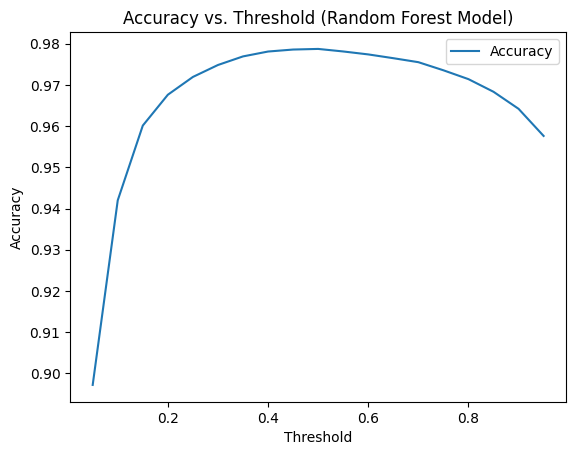

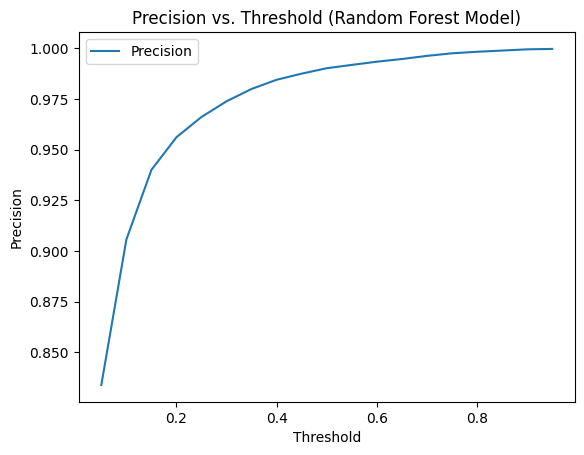

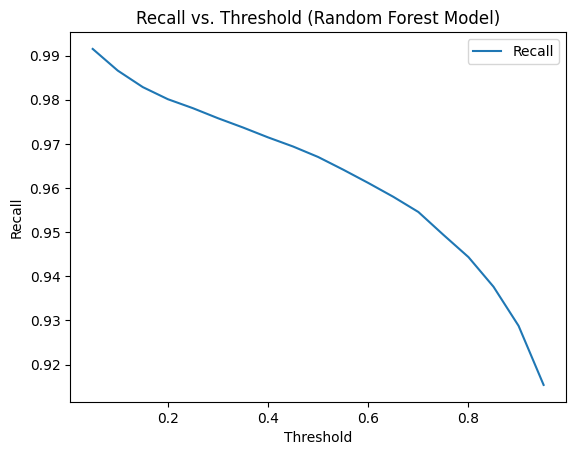

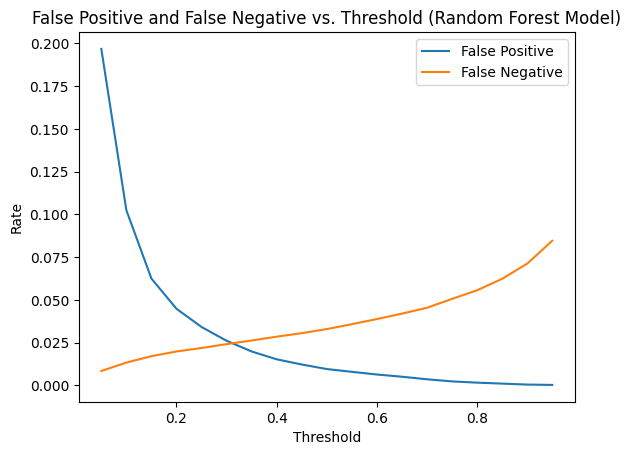

Maximum Accuracy: 0.9787333333333333
Best Threshold: 0.5


In [21]:
# Feature Importance Plot
print('Feature Importance Plot for the Random Forest model...')
importances = rf_model.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(importances)), importances)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()

# Predictions and Evaluation
print('Making predictions with the Random Forest model...')
y_pred = rf_model.predict(X_test)
print('Testing the Random Forest model with different thresholds...')

# Initialize lists to store evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
false_positive_list = []
false_negative_list = []

# Define the thresholds to test
thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

max_accuracy = 0.0
best_threshold = 0.0

for threshold in thresholds:
    print('Threshold:', threshold)
    y_pred = (rf_model.predict_proba(X_test)[:,1] >= threshold).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    false_positive = confusion[0, 1] / (confusion[0, 1] + confusion[0, 0])
    false_negative = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])

    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion)
    print("Precision:", precision)
    print("Recall:", recall)
    print("False Positive Rate:", false_positive)
    print("False Negative Rate:", false_negative)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    false_positive_list.append(false_positive)
    false_negative_list.append(false_negative)

    # Plot ROC curve, Precision-Recall curve, and Confusion Matrix
    plot_roc_curve(rf_model, X_test, y_test, threshold)
    plot_precision_recall_curve(rf_model, X_test, y_test, threshold)
    plot_confusion_matrix(rf_model, X_test, y_test, threshold)

    # Update max accuracy and best threshold if current accuracy is higher
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_threshold = threshold

# Plotting accuracy vs. threshold
plt.plot(thresholds, accuracy_list, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold (Random Forest Model)')
plt.legend()
plt.show()

# Plotting precision vs. threshold
plt.plot(thresholds, precision_list, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs. Threshold (Random Forest Model)')
plt.legend()
plt.show()

# Plotting recall vs. threshold
plt.plot(thresholds, recall_list, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs. Threshold (Random Forest Model)')
plt.legend()
plt.show()

# Plotting false positive and false negative rates vs. threshold
plt.plot(thresholds, false_positive_list, label='False Positive')
plt.plot(thresholds, false_negative_list, label='False Negative')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('False Positive and False Negative vs. Threshold (Random Forest Model)')
plt.legend()
plt.show()

# Display maximum accuracy and best threshold
print('Maximum Accuracy:', max_accuracy)
print('Best Threshold:', best_threshold)

### K-Nearest Neighbors model
We will use K-nearest neighbors model to classify the URLs and evaluate the model using the test set. We'll use 490 neighbors.

In [6]:
# K-Nearest Neighbors Classifier
print('Training the K-Nearest Neighbors model with k=490...')
knn_model = KNeighborsClassifier(n_neighbors=490)  
knn_model.fit(X_train, y_train)
print('K-Nearest Neighbors model training complete.')

print('Saving the K-Nearest Neighbors model to disk...')

# Dump the model to disk
with open('knn_model.pkl', 'wb') as f:
    pkl.dump(knn_model, f)

print('K-Nearest Neighbors model saved to disk.')

Training the K-Nearest Neighbors model with k=490...


K-Nearest Neighbors model training complete.
Saving the K-Nearest Neighbors model to disk...
K-Nearest Neighbors model saved to disk.


#### Prediction and evaluation

In [7]:
# Predictions and Evaluation
print('Making predictions with the K-Nearest Neighbors model...')
y_pred = knn_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Making predictions with the K-Nearest Neighbors model...
Accuracy: 0.9156166666666666
Confusion Matrix:
 [[29438   624]
 [ 4439 25499]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     30062
           1       0.98      0.85      0.91     29938

    accuracy                           0.92     60000
   macro avg       0.92      0.92      0.92     60000
weighted avg       0.92      0.92      0.92     60000

Testing the K-Nearest Neighbors model with different thresholds...
Threshold: 0.05


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

Accuracy: 0.9156166666666666
Confusion Matrix:
 [[29438   624]
 [ 4439 25499]]
Precision: 0.9761130038663247
Recall: 0.8517269022646803
False Positive Rate: 0.020757101989222274
False Negative Rate: 0.14827309773531966


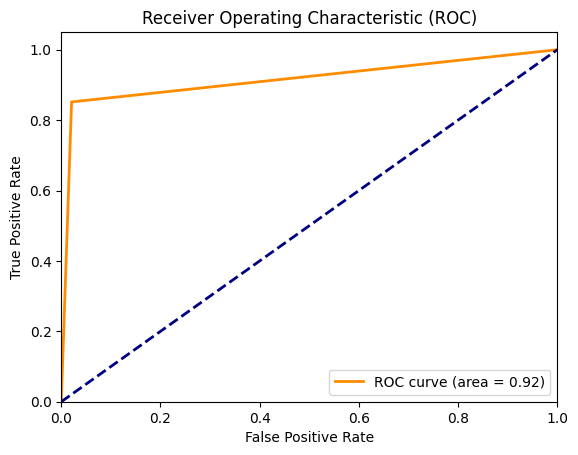

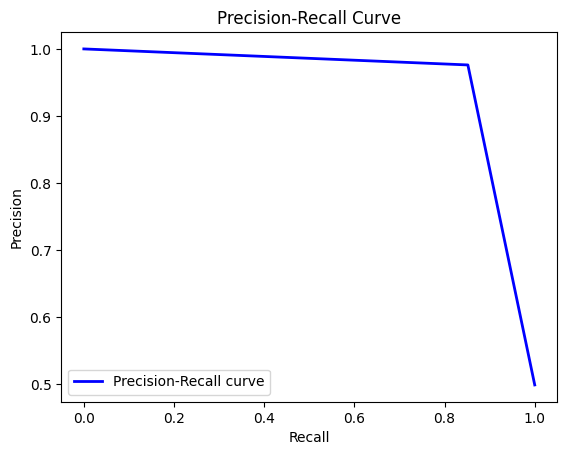

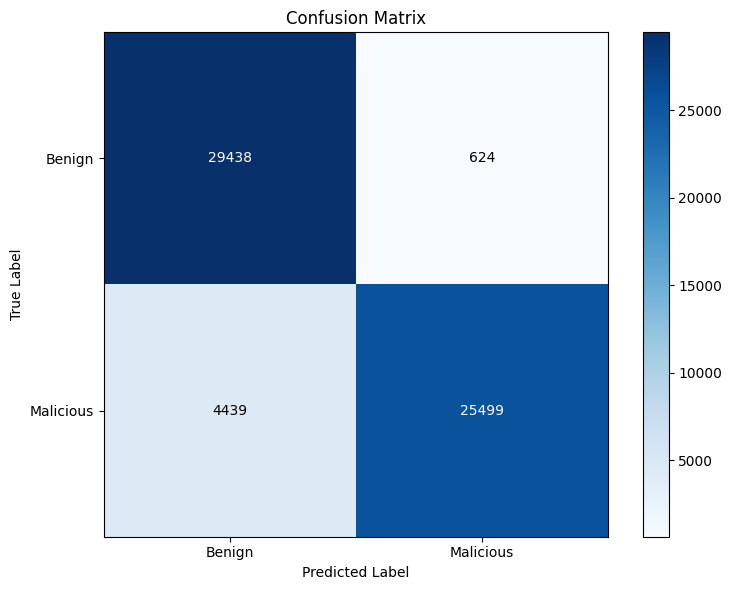

In [11]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
false_positive = confusion[0, 1] / (confusion[0, 1] + confusion[0, 0])
false_negative = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Precision:", precision)
print("Recall:", recall)
print("False Positive Rate:", false_positive)
print("False Negative Rate:", false_negative)

# Plot ROC curve, Precision-Recall curve, and Confusion Matrix
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Benign', 'Malicious']  # Class labels
plt.xticks(ticks=[0, 1], labels=classes)
plt.yticks(ticks=[0, 1], labels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = confusion.max() / 2.
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        plt.text(j, i, format(confusion[i, j], 'd'),
                ha="center", va="center",
                color="white" if confusion[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

### Decision Tree model
We will use Decision Tree model to classify the URLs and evaluate the model using the test set.

In [21]:
print('Training the Decision Tree model with a random state of 42...')
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
print('Decision Tree model training complete')

print('Saving the Decision Tree model to disk...')

# Save the model to disk
with open('decision_tree_model.pkl', 'wb') as f:
    pkl.dump(dt_model, f)

print('Decision Tree model saved to disk.')

Training the Decision Tree model with a random state of 42...
Decision Tree model training complete
Saving the Decision Tree model to disk...
Decision Tree model saved to disk.


#### Predictions and evaluation

Accuracy: 0.9743166666666667
Confusion Matrix:
 [[29458   604]
 [  937 29001]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     30062
           1       0.98      0.97      0.97     29938

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000

Making predictions with the Random Forest model...
Testing the Decision Tree model with different thresholds...
Threshold: 0.05
Accuracy: 0.9440833333333334
Confusion Matrix:
 [[27429  2633]
 [  722 29216]]
Precision: 0.9173286445414299
Recall: 0.9758834925512726
False Positive Rate: 0.08758565631029207
False Negative Rate: 0.02411650744872737


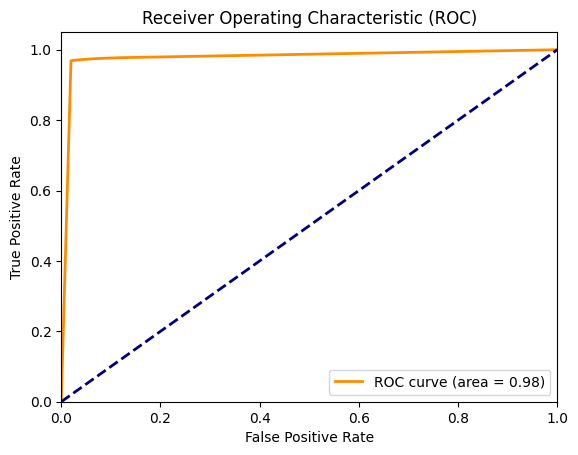

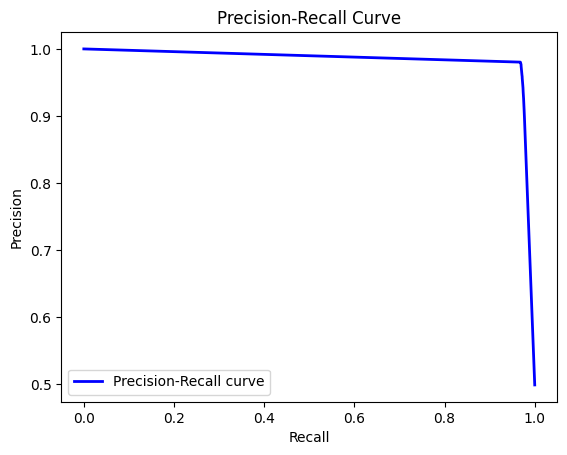

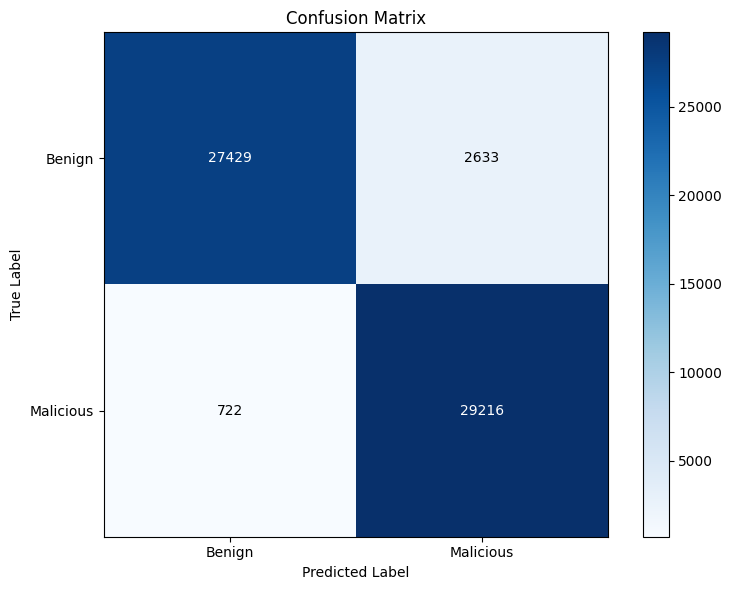

Threshold: 0.1
Accuracy: 0.9605333333333334
Confusion Matrix:
 [[28496  1566]
 [  802 29136]]
Precision: 0.9489935509087356
Recall: 0.973211303360278
False Positive Rate: 0.05209234249218282
False Negative Rate: 0.026788696639722092


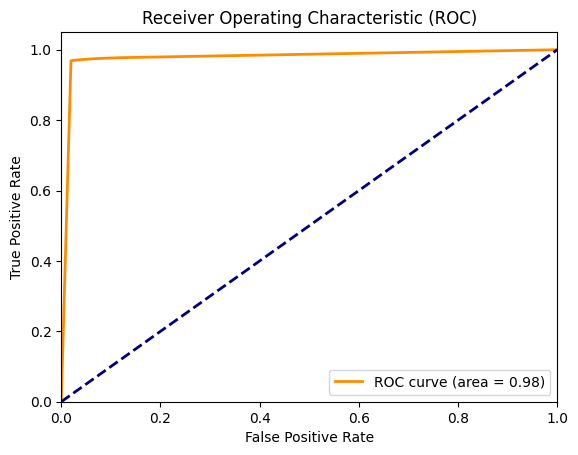

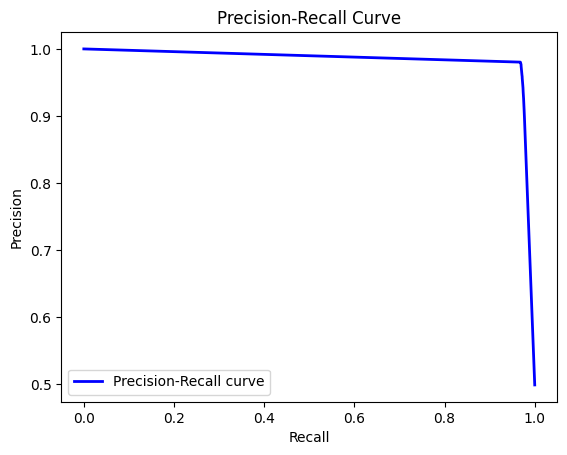

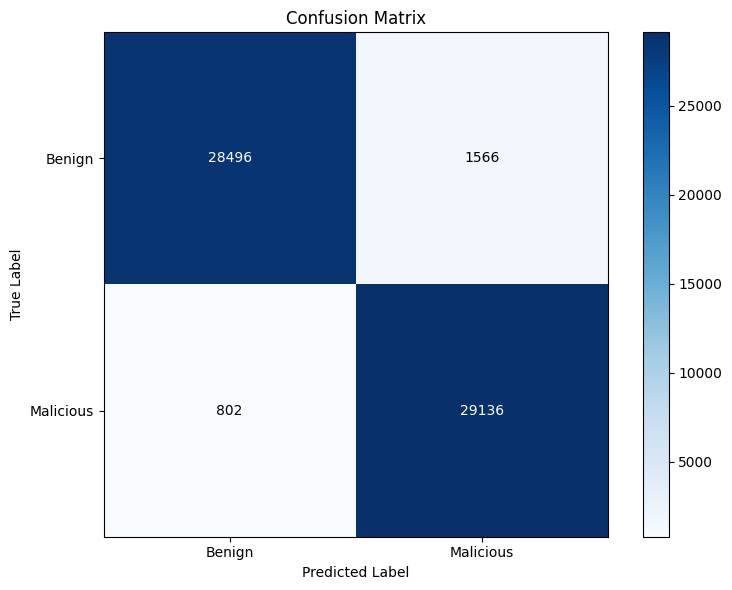

Threshold: 0.15
Accuracy: 0.9675666666666667
Confusion Matrix:
 [[28971  1091]
 [  855 29083]]
Precision: 0.9638430436799894
Recall: 0.9714409780212439
False Positive Rate: 0.03629166389461779
False Negative Rate: 0.028559021978756097


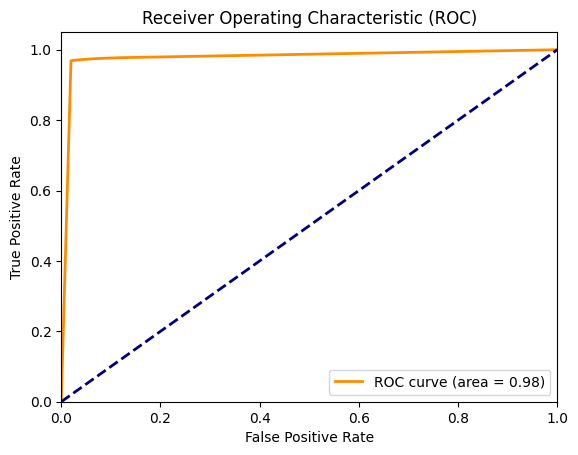

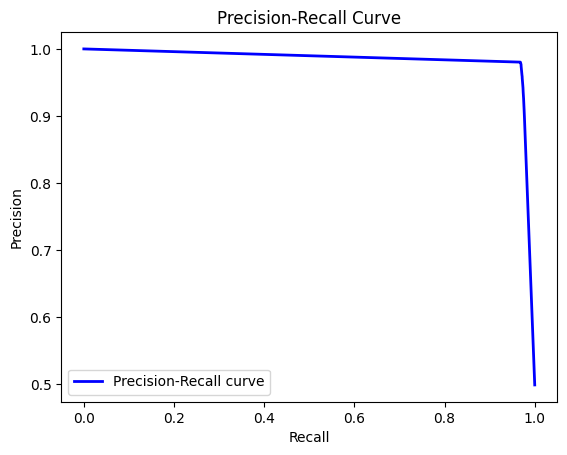

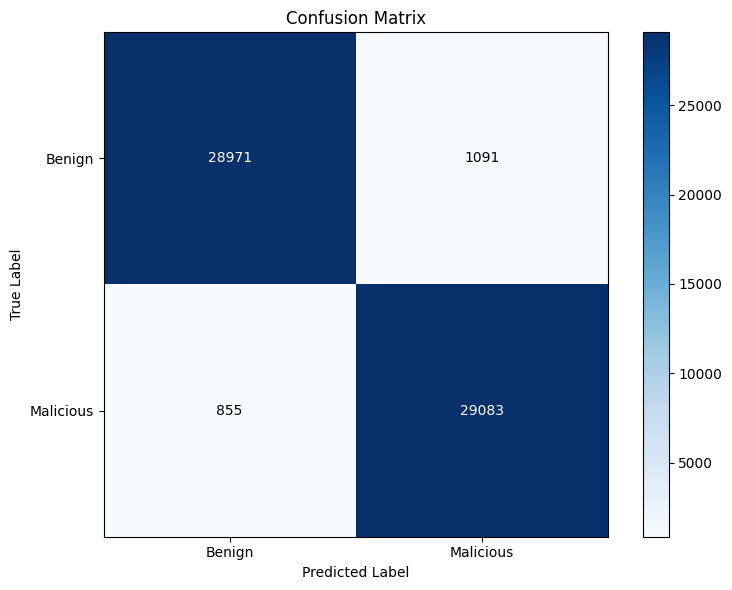

Threshold: 0.2
Accuracy: 0.96965
Confusion Matrix:
 [[29116   946]
 [  875 29063]]
Precision: 0.9684761238295179
Recall: 0.9707729307234952
False Positive Rate: 0.031468298849045305
False Negative Rate: 0.029227069276504775


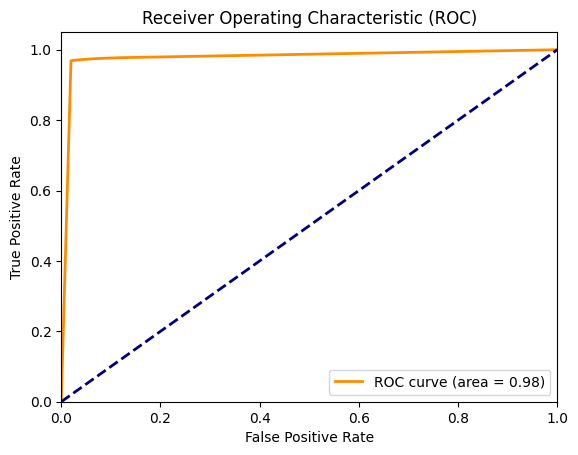

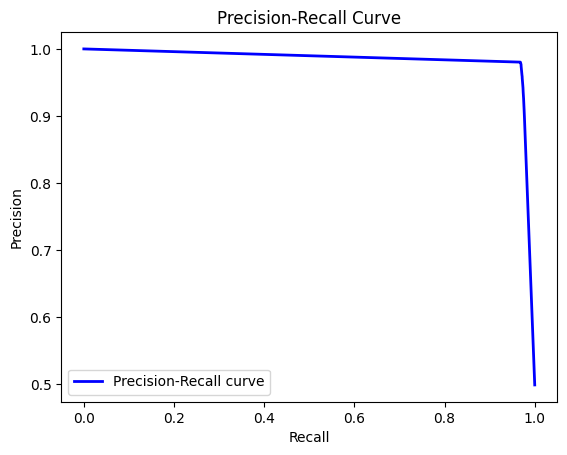

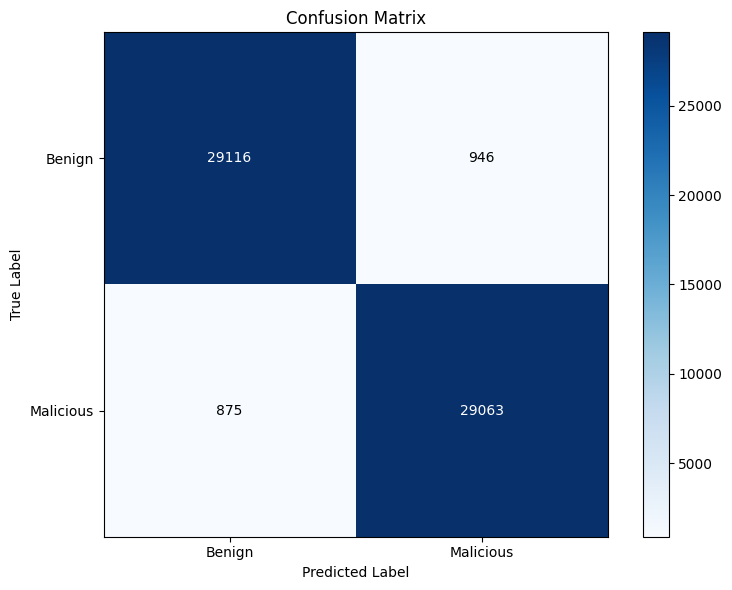

Threshold: 0.25
Accuracy: 0.9707666666666667
Confusion Matrix:
 [[29196   866]
 [  888 29050]]
Precision: 0.9710522797165396
Recall: 0.9703386999799586
False Positive Rate: 0.028807131927350144
False Negative Rate: 0.029661300020041418


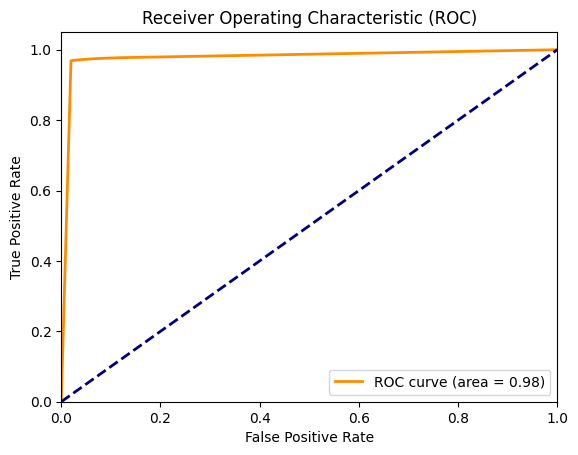

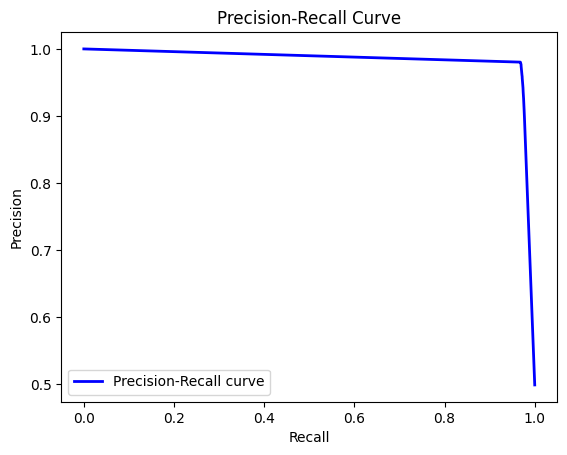

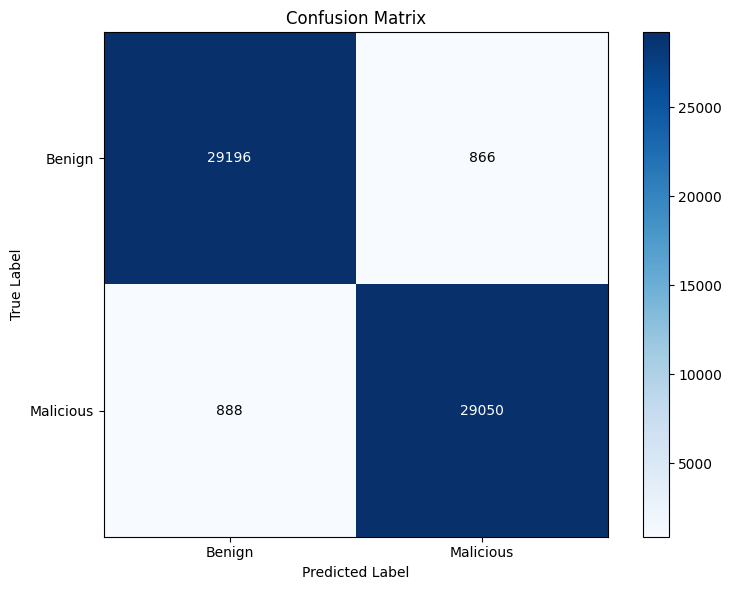

Threshold: 0.3
Accuracy: 0.97155
Confusion Matrix:
 [[29253   809]
 [  898 29040]]
Precision: 0.9728969144694964
Recall: 0.9700046763310842
False Positive Rate: 0.02691105049564234
False Negative Rate: 0.02999532366891576


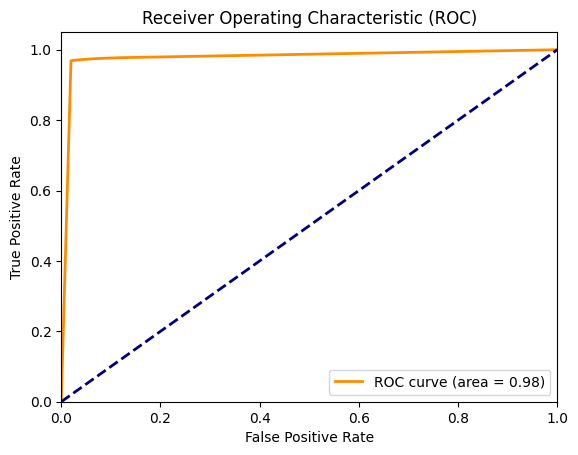

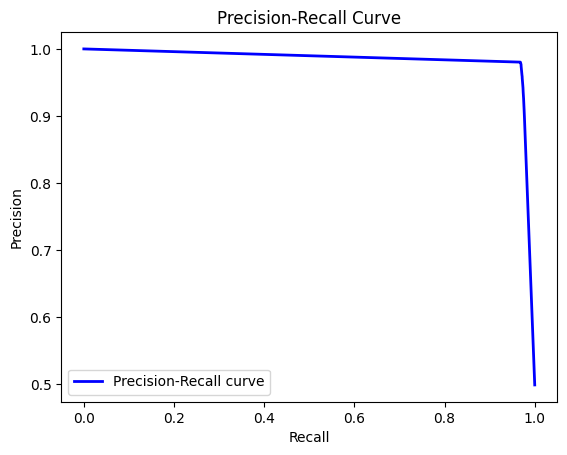

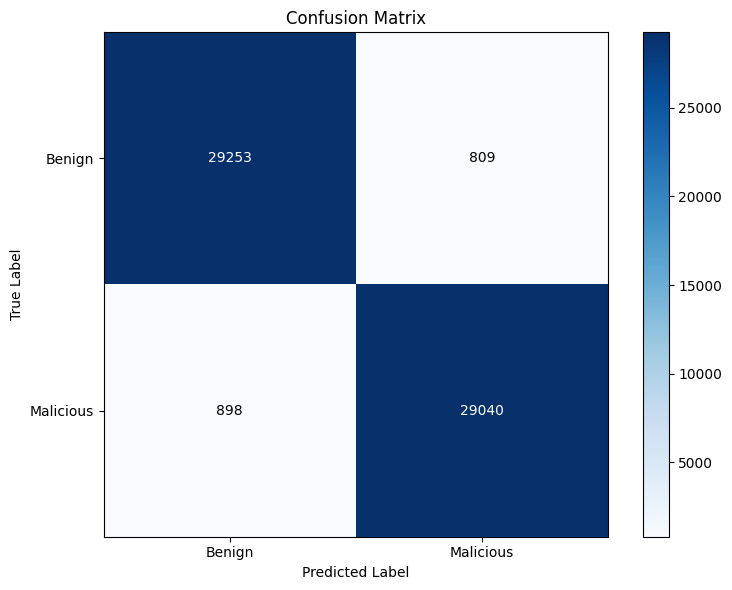

Threshold: 0.35
Accuracy: 0.9729833333333333
Confusion Matrix:
 [[29350   712]
 [  909 29029]]
Precision: 0.976059984533136
Recall: 0.9696372503173225
False Positive Rate: 0.023684385603086954
False Negative Rate: 0.030362749682677534


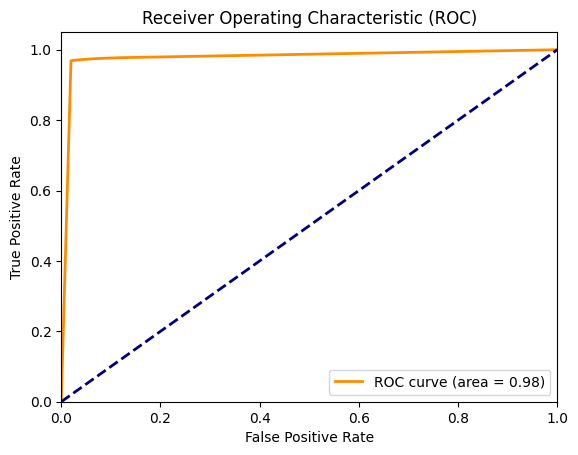

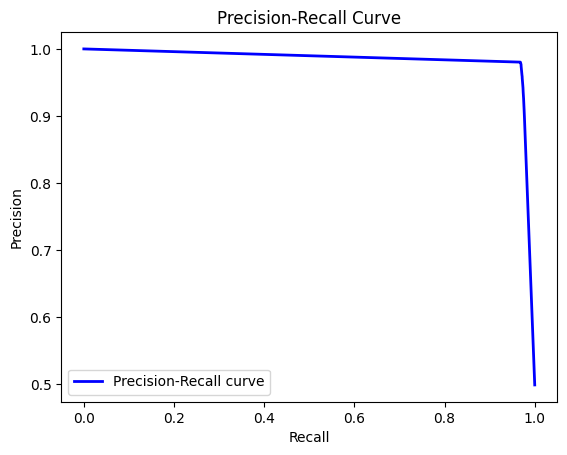

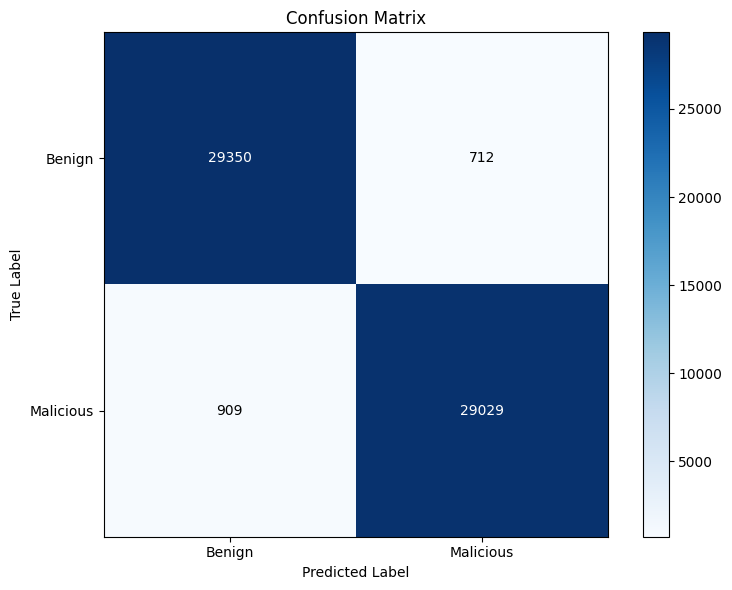

Threshold: 0.4
Accuracy: 0.973
Confusion Matrix:
 [[29351   711]
 [  909 29029]]
Precision: 0.9760928043039677
Recall: 0.9696372503173225
False Positive Rate: 0.023651121016565763
False Negative Rate: 0.030362749682677534


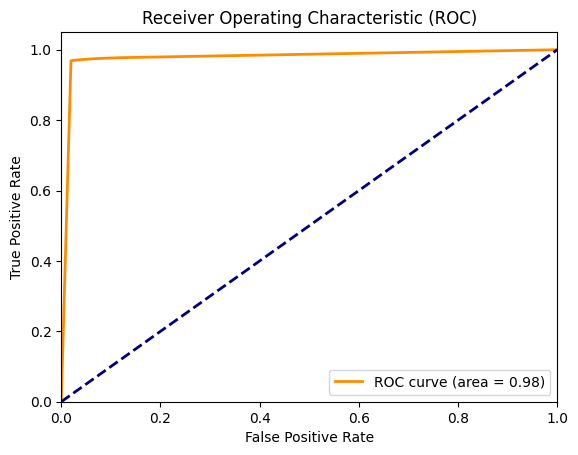

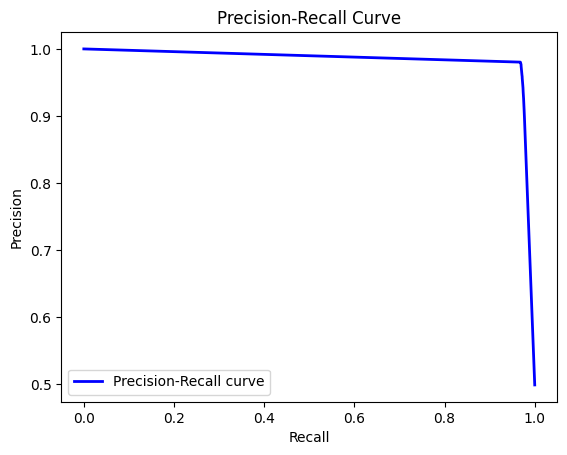

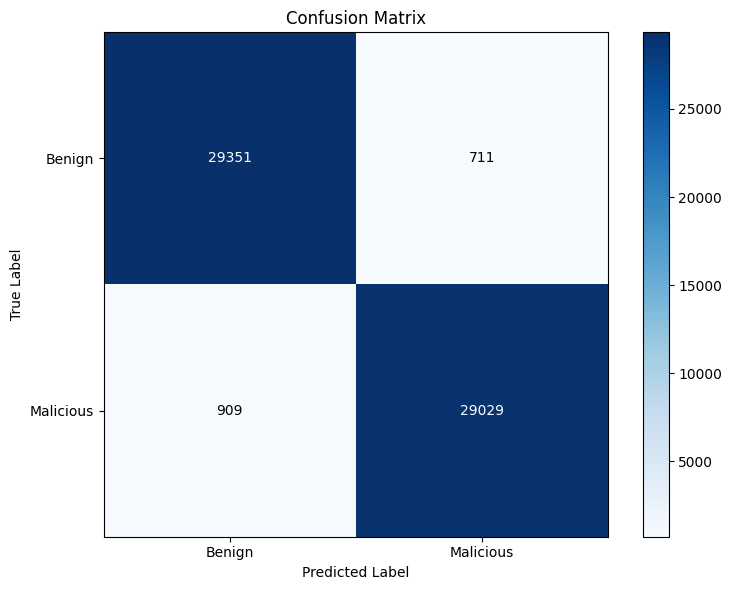

Threshold: 0.45
Accuracy: 0.9733333333333334
Confusion Matrix:
 [[29372   690]
 [  910 29028]]
Precision: 0.9767817484352918
Recall: 0.969603847952435
False Positive Rate: 0.022952564699620783
False Negative Rate: 0.03039615204756497


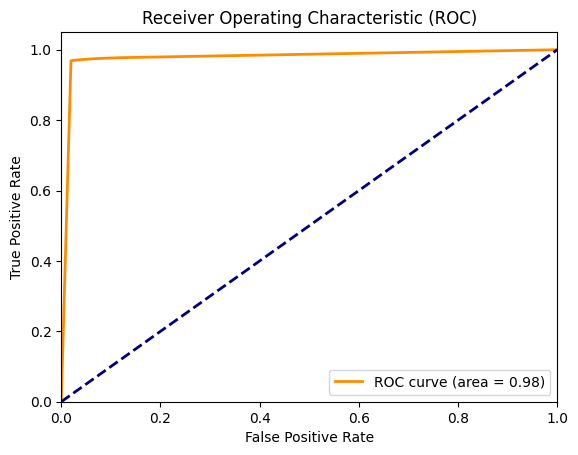

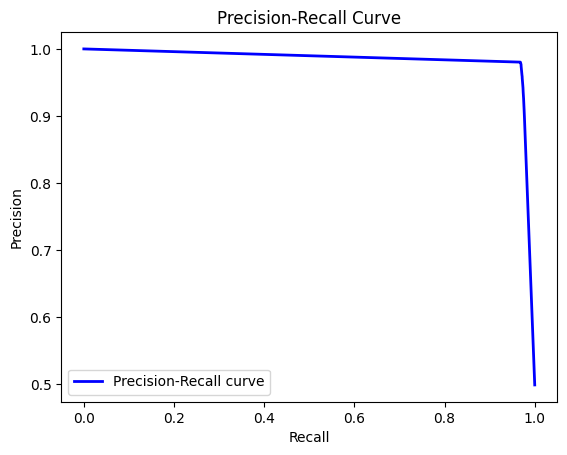

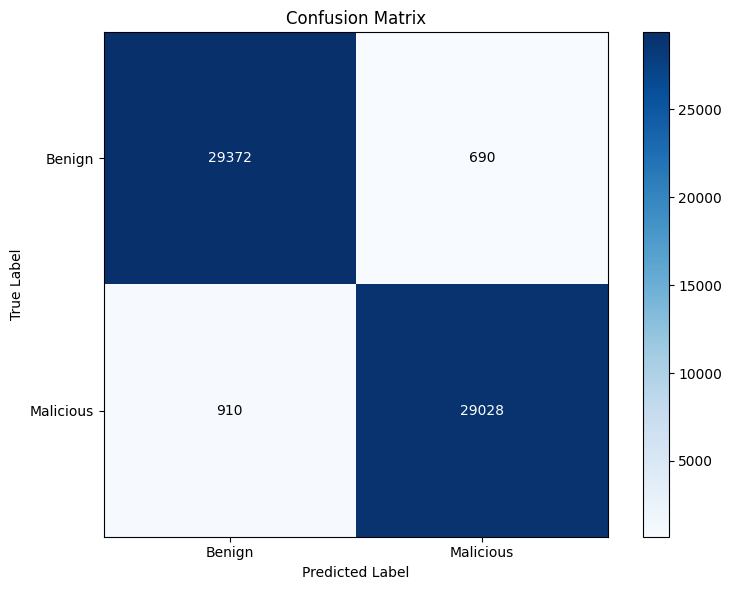

Threshold: 0.5
Accuracy: 0.9733333333333334
Confusion Matrix:
 [[29372   690]
 [  910 29028]]
Precision: 0.9767817484352918
Recall: 0.969603847952435
False Positive Rate: 0.022952564699620783
False Negative Rate: 0.03039615204756497


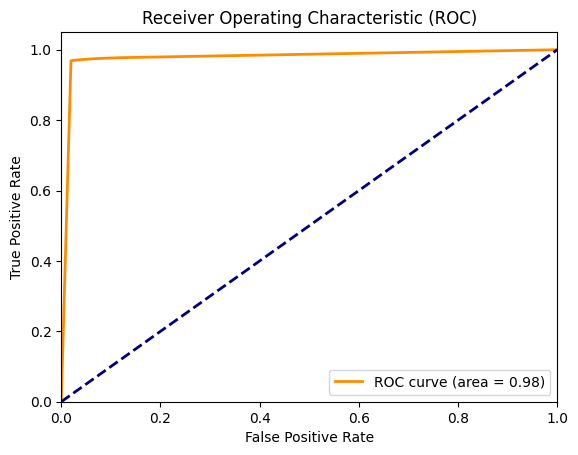

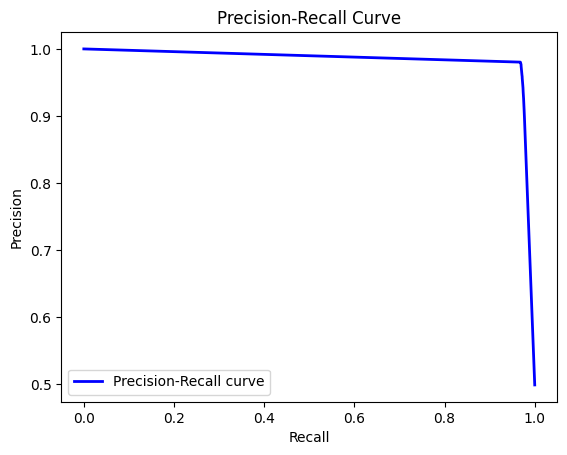

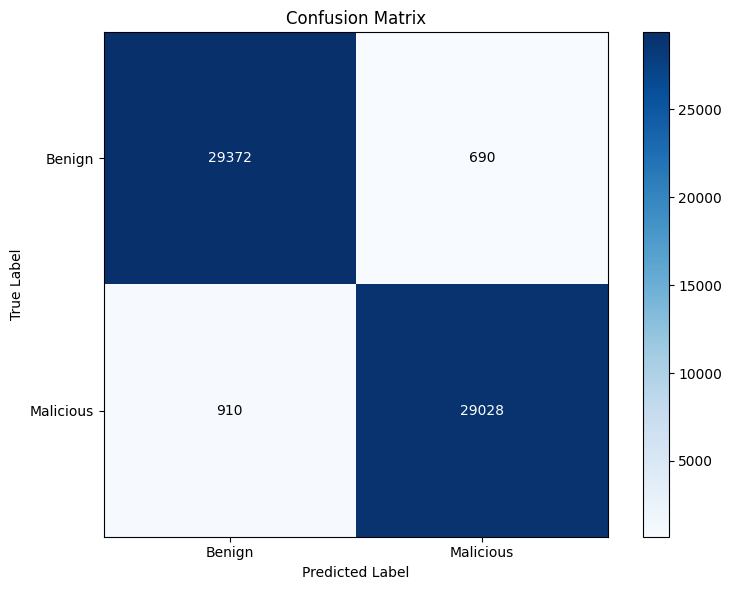

Threshold: 0.55
Accuracy: 0.9743166666666667
Confusion Matrix:
 [[29458   604]
 [  937 29001]]
Precision: 0.9795980408714744
Recall: 0.9687019841004744
False Positive Rate: 0.020091810258798484
False Negative Rate: 0.03129801589952569


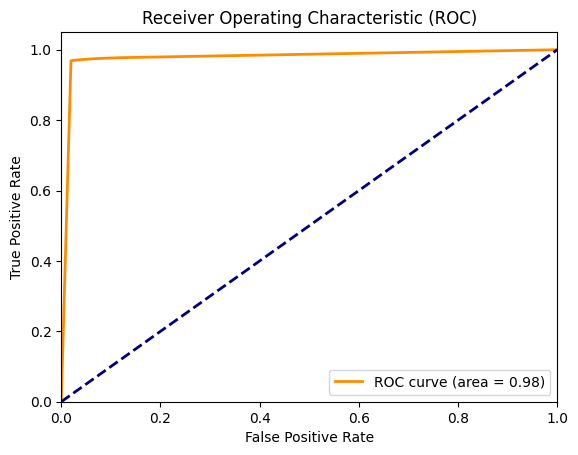

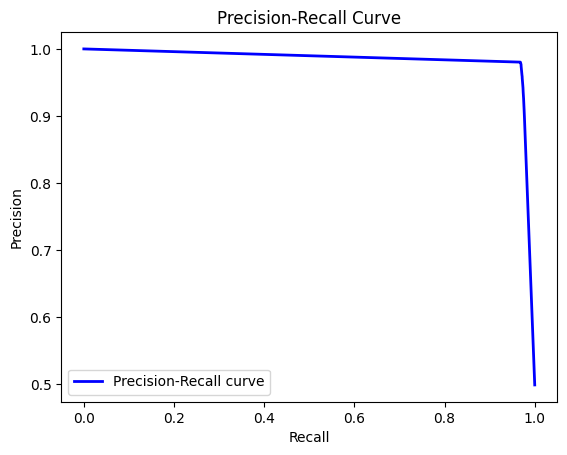

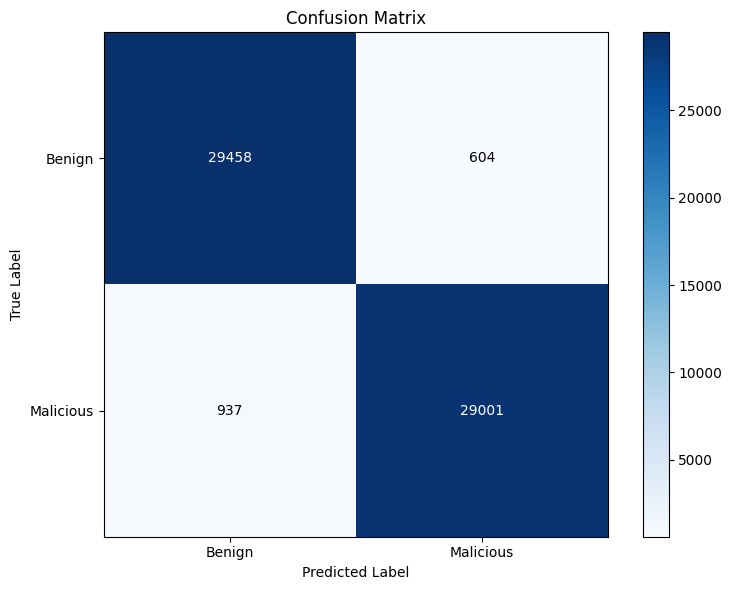

Threshold: 0.6
Accuracy: 0.9742833333333333
Confusion Matrix:
 [[29458   604]
 [  939 28999]]
Precision: 0.9795966625004222
Recall: 0.9686351793706994
False Positive Rate: 0.020091810258798484
False Negative Rate: 0.03136482062930056


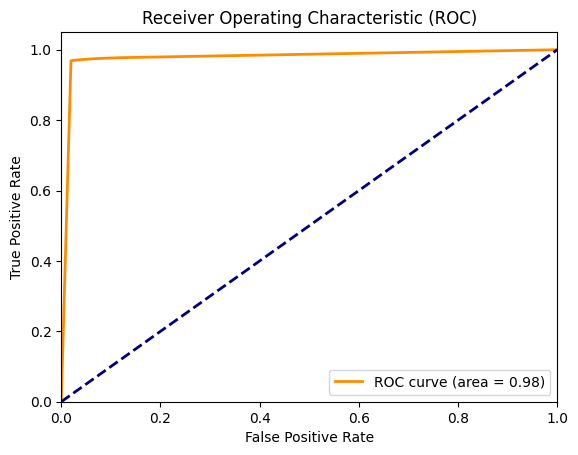

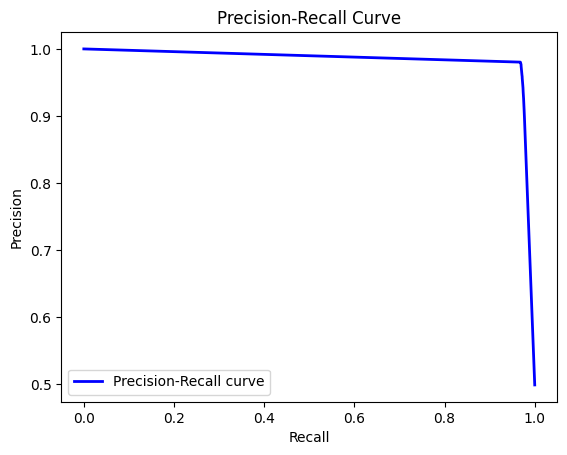

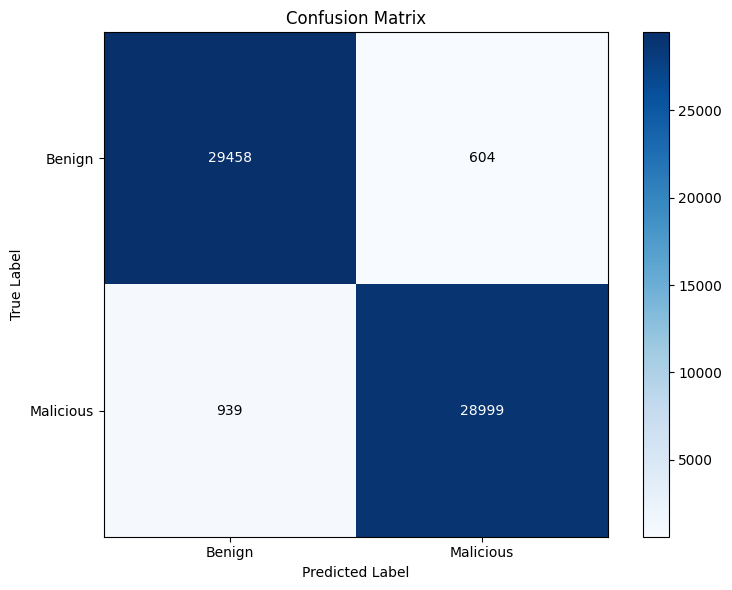

Threshold: 0.65
Accuracy: 0.9742666666666666
Confusion Matrix:
 [[29459   603]
 [  941 28997]]
Precision: 0.9796283783783784
Recall: 0.9685683746409246
False Positive Rate: 0.020058545672277293
False Negative Rate: 0.03143162535907542


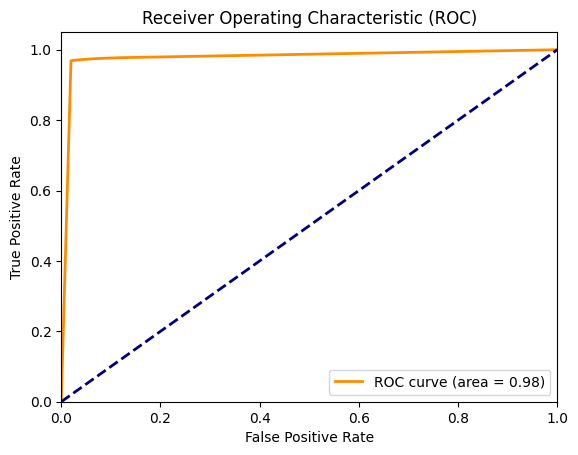

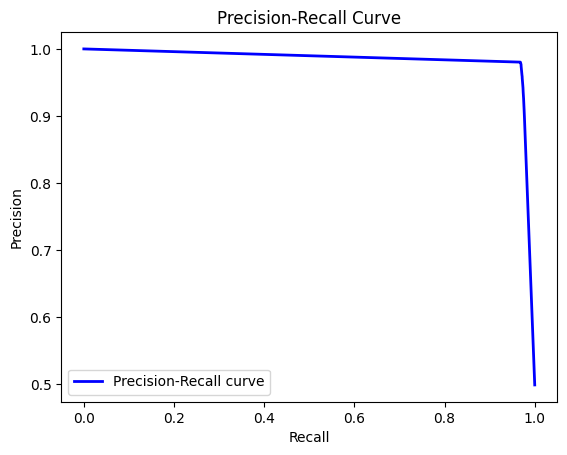

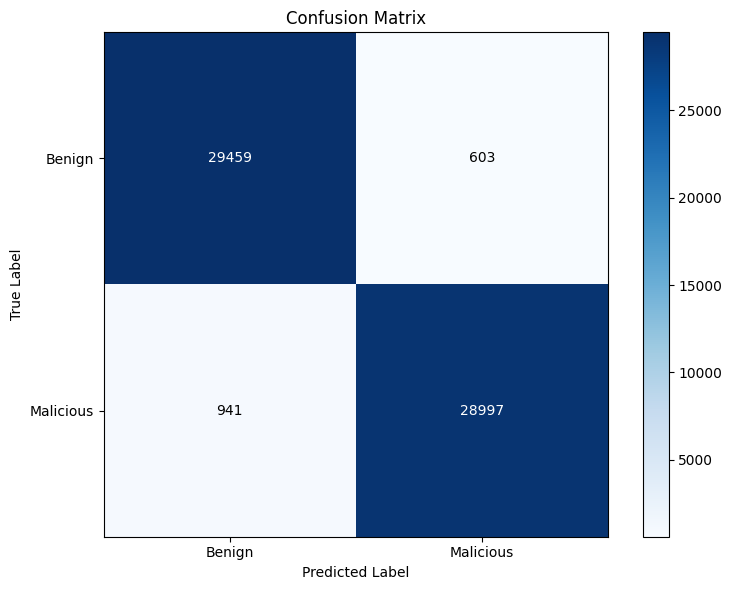

Threshold: 0.7
Accuracy: 0.97435
Confusion Matrix:
 [[29474   588]
 [  951 28987]]
Precision: 0.9801183431952663
Recall: 0.9682343509920502
False Positive Rate: 0.01955957687445945
False Negative Rate: 0.031765649007949766


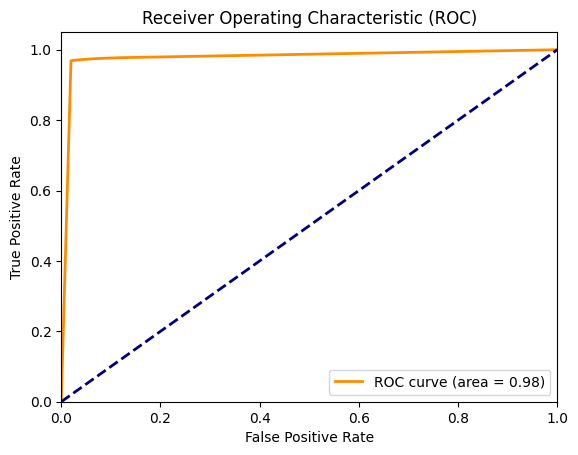

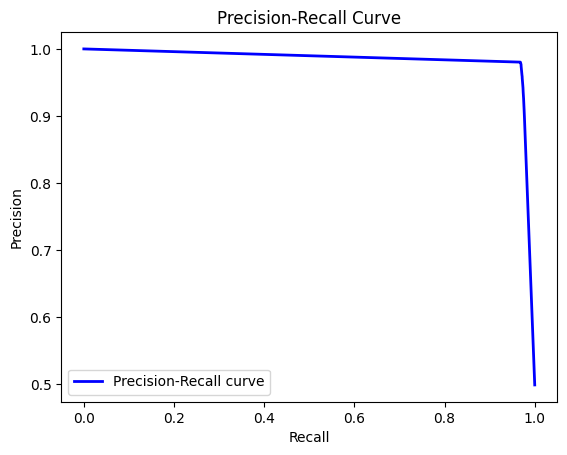

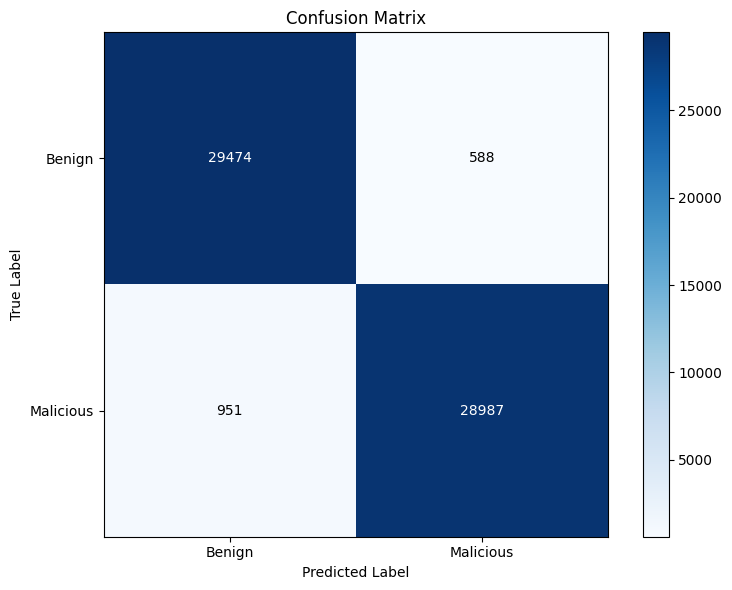

Threshold: 0.75
Accuracy: 0.97435
Confusion Matrix:
 [[29474   588]
 [  951 28987]]
Precision: 0.9801183431952663
Recall: 0.9682343509920502
False Positive Rate: 0.01955957687445945
False Negative Rate: 0.031765649007949766


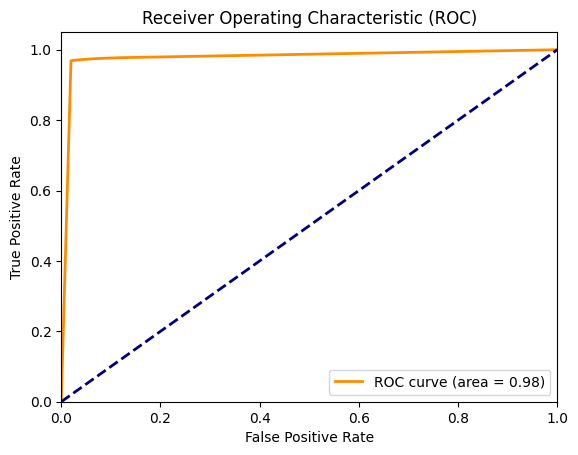

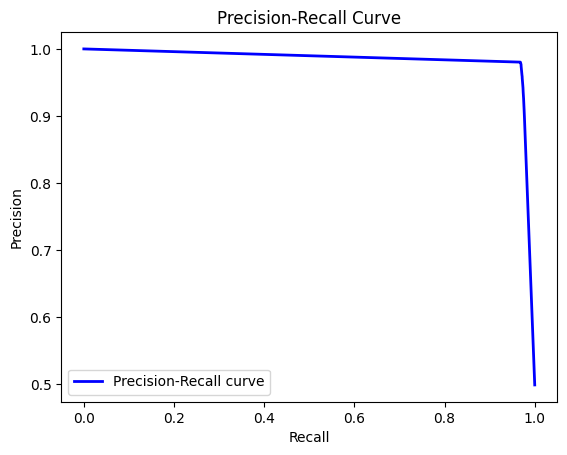

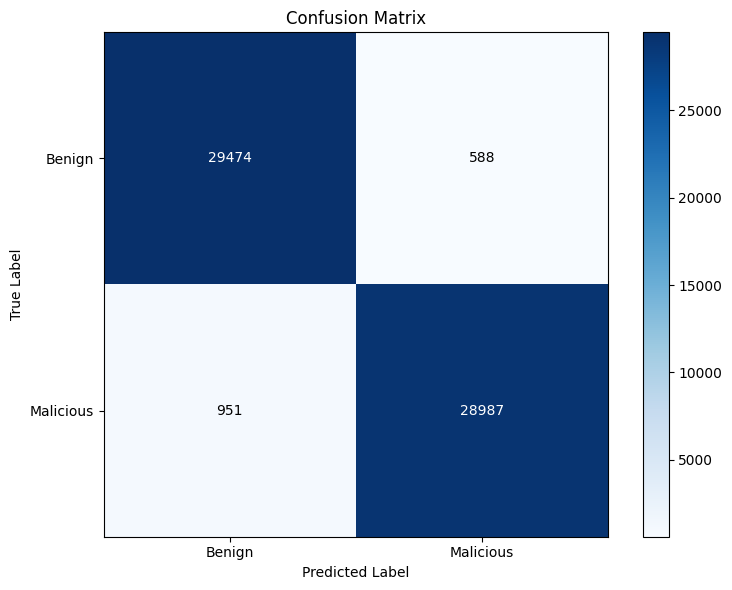

Threshold: 0.8
Accuracy: 0.9744
Confusion Matrix:
 [[29478   584]
 [  952 28986]]
Precision: 0.9802502536354413
Recall: 0.9682009486271628
False Positive Rate: 0.01942651852837469
False Negative Rate: 0.03179905137283719


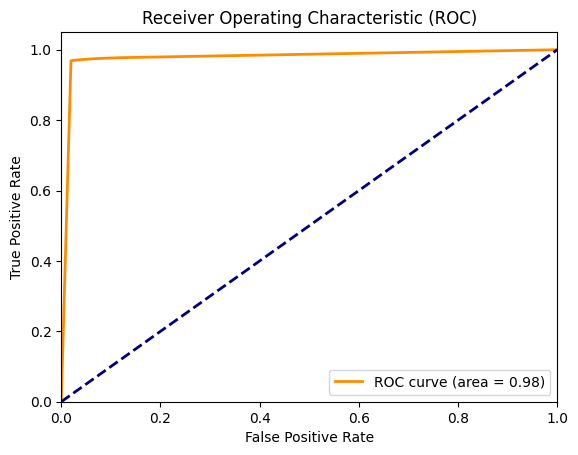

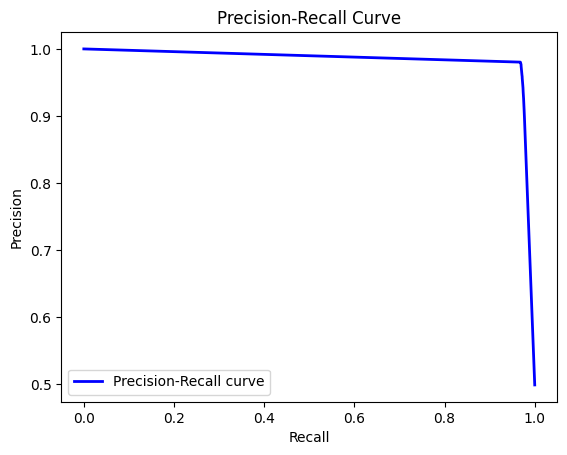

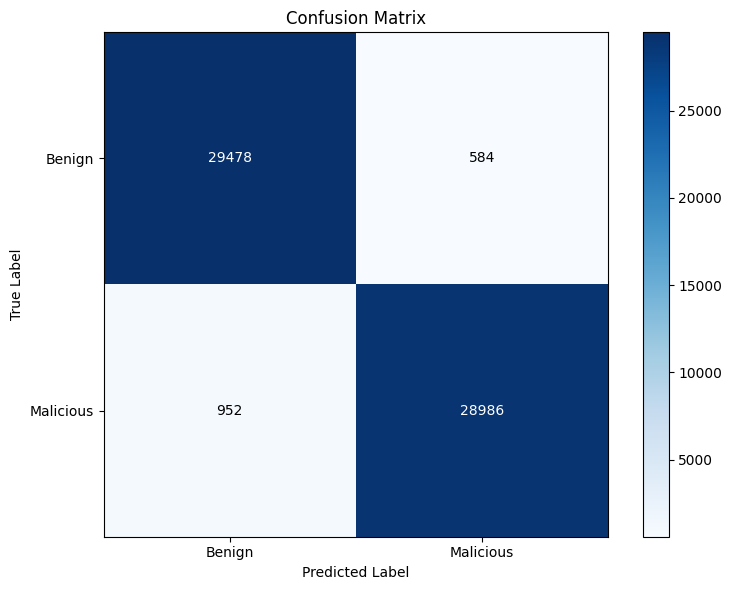

Threshold: 0.85
Accuracy: 0.9744166666666667
Confusion Matrix:
 [[29479   583]
 [  952 28986]]
Precision: 0.980283404917312
Recall: 0.9682009486271628
False Positive Rate: 0.019393253941853504
False Negative Rate: 0.03179905137283719


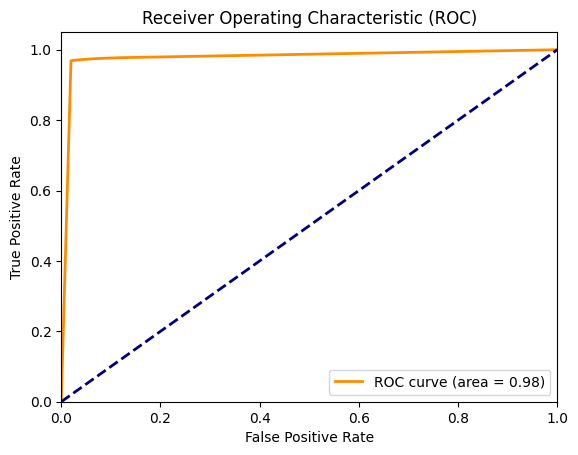

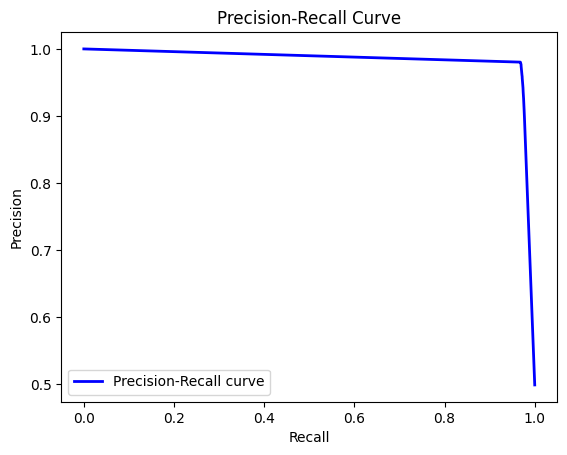

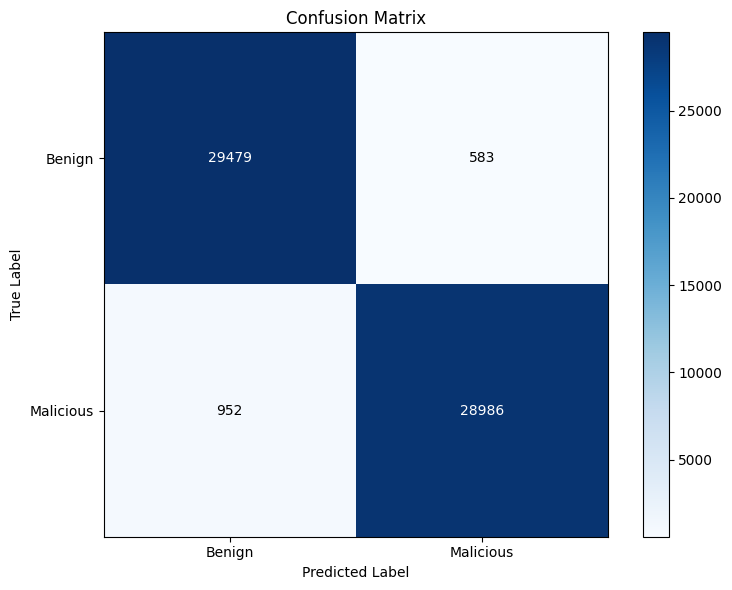

Threshold: 0.9
Accuracy: 0.9744333333333334
Confusion Matrix:
 [[29480   582]
 [  952 28986]]
Precision: 0.9803165584415584
Recall: 0.9682009486271628
False Positive Rate: 0.019359989355332313
False Negative Rate: 0.03179905137283719


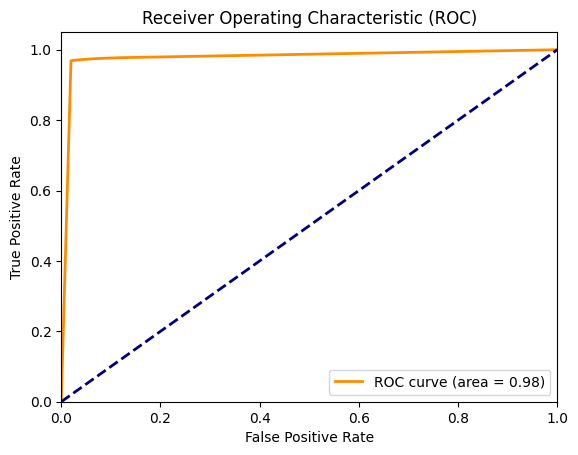

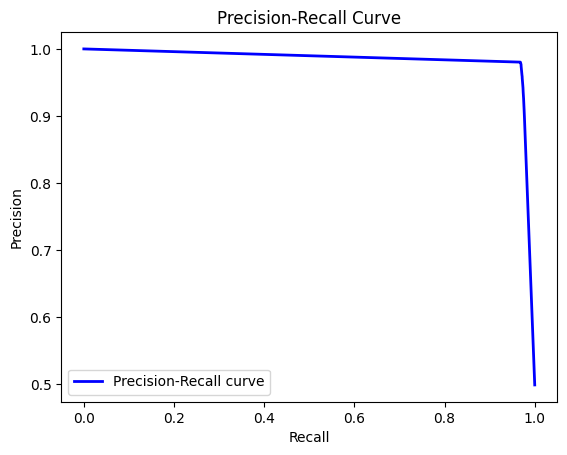

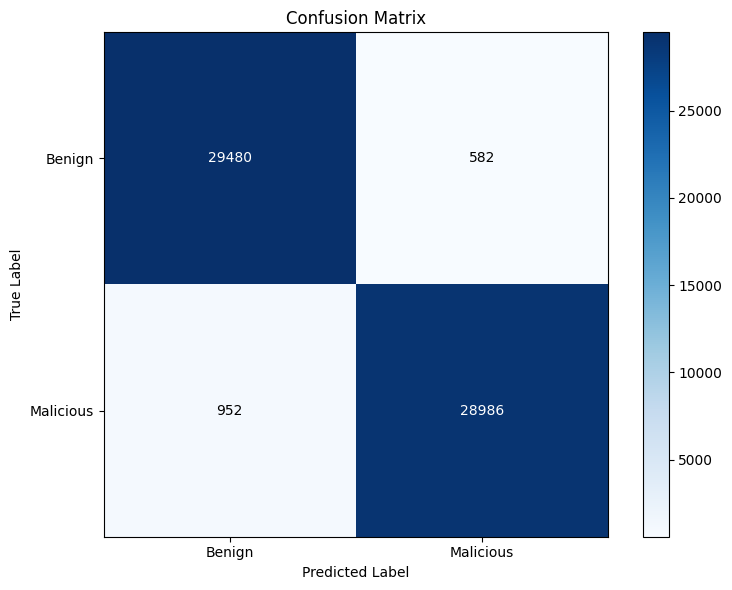

Threshold: 0.95
Accuracy: 0.9744333333333334
Confusion Matrix:
 [[29480   582]
 [  952 28986]]
Precision: 0.9803165584415584
Recall: 0.9682009486271628
False Positive Rate: 0.019359989355332313
False Negative Rate: 0.03179905137283719


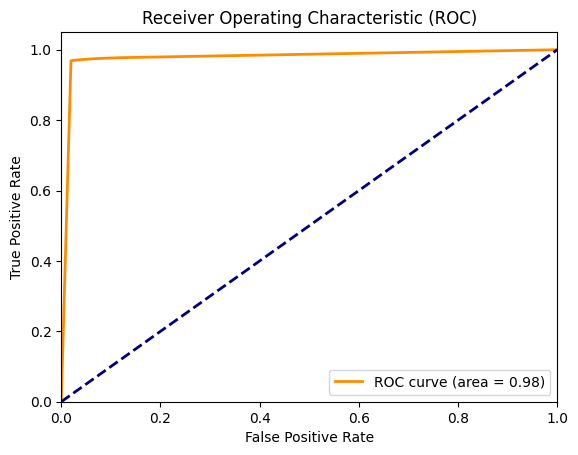

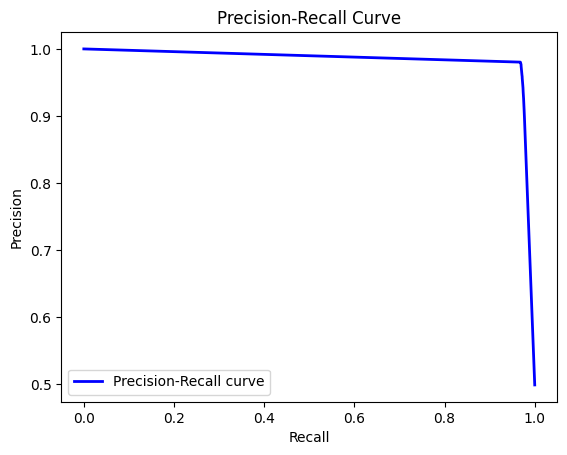

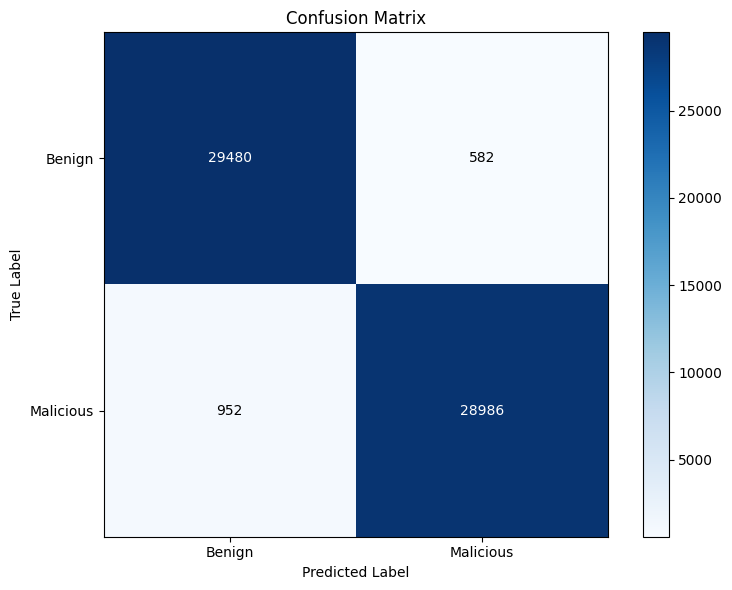

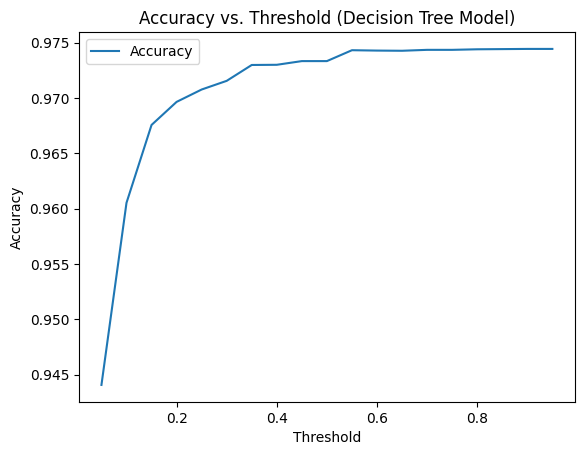

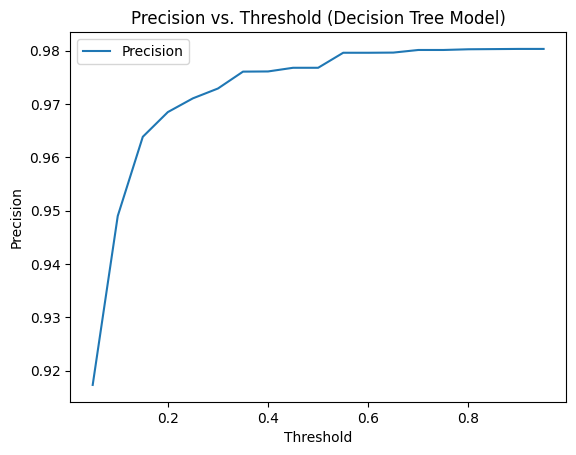

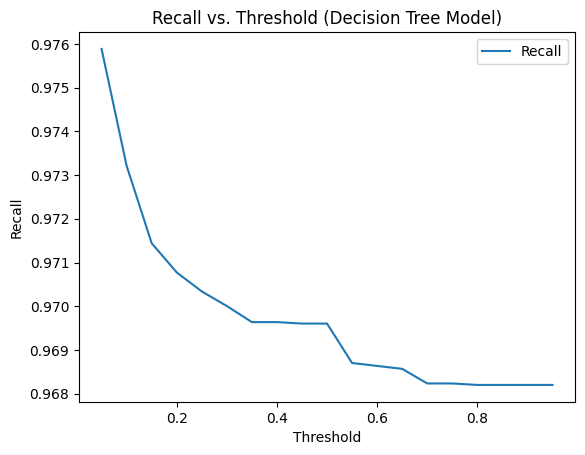

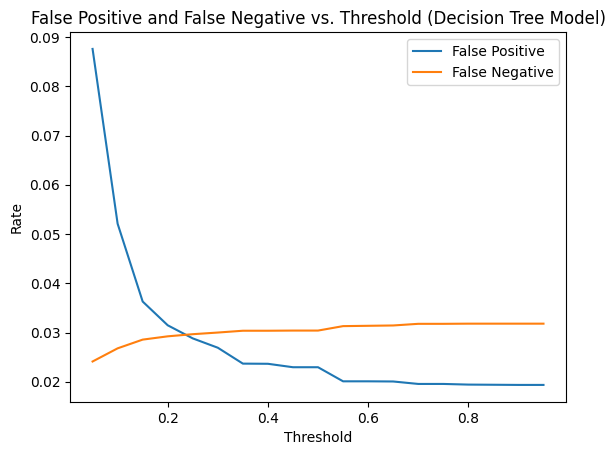

Maximum Accuracy: 0.9744333333333334
Best Threshold: 0.0


In [24]:
# Predictions and Evaluation
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Predictions and Evaluation
print('Making predictions with the Decision Tree model...')
y_pred = dt_model.predict(X_test)
print('Testing the Decision Tree model with different thresholds...')

# Initialize lists to store evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
false_positive_list = []
false_negative_list = []

# Define the thresholds to test
thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

max_accuracy = 0.0
best_threshold = 0.0

for threshold in thresholds:
    print('Threshold:', threshold)
    y_pred = (dt_model.predict_proba(X_test)[:,1] >= threshold).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    false_positive = confusion[0, 1] / (confusion[0, 1] + confusion[0, 0])
    false_negative = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])

    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion)
    print("Precision:", precision)
    print("Recall:", recall)
    print("False Positive Rate:", false_positive)
    print("False Negative Rate:", false_negative)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    false_positive_list.append(false_positive)
    false_negative_list.append(false_negative)

    # Plot ROC curve, Precision-Recall curve, and Confusion Matrix
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    # Plot Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred)

    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

    # Plot Confusion Matrix
    threshold = best_threshold  # Use the best threshold found during evaluation

    plt.figure(figsize=(8, 6))
    plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = ['Benign', 'Malicious']  # Class labels
    plt.xticks(ticks=[0, 1], labels=classes)
    plt.yticks(ticks=[0, 1], labels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Add text annotations
    thresh = confusion.max() / 2.
    for i in range(confusion.shape[0]):
        for j in range(confusion.shape[1]):
            plt.text(j, i, format(confusion[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if confusion[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

    # Update max accuracy and best threshold if current accuracy is higher
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_threshold = threshold

# Plotting accuracy vs. threshold
plt.plot(thresholds, accuracy_list, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold (Decision Tree Model)')
plt.legend()
plt.show()

# Plotting precision vs. threshold
plt.plot(thresholds, precision_list, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs. Threshold (Decision Tree Model)')
plt.legend()
plt.show()

# Plotting recall vs. threshold
plt.plot(thresholds, recall_list, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs. Threshold (Decision Tree Model)')
plt.legend()
plt.show()

# Plotting false positive and false negative rates vs. threshold
plt.plot(thresholds, false_positive_list, label='False Positive')
plt.plot(thresholds, false_negative_list, label='False Negative')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('False Positive and False Negative vs. Threshold (Decision Tree Model)')
plt.legend()
plt.show()

# Display maximum accuracy and best threshold
print('Maximum Accuracy:', max_accuracy)
print('Best Threshold:', best_threshold)

## TensorFlow neural network, with feature extraction
Now let's use a neural network to classify the URLs. We will use the feature extraction functions to extract features from the URLs and then use a neural network to classify the URLs. We will use the same training and test sets as before. As the same, the training set is 80% and the test set is 20%.

### Preprocessing for Deep Learning Model

In [5]:
# Tokenization and sequence padding parameters
max_len = 1000  # Maxiumum length of the sequence
max_words = 240000  # 80% of the total vocabulary size (300,000)

print('Tokenizing and sequence padding the URLs...')

# Convert all columns to strings and concatenate them
text_data = balanced_df.drop(['Label'], axis=1).astype(str).apply(lambda x: ' '.join(x), axis=1).values

# Tokenize and sequence pad all features
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

# Pad the sequences
data = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len)

# Add TF-IDF features to the data
#data = np.hstack((data, tfidf_dense))

print('Tokenization and sequence padding complete.')

# Labels
labels = np.asarray(balanced_df['Label'])
labels = tf.keras.utils.to_categorical(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Tokenizing and sequence padding the URLs...
Tokenization and sequence padding complete.


### Using RNN model with feature extraction

In [6]:
# RNN model definition
print('Defining the RNN model...')
RNN_model = tf.keras.models.Sequential()
RNN_model.add(tf.keras.layers.Embedding(max_words, 32, input_length=max_len))
RNN_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
RNN_model.add(tf.keras.layers.Dropout(0.5))
RNN_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
RNN_model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
RNN_model.add(tf.keras.layers.Dropout(0.5))
RNN_model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compile the model
print('Compiling the RNN model...')
RNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# Define early stopping criteria
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, restore_best_weights=True)

# Train the model with early stopping, using the GPU if available (requires TensorFlow-GPU), or the CPU otherwise, for 30 epochs
# If the model does not improve for 3 consecutive epochs, training will stop early
print('Training the RNN model with early stopping...')

history = RNN_model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

print('RNN model training complete')

print('Saving the RNN model to disk...')

# Save the model to disk
RNN_model.save('rnn_model.h5')

print('RNN model saved to disk.')

Defining the RNN model...
Compiling the RNN model...
Training the RNN model with early stopping...
Epoch 1/30
1500/1500 [==============================] - 776s 513ms/step - loss: 0.1288 - acc: 0.9589 - val_loss: 0.0652 - val_acc: 0.9793
Epoch 2/30
1500/1500 [==============================] - 721s 480ms/step - loss: 0.0563 - acc: 0.9829 - val_loss: 0.0784 - val_acc: 0.9770
Epoch 3/30
1500/1500 [==============================] - 706s 471ms/step - loss: 0.0336 - acc: 0.9898 - val_loss: 0.0759 - val_acc: 0.9750
Epoch 4/30
1500/1500 [==============================] - 702s 468ms/step - loss: 0.3036 - acc: 0.8445 - val_loss: 0.4801 - val_acc: 0.7491
Epoch 5/30
1500/1500 [==============================] - 705s 470ms/step - loss: 0.4798 - acc: 0.7492 - val_loss: 0.4785 - val_acc: 0.7491
Epoch 6/30
1500/1500 [==============================] - 709s 473ms/step - loss: 0.4789 - acc: 0.7492 - val_loss: 0.4781 - val_acc: 0.7491
Epoch 7/30
1500/1500 [==============================] - 706s 471ms/step -

#### Ploting training statistics

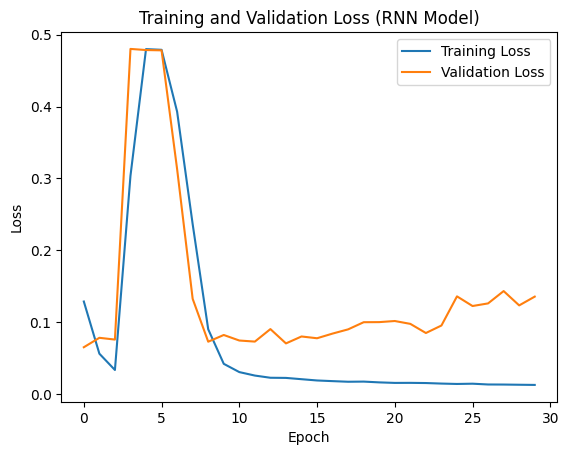

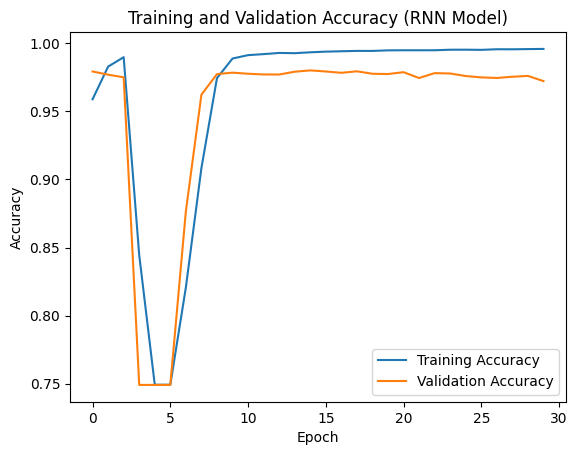

In [7]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (RNN Model)')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (RNN Model)')
plt.legend()
plt.show()

### Making predictions

Making predictions...
1875/1875 [==============================] - 292s 155ms/step
Accuracy: 0.97275
Confusion Matrix:
 [[29127   935]
 [  700 29238]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     30062
           1       0.97      0.98      0.97     29938

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000



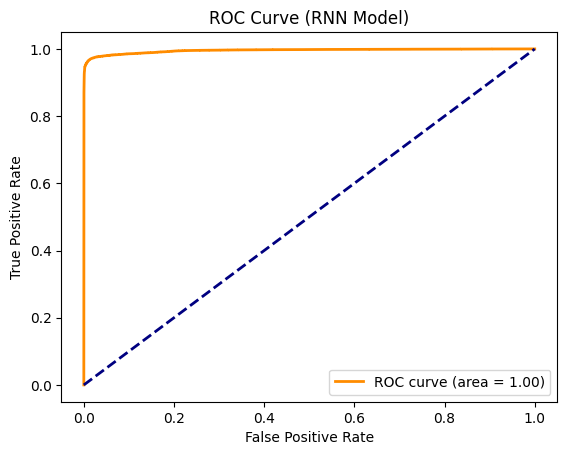

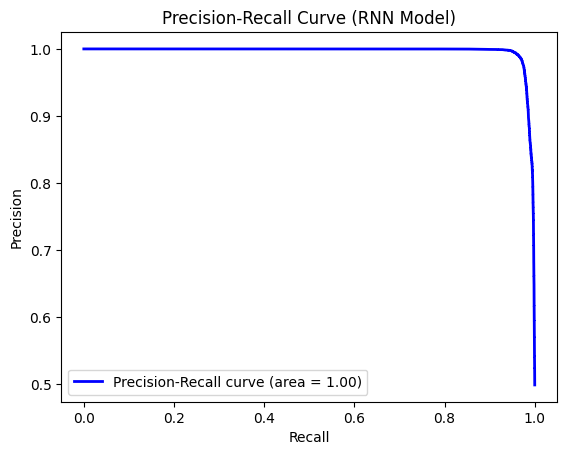

In [8]:
print('Making predictions...')

# Predictions
y_pred = RNN_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Evaluation
print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test_classes, y_pred_classes))
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))

# Calculate ROC curve and its area
fpr, tpr, thresholds_roc = roc_curve(y_test_classes, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (RNN Model)')
plt.legend(loc="lower right")
plt.show()

# Calculate Precision-Recall curve and its area
precision, recall, thresholds_pr = precision_recall_curve(y_test_classes, y_pred[:, 1])
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (RNN Model)')
plt.legend(loc="lower left")
plt.show()

### Graphs and threshold tests

Threshold: 0.05
Accuracy: 0.9153333333333333
Precision: 0.8613711693900099
Recall: 0.9895784621551206
False Positive: 0.15860554853303174
False Negative: 0.010421537844879418


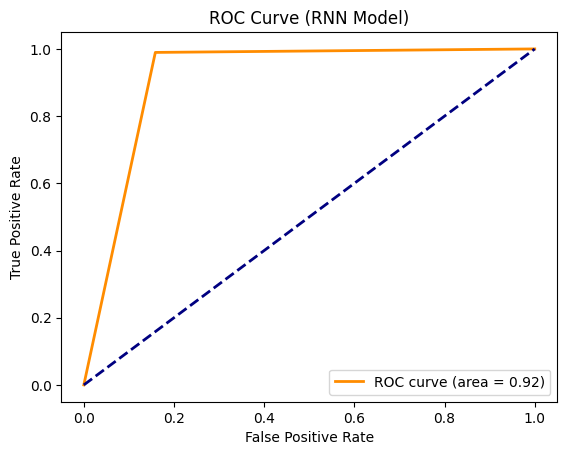

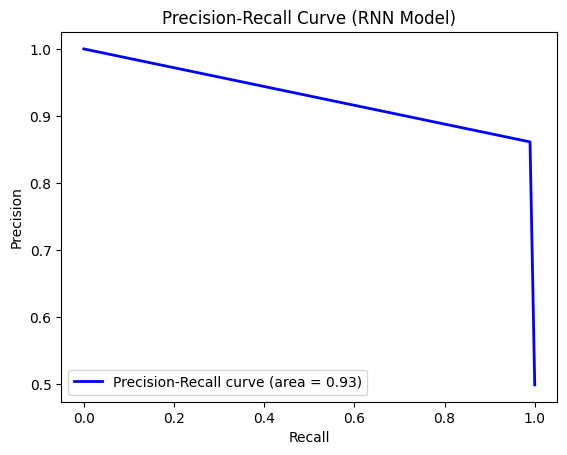

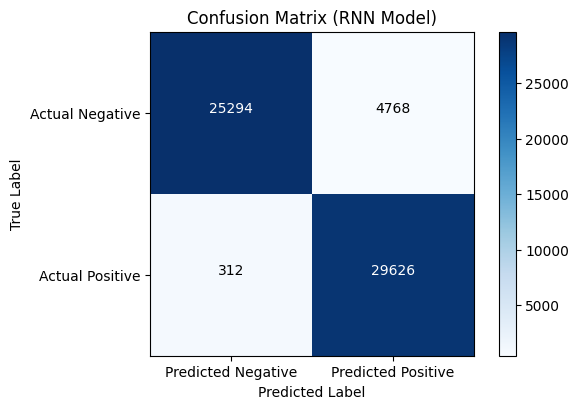



Threshold: 0.1
Accuracy: 0.9384166666666667
Precision: 0.9001067235859125
Recall: 0.9860044091121651
False Positive: 0.10897478544341693
False Negative: 0.013995590887834858


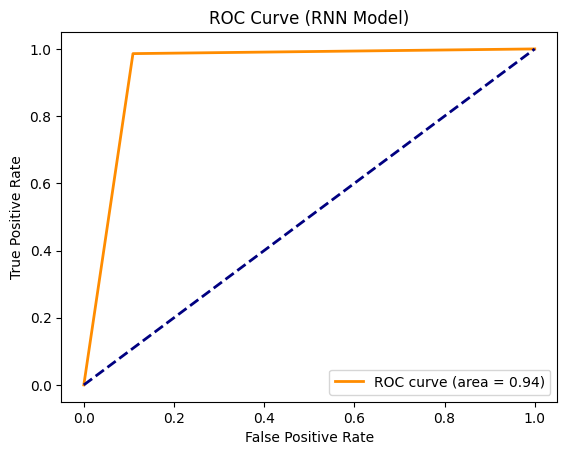

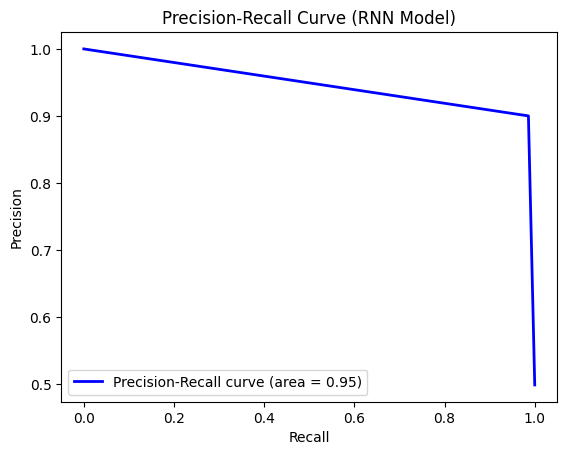

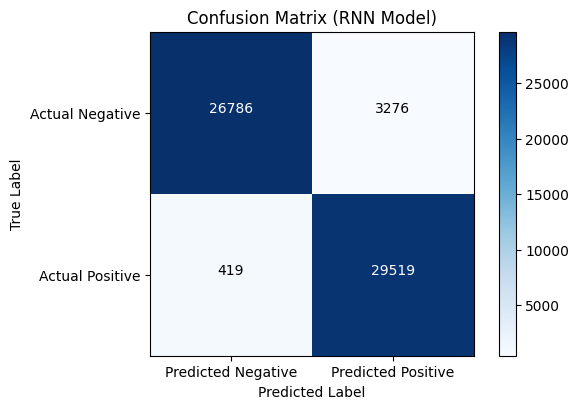



Threshold: 0.15
Accuracy: 0.9551166666666666
Precision: 0.9311872883233627
Recall: 0.9826641726234218
False Positive: 0.07231721109706607
False Negative: 0.017335827376578263


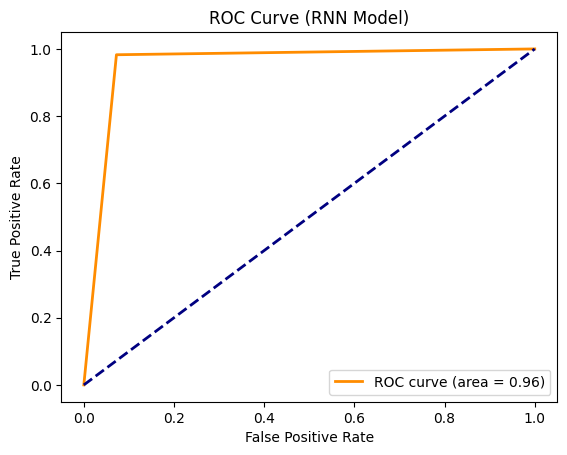

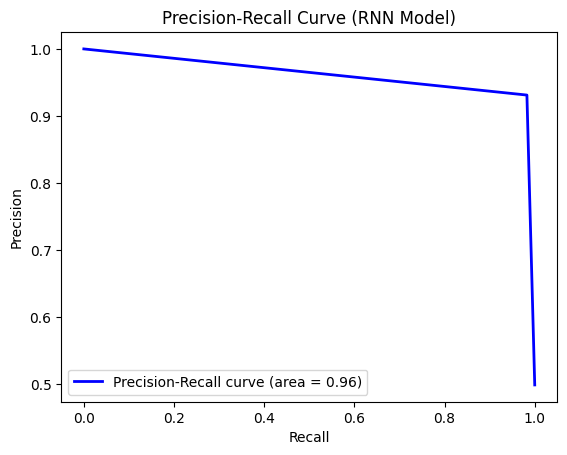

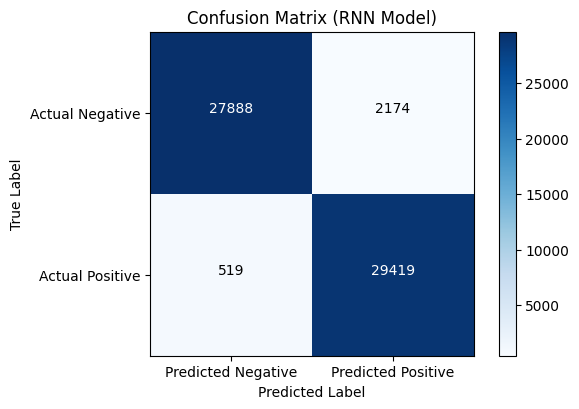



Threshold: 0.2
Accuracy: 0.9616
Precision: 0.9440480781591464
Recall: 0.9811944685683747
False Positive: 0.05791364513339099
False Negative: 0.01880553143162536


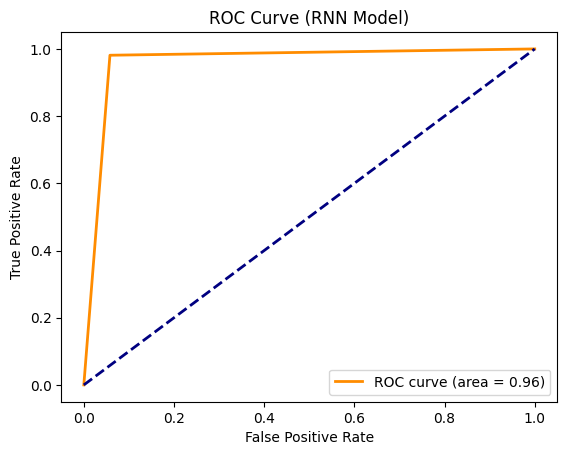

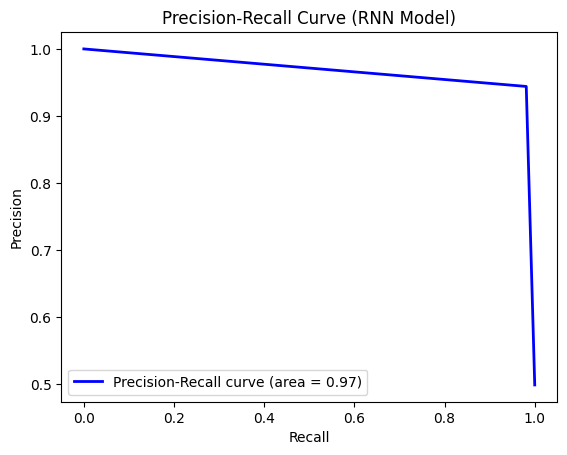

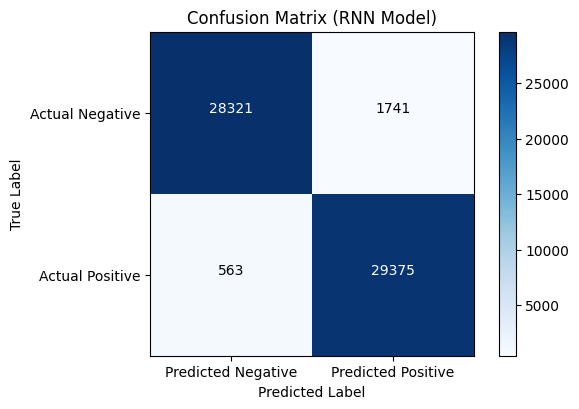



Threshold: 0.25
Accuracy: 0.9641666666666666
Precision: 0.9496440129449838
Recall: 0.9801589952568642
False Positive: 0.05175969662697093
False Negative: 0.019841004743135816


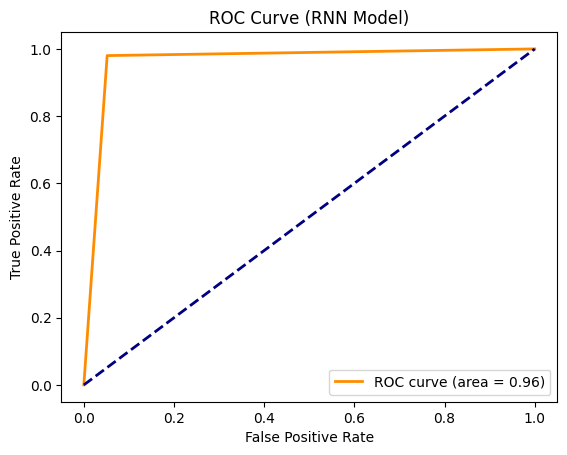

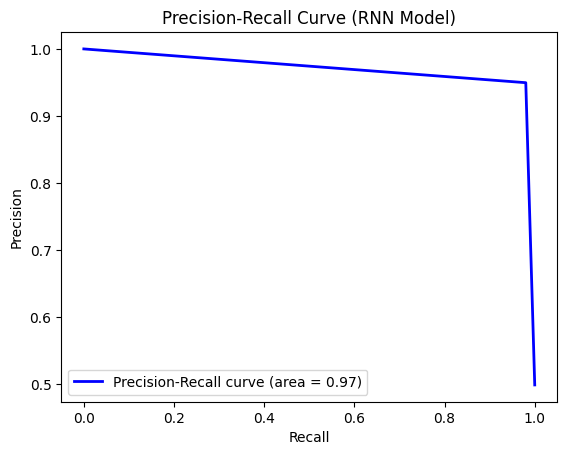

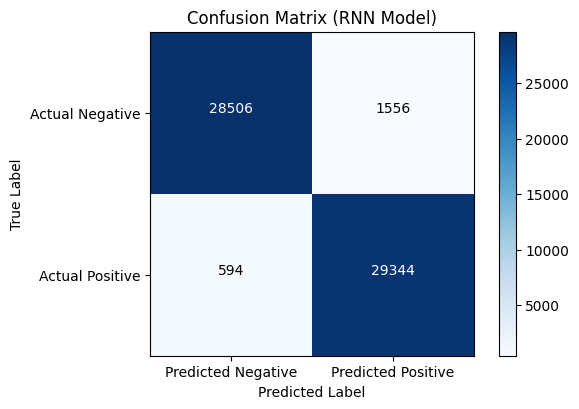



Threshold: 0.3
Accuracy: 0.9665666666666667
Precision: 0.9547704330836861
Recall: 0.9793907408644532
False Positive: 0.04620451067793227
False Negative: 0.020609259135546797


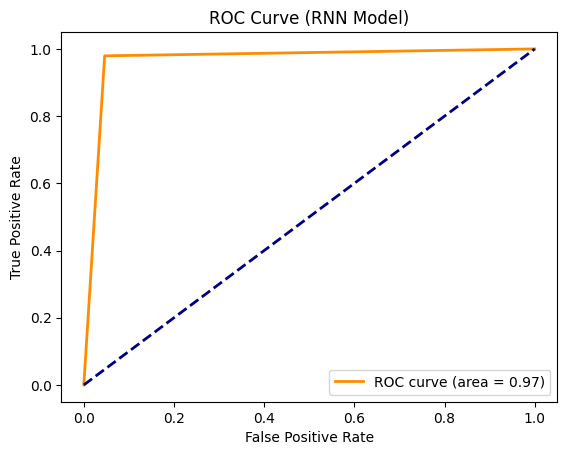

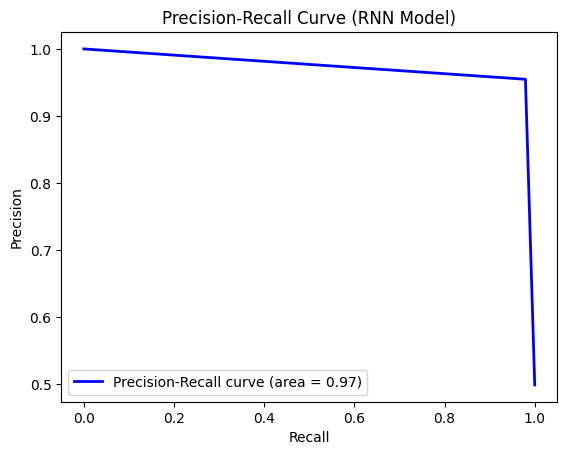

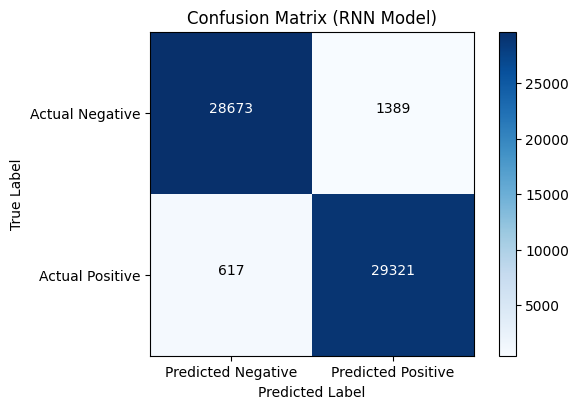



Threshold: 0.35
Accuracy: 0.9685166666666667
Precision: 0.9591723144419343
Recall: 0.9785556817422674
False Positive: 0.041480939391923356
False Negative: 0.021444318257732648


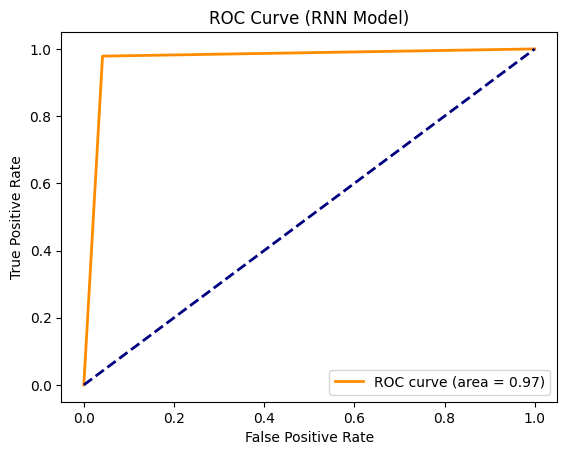

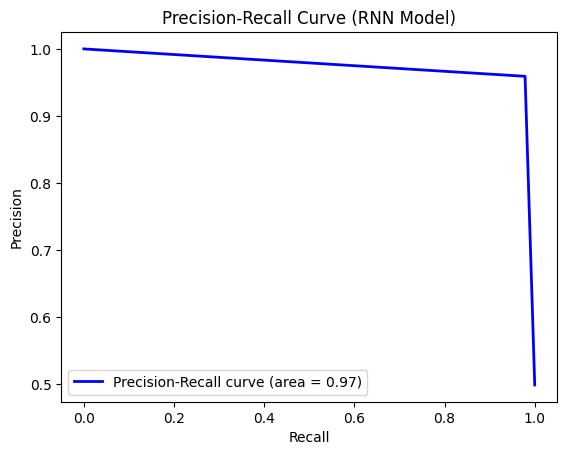

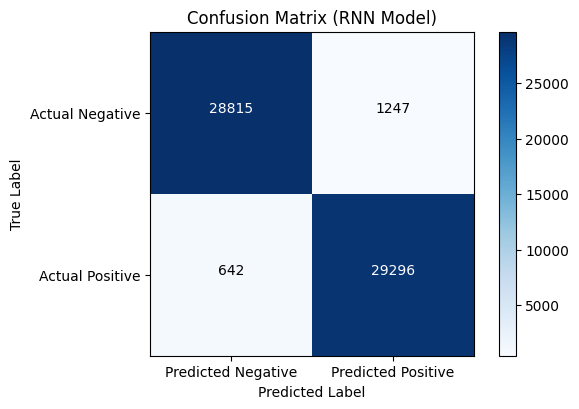



Threshold: 0.4
Accuracy: 0.97025
Precision: 0.9630275319890793
Recall: 0.9779210368094061
False Positive: 0.03738939524981705
False Negative: 0.022078963190593895


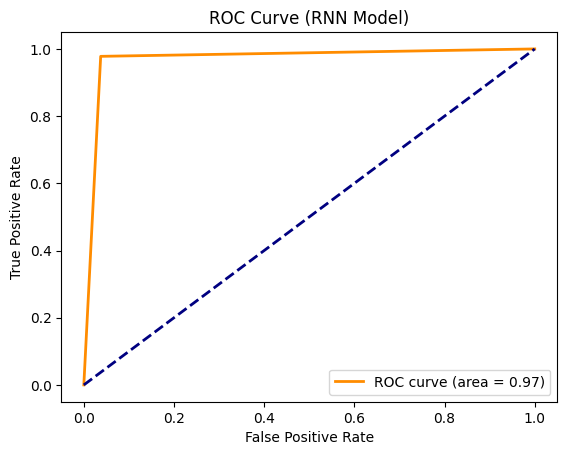

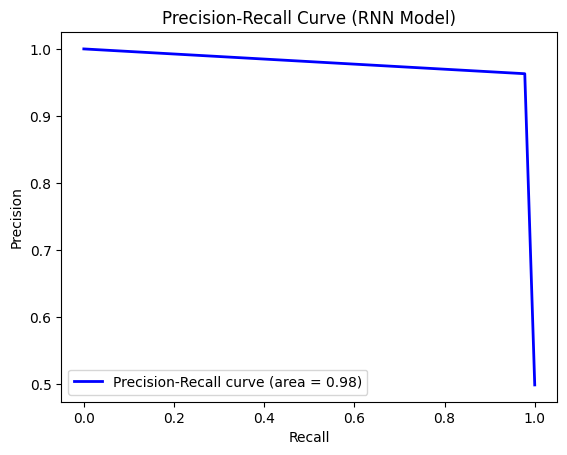

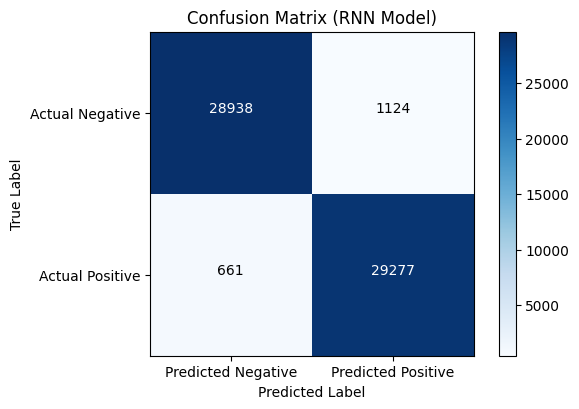



Threshold: 0.45
Accuracy: 0.9715166666666667
Precision: 0.9660558032029057
Recall: 0.9772529895116574
False Positive: 0.03419599494378285
False Negative: 0.022747010488342576


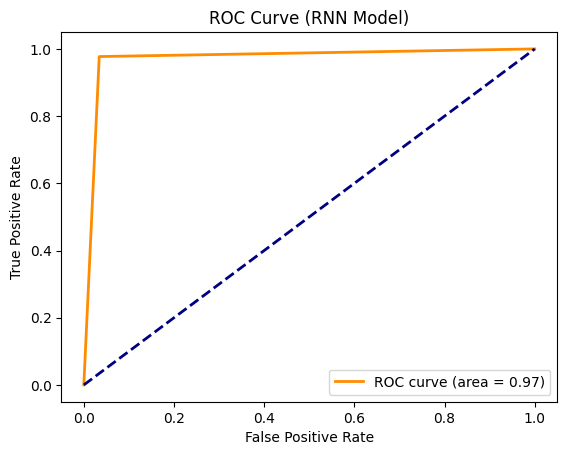

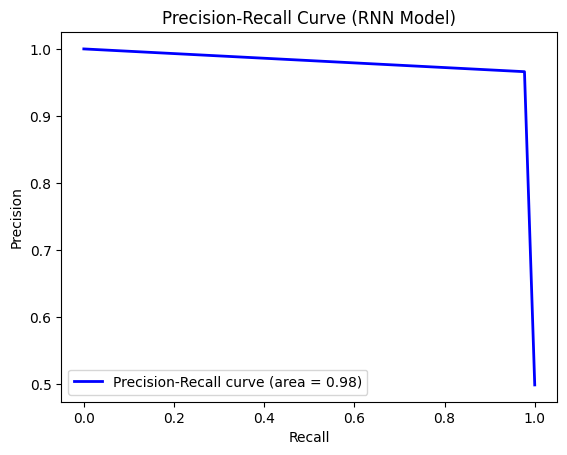

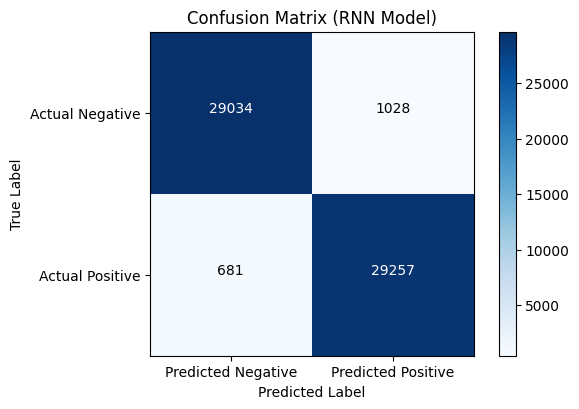



Threshold: 0.5
Accuracy: 0.97275
Precision: 0.969012030623405
Recall: 0.9766183445787961
False Positive: 0.031102388397312223
False Negative: 0.02338165542120382


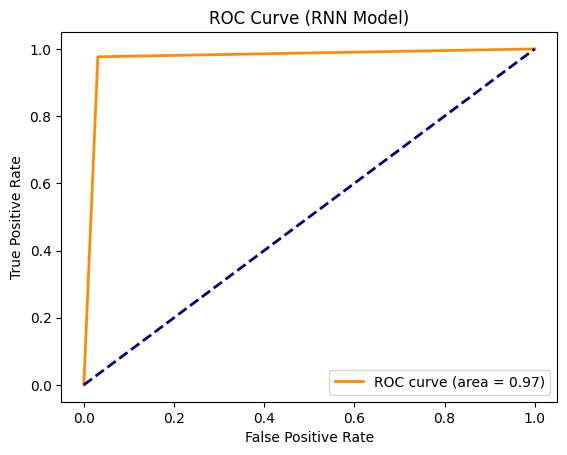

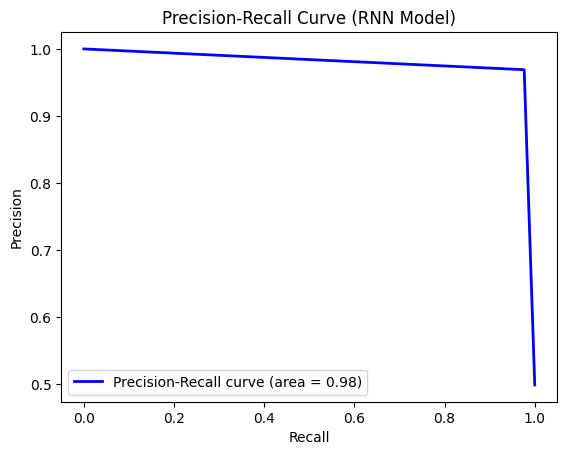

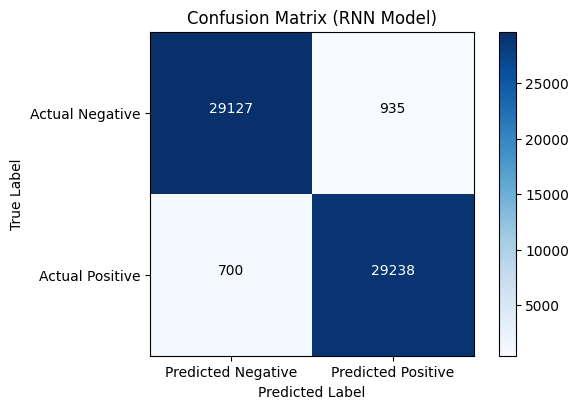



Threshold: 0.55
Accuracy: 0.974
Precision: 0.9719912181491585
Recall: 0.9760171020108224
False Positive: 0.028008781850841595
False Negative: 0.023982897989177635


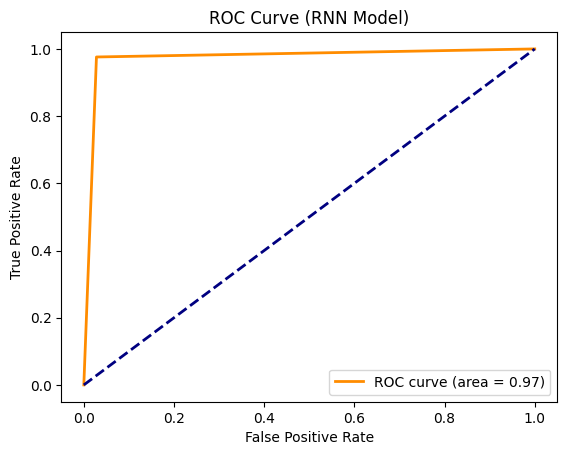

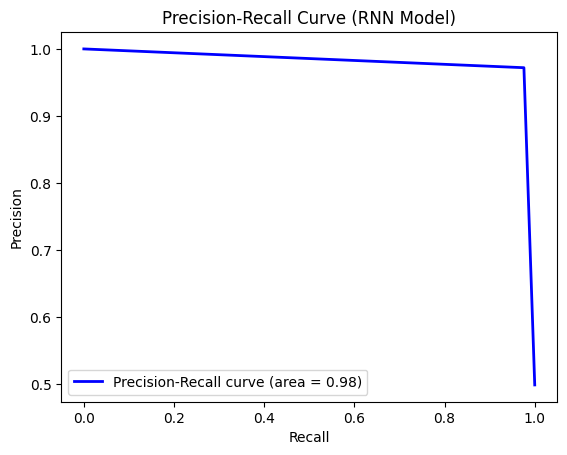

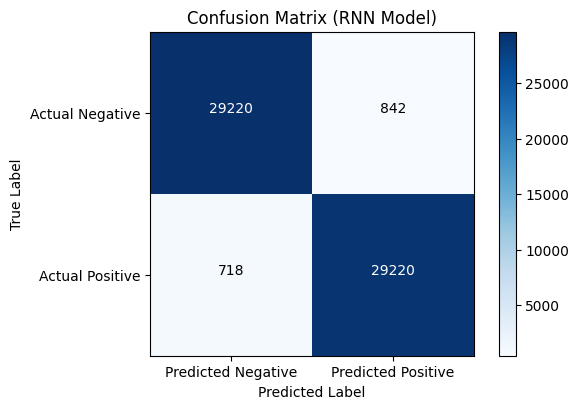



Threshold: 0.6
Accuracy: 0.9748333333333333
Precision: 0.9742426264513546
Recall: 0.9753490547130736
False Positive: 0.025680260794358326
False Negative: 0.024650945286926313


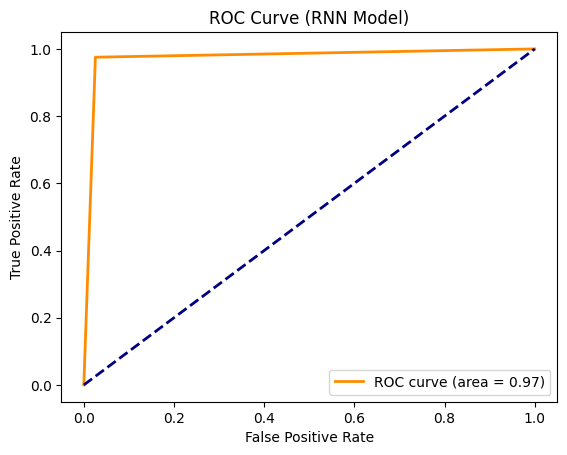

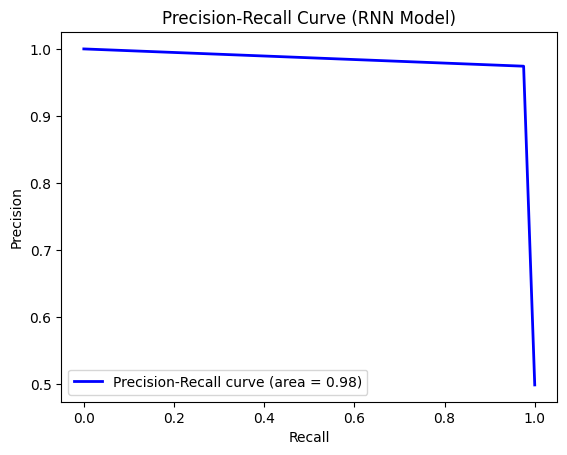

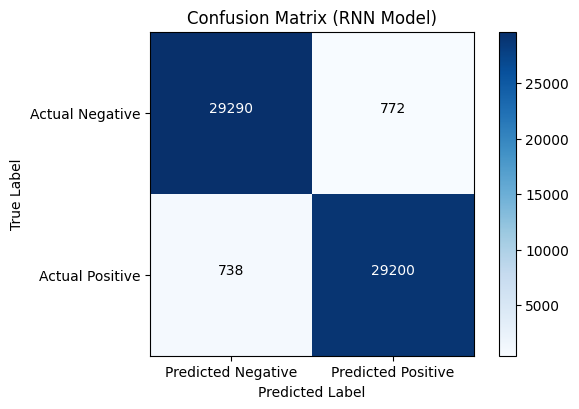



Threshold: 0.65
Accuracy: 0.97535
Precision: 0.9759189270544165
Recall: 0.9746476050504376
False Positive: 0.02395050229525647
False Negative: 0.02535239494956243


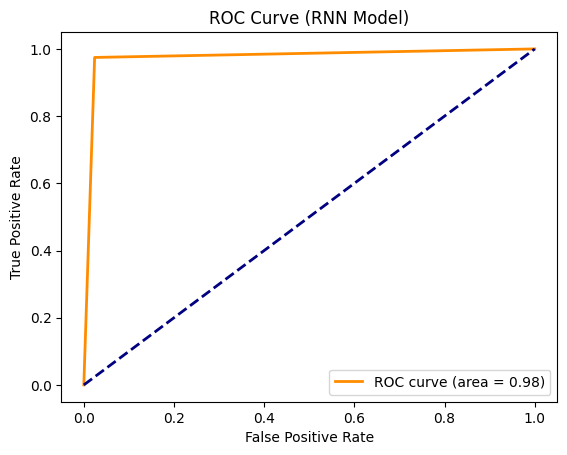

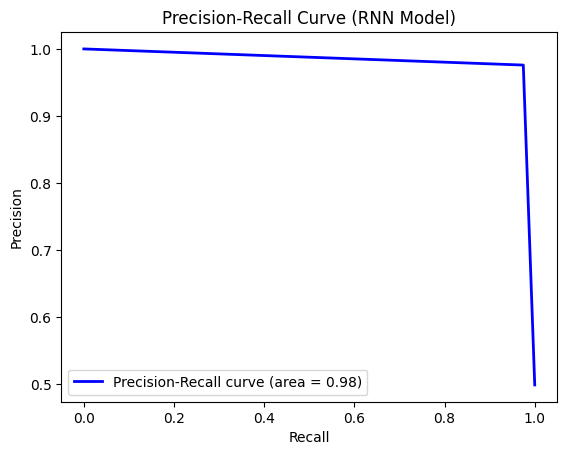

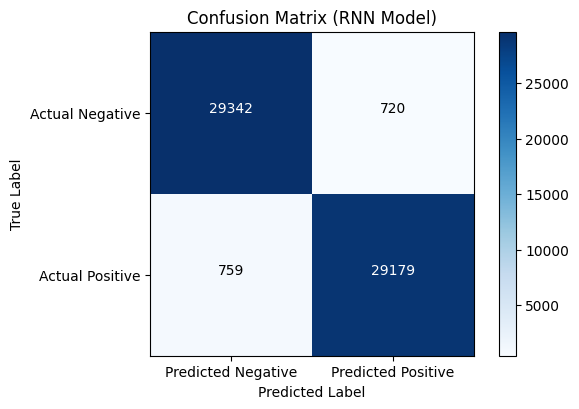



Threshold: 0.7
Accuracy: 0.9755333333333334
Precision: 0.9769163763066202
Recall: 0.9739795577526889
False Positive: 0.022919300113099596
False Negative: 0.02602044224731111


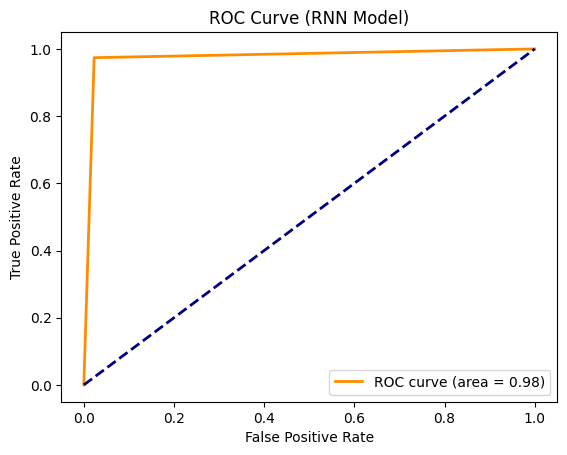

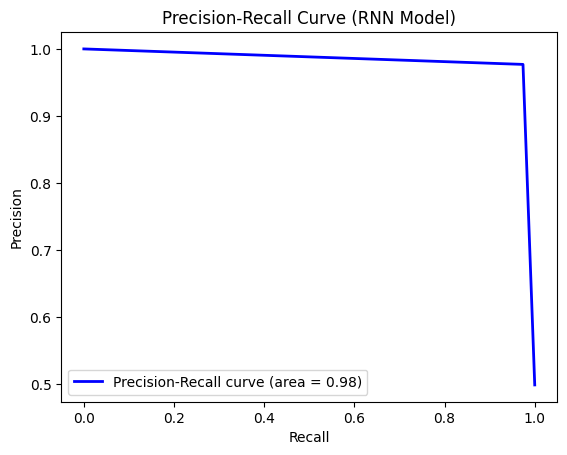

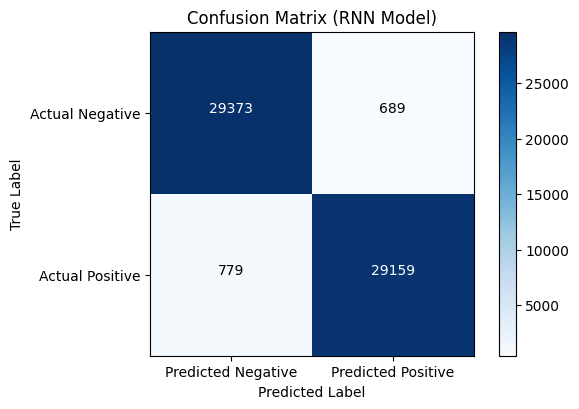



Threshold: 0.75
Accuracy: 0.9758
Precision: 0.9780171835145657
Recall: 0.9733783151847151
False Positive: 0.02178830417137915
False Negative: 0.026621684815284923


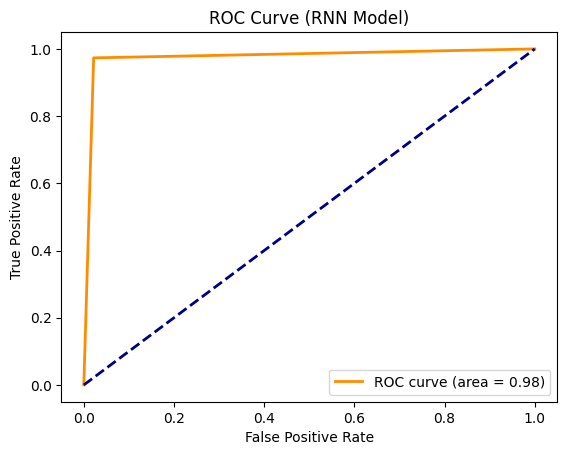

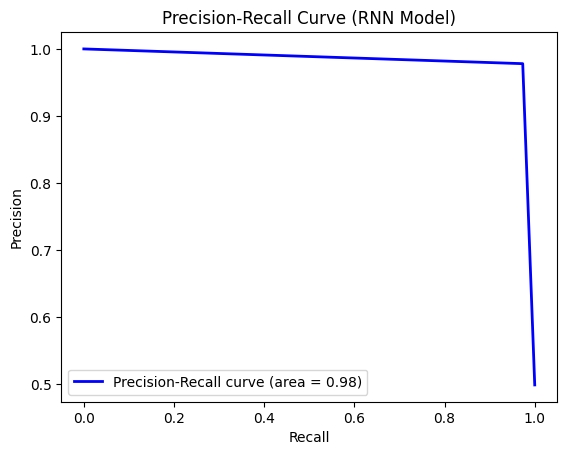

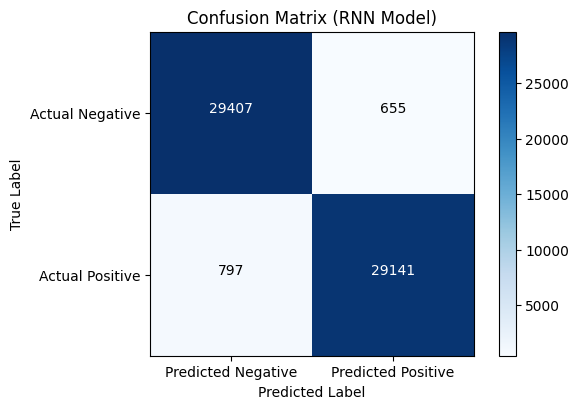



Threshold: 0.8
Accuracy: 0.9762666666666666
Precision: 0.9794525154694647
Recall: 0.9728438773465161
False Positive: 0.02032466236444681
False Negative: 0.027156122653483866


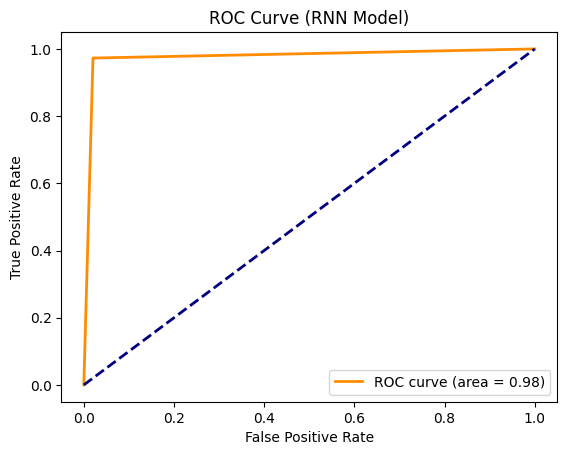

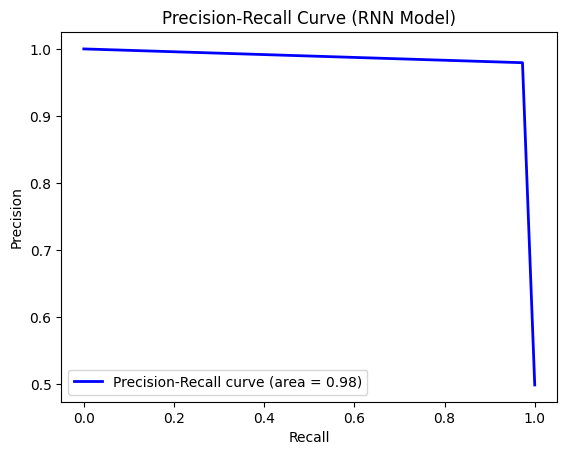

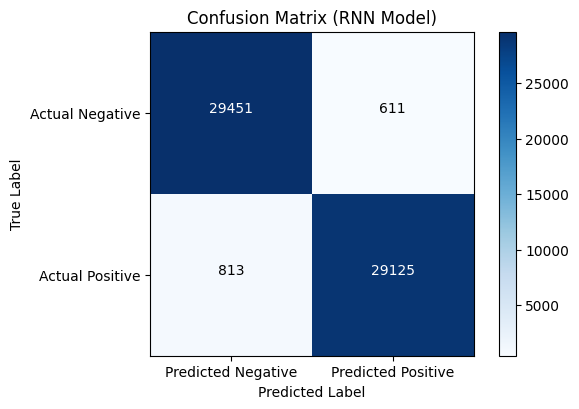



Threshold: 0.85
Accuracy: 0.97665
Precision: 0.9805665016334917
Recall: 0.9724764513327544
False Positive: 0.019193666422726366
False Negative: 0.027523548667245643


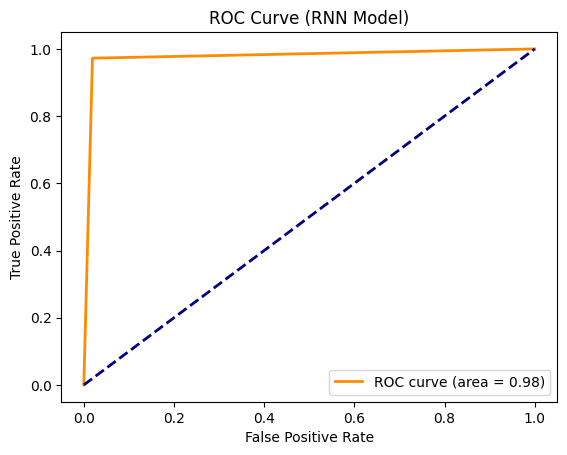

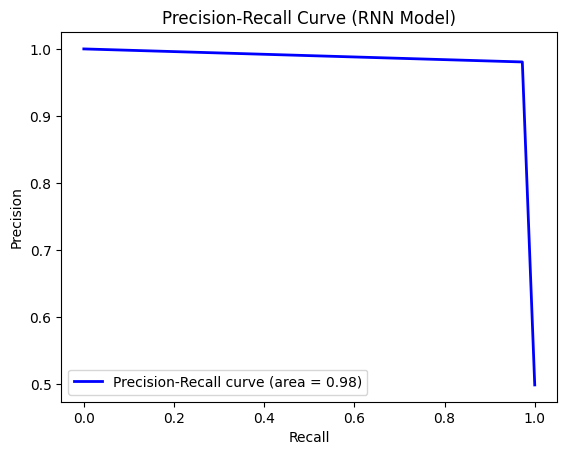

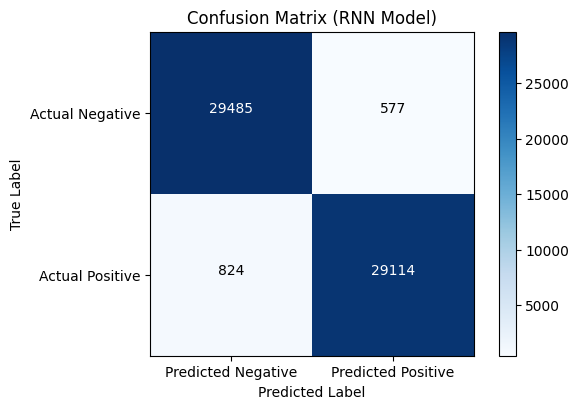



Threshold: 0.9
Accuracy: 0.9772666666666666
Precision: 0.9826037022024051
Recall: 0.9716413922105686
False Positive: 0.017131262058412613
False Negative: 0.028358607789431493


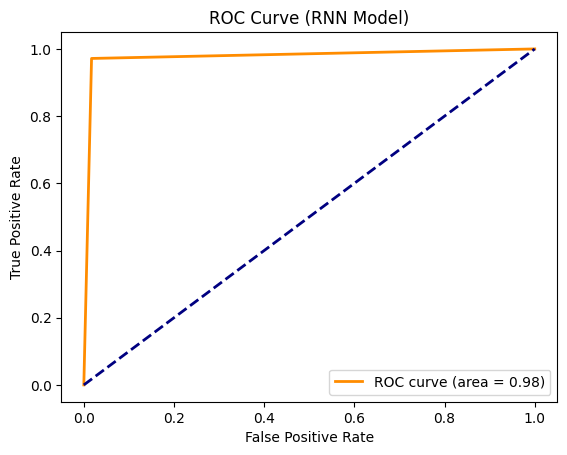

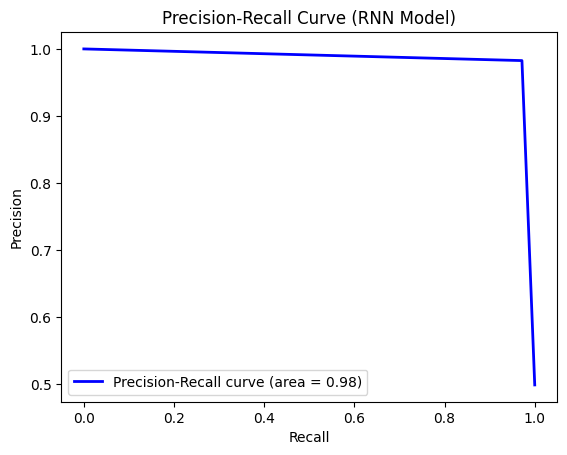

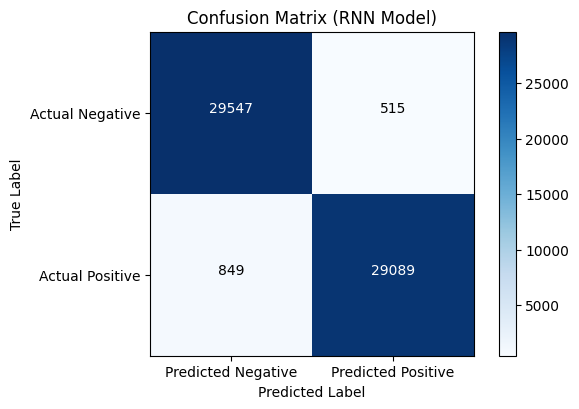



Threshold: 0.95
Accuracy: 0.97765
Precision: 0.9848757163688155
Recall: 0.9701048834257465
False Positive: 0.014836005588450536
False Negative: 0.029895116574253457


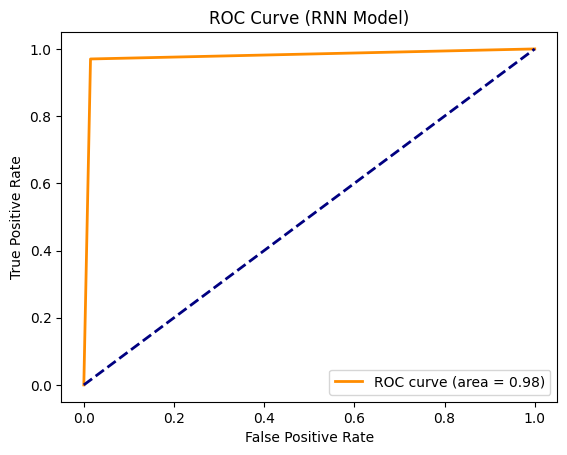

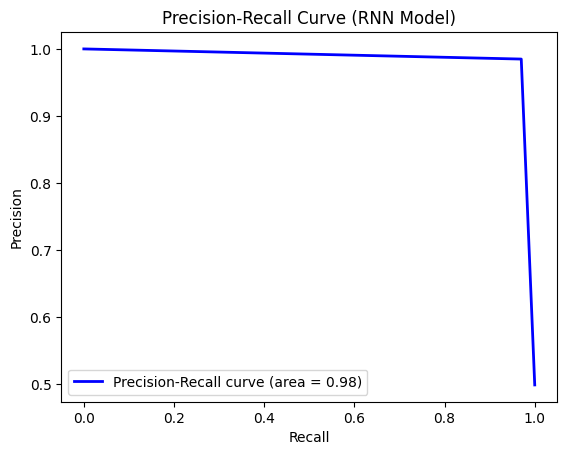

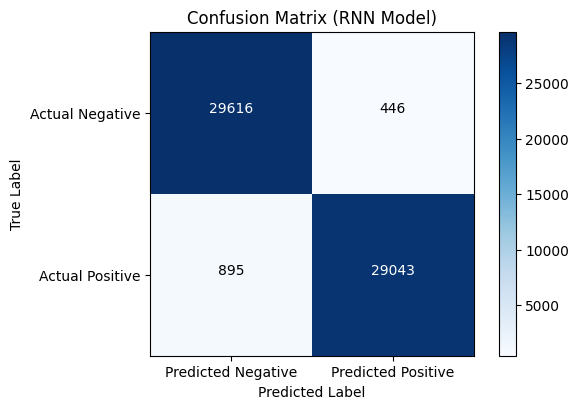

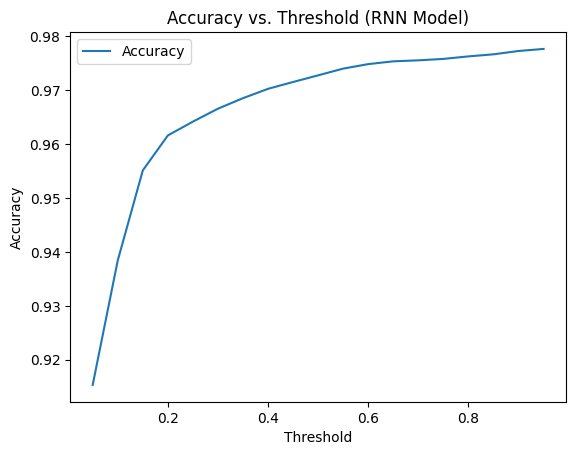

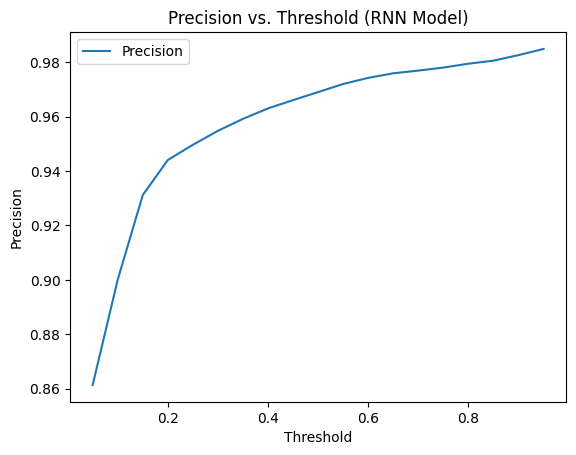

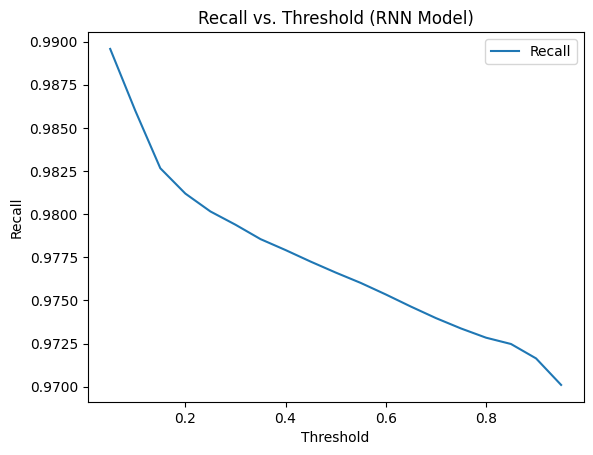

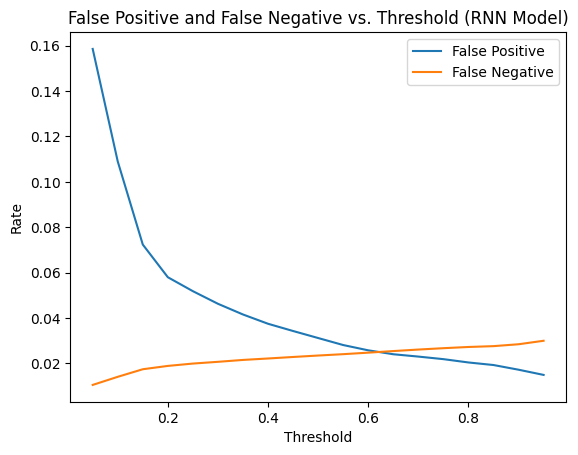

Maximum Accuracy: 0.97765
Best Threshold: 0.95


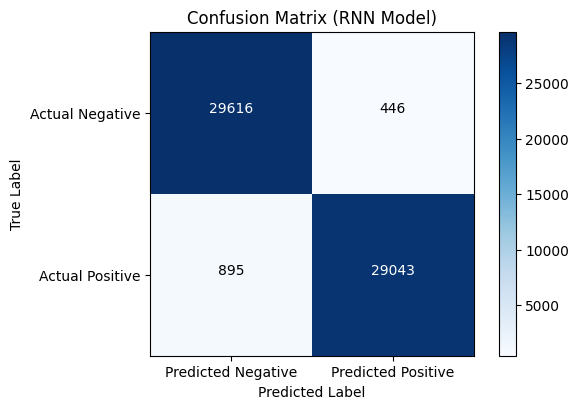

In [16]:
# Initialize lists to store evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
false_positive_list = []
false_negative_list = []

# Define the thresholds to test
thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

max_accuracy = 0.0
best_threshold = 0.0

for threshold in thresholds:
    print('Threshold:', threshold)
    
    # Convert probabilities to class predictions based on the threshold
    y_pred_classes = (y_pred[:, 1] >= threshold).astype(int)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    precision = precision_score(y_test_classes, y_pred_classes)
    recall = recall_score(y_test_classes, y_pred_classes)
    confusion = confusion_matrix(y_test_classes, y_pred_classes)
    false_positive = confusion[0][1] / float(np.sum(confusion[0]))
    false_negative = confusion[1][0] / float(np.sum(confusion[1]))

    # Append evaluation metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    false_positive_list.append(false_positive)
    false_negative_list.append(false_negative)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("False Positive:", false_positive)
    print("False Negative:", false_negative)
    
    fpr, tpr, thresholds_roc = roc_curve(y_test_classes, y_pred_classes)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (RNN Model)')
    plt.legend(loc="lower right")
    plt.show()

    # Calculate Precision-Recall curve and its area
    precision, recall, thresholds_pr = precision_recall_curve(y_test_classes, y_pred_classes)
    pr_auc = auc(recall, precision)

    # Plot Precision-Recall curve
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (RNN Model)')
    plt.legend(loc="lower left")
    plt.show()

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix (RNN Model)')
    plt.colorbar()

    # Add labels to the plot
    tick_marks = np.arange(len(confusion))
    plt.xticks(tick_marks, ['Predicted Negative', 'Predicted Positive'])
    plt.yticks(tick_marks, ['Actual Negative', 'Actual Positive'])

    # Add text annotations
    thresh = confusion.max() / 2.
    for i in range(confusion.shape[0]):
        for j in range(confusion.shape[1]):
            plt.text(j, i, format(confusion[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if confusion[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    print('\n')
    
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_threshold = threshold

# Plotting accuracy vs. threshold
plt.plot(thresholds, accuracy_list, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold (RNN Model)')
plt.legend()
plt.show()

# Plotting precision vs. threshold
plt.plot(thresholds, precision_list, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs. Threshold (RNN Model)')
plt.legend()
plt.show()

# Plotting recall vs. threshold
plt.plot(thresholds, recall_list, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs. Threshold (RNN Model)')
plt.legend()
plt.show()

# Plotting false positive and false negative rates vs. threshold
plt.plot(thresholds, false_positive_list, label='False Positive')
plt.plot(thresholds, false_negative_list, label='False Negative')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('False Positive and False Negative vs. Threshold (RNN Model)')
plt.legend()
plt.show()

# Display maximum accuracy and best threshold
print('Maximum Accuracy:', max_accuracy)
print('Best Threshold:', best_threshold)

y_pred_classes = (y_pred[:, 1] >= 0.95).astype(int)

# Define the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (RNN Model)')
plt.colorbar()

# Add labels to the plot
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks, ['Predicted Negative', 'Predicted Positive'])
plt.yticks(tick_marks, ['Actual Negative', 'Actual Positive'])

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
